<a href="https://colab.research.google.com/github/cessamutiaraa/User-Behavioral-Analysis/blob/main/Analysis_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA PREPARATION & CLEANING

In [ ]:
#import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.offline as py
import seaborn as sns
py.init_notebook_mode(connected=True)#visualization
import plotly.graph_objs as go#visualization
import plotly.tools as tls#visualization
import plotly.figure_factory as ff#visualization
from datetime import datetime
from datetime import timedelta
import scipy.stats as stats

# pd.set_option('display.float_format',lambda x: '%.2f' % x)
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LogisticRegression

In [ ]:
!gdown --id '15EWQ3adcKsWdxIdJdSu9x_msWxbxxz6l'
from silhoutte import silhoutte_analysis
from sklearn.preprocessing import MinMaxScaler, RobustScaler
from sklearn import cluster,tree, decomposition
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans

/usr/local/lib/python3.7/dist-packages/gdown/cli.py:131: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  category=FutureWarning,
Downloading...
From: https://drive.google.com/uc?id=15EWQ3adcKsWdxIdJdSu9x_msWxbxxz6l
To: /content/silhoutte.py
100% 4.34k/4.34k [00:00<00:00, 10.9MB/s]


In [ ]:
sheet_url1 = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vQgYTUEjeBSxWdUdQhwgYBQRFmJjtX1yHpEK361UV_BkHAykZqL3LSHDIlOexjhV1NLUYac7LkCVCps/pub?gid=67380180&single=true&output=csv'
sheet_url2 = 'https://docs.google.com/spreadsheets/d/e/2PACX-1vTC-c6G4bwdF25j0G2hxpCwlazBC1m6ze0g9JdE-zejStd0Sd-YT4HMasDVrb4FsXsZ8f6fiX5Pz6BW/pub?gid=664705503&single=true&output=csv'

Data Preparation

In [ ]:
df = pd.read_csv(sheet_url1)
df1 = pd.read_csv(sheet_url2)


In [ ]:
df=df.merge(df1,how='inner', on='index')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200000 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              200000 non-null  int64  
 1   key_x              200000 non-null  object 
 2   fare_amount        200000 non-null  float64
 3   pickup_datetime    200000 non-null  object 
 4   pickup_longitude   200000 non-null  float64
 5   pickup_latitude    200000 non-null  float64
 6   dropoff_longitude  199999 non-null  float64
 7   dropoff_latitude   199999 non-null  float64
 8   passenger_count    200000 non-null  int64  
 9   distance_km        200000 non-null  float64
 10  key_y              200000 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 18.3+ MB


Removing Zero Value and NaN

In [ ]:
df[(df == 0).any(axis=1)].count()

index                6701
key_x                6701
fare_amount          6701
pickup_datetime      6701
pickup_longitude     6701
pickup_latitude      6701
dropoff_longitude    6700
dropoff_latitude     6700
passenger_count      6701
distance_km          6701
key_y                6701
dtype: int64

In [ ]:
df.drop(df[(df == 0).any(axis=1)].index,inplace=True)
df[(df == 0).any(axis=1)].count()

index                0
key_x                0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
distance_km          0
key_y                0
dtype: int64

In [ ]:
df.isna().sum()

index                0
key_x                0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
distance_km          0
key_y                0
dtype: int64

In [ ]:
df.dropna(axis=0,inplace=True)
df.isna().sum()

index                0
key_x                0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
distance_km          0
key_y                0
dtype: int64

In [ ]:
df

index                key_x  fare_amount          pickup_datetime  \
0       24238194  2015-05-07 19:52:06          7.5  2015-05-07 19:52:06 UTC   
1       27835199  2009-07-17 20:04:56          7.7  2009-07-17 20:04:56 UTC   
2       44984355  2009-08-24 21:45:00         12.9  2009-08-24 21:45:00 UTC   
3       25894730   2009-06-26 8:22:21          5.3  2009-06-26 08:22:21 UTC   
4       17610152  2014-08-28 17:47:00         16.0  2014-08-28 17:47:00 UTC   
...          ...                  ...          ...                      ...   
199995  42598914  2012-10-28 10:49:00          3.0  2012-10-28 10:49:00 UTC   
199996  16382965   2014-03-14 1:09:00          7.5  2014-03-14 01:09:00 UTC   
199997  27804658   2009-06-29 0:42:00         30.9  2009-06-29 00:42:00 UTC   
199998  20259894  2015-05-20 14:56:25         14.5  2015-05-20 14:56:25 UTC   
199999  11951496   2010-05-15 4:08:00         14.1  2010-05-15 04:08:00 UTC   

        pickup_longitude  pickup_latitude  dropoff_longitude  \
0             -73.999817        40.738354         -73.999512   
1             -73.994355        40.728225         -73.994710   
2             -74.005043        40.740770         -73.962565   
3             -73.976124        40.790844         -73.965316   
4             -73.925023        40.744085         -73.973082   
...                  ...              ...                ...   
199995        -73.987042        40.739367         -73.986525   
199996        -73.984722        40.736837         -74.006672   
199997        -73.986017        40.756487         -73.858957   
199998        -73.997124        40.725452         -73.983215   
199999        -73.984395        40.720077         -73.985508   

        dropoff_latitude  passenger_count  distance_km  \
0              40.723217                1     1.683349   
1              40.750325                1     2.457628   
2              40.772647                1     5.036456   
3              40.803349                3     1.661710   
4              40.761247                5     4.475520   
...                  ...              ...          ...   
199995         40.740297                1     0.112212   
199996         40.739620                1     1.875080   
199997         40.692588                2    12.850521   
199998         40.695416                1     3.539771   
199999         40.768793                1     5.417869   

                                key_y  
0         2015-05-07 19:52:06.0000003  
1         2009-07-17 20:04:56.0000002  
2        2009-08-24 21:45:00.00000061  
3         2009-06-26 08:22:21.0000001  
4       2014-08-28 17:47:00.000000188  
...                               ...  
199995   2012-10-28 10:49:00.00000053  
199996    2014-03-14 01:09:00.0000008  
199997   2009-06-29 00:42:00.00000078  
199998    2015-05-20 14:56:25.0000004  
199999   2010-05-15 04:08:00.00000076  

[193299 rows x 11 columns]

Remove Duplicates

In [ ]:
df[df['key_y'].duplicated()].count()

index                0
key_x                0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
distance_km          0
key_y                0
dtype: int64

In [ ]:
df.drop_duplicates(['key_y'],keep=False,inplace=True)
df[df['key_y'].duplicated()].count()

index                0
key_x                0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
distance_km          0
key_y                0
dtype: int64

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193299 entries, 0 to 199999
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   index              193299 non-null  int64  
 1   key_x              193299 non-null  object 
 2   fare_amount        193299 non-null  float64
 3   pickup_datetime    193299 non-null  object 
 4   pickup_longitude   193299 non-null  float64
 5   pickup_latitude    193299 non-null  float64
 6   dropoff_longitude  193299 non-null  float64
 7   dropoff_latitude   193299 non-null  float64
 8   passenger_count    193299 non-null  int64  
 9   distance_km        193299 non-null  float64
 10  key_y              193299 non-null  object 
dtypes: float64(6), int64(2), object(3)
memory usage: 17.7+ MB


In [ ]:
df.reset_index()

level_0     index                key_x  fare_amount  \
0             0  24238194  2015-05-07 19:52:06          7.5   
1             1  27835199  2009-07-17 20:04:56          7.7   
2             2  44984355  2009-08-24 21:45:00         12.9   
3             3  25894730   2009-06-26 8:22:21          5.3   
4             4  17610152  2014-08-28 17:47:00         16.0   
...         ...       ...                  ...          ...   
193294   199995  42598914  2012-10-28 10:49:00          3.0   
193295   199996  16382965   2014-03-14 1:09:00          7.5   
193296   199997  27804658   2009-06-29 0:42:00         30.9   
193297   199998  20259894  2015-05-20 14:56:25         14.5   
193298   199999  11951496   2010-05-15 4:08:00         14.1   

                pickup_datetime  pickup_longitude  pickup_latitude  \
0       2015-05-07 19:52:06 UTC        -73.999817        40.738354   
1       2009-07-17 20:04:56 UTC        -73.994355        40.728225   
2       2009-08-24 21:45:00 UTC        -74.005043        40.740770   
3       2009-06-26 08:22:21 UTC        -73.976124        40.790844   
4       2014-08-28 17:47:00 UTC        -73.925023        40.744085   
...                         ...               ...              ...   
193294  2012-10-28 10:49:00 UTC        -73.987042        40.739367   
193295  2014-03-14 01:09:00 UTC        -73.984722        40.736837   
193296  2009-06-29 00:42:00 UTC        -73.986017        40.756487   
193297  2015-05-20 14:56:25 UTC        -73.997124        40.725452   
193298  2010-05-15 04:08:00 UTC        -73.984395        40.720077   

        dropoff_longitude  dropoff_latitude  passenger_count  distance_km  \
0              -73.999512         40.723217                1     1.683349   
1              -73.994710         40.750325                1     2.457628   
2              -73.962565         40.772647                1     5.036456   
3              -73.965316         40.803349                3     1.661710   
4              -73.973082         40.761247                5     4.475520   
...                   ...               ...              ...          ...   
193294         -73.986525         40.740297                1     0.112212   
193295         -74.006672         40.739620                1     1.875080   
193296         -73.858957         40.692588                2    12.850521   
193297         -73.983215         40.695416                1     3.539771   
193298         -73.985508         40.768793                1     5.417869   

                                key_y  
0         2015-05-07 19:52:06.0000003  
1         2009-07-17 20:04:56.0000002  
2        2009-08-24 21:45:00.00000061  
3         2009-06-26 08:22:21.0000001  
4       2014-08-28 17:47:00.000000188  
...                               ...  
193294   2012-10-28 10:49:00.00000053  
193295    2014-03-14 01:09:00.0000008  
193296   2009-06-29 00:42:00.00000078  
193297    2015-05-20 14:56:25.0000004  
193298   2010-05-15 04:08:00.00000076  

[193299 rows x 12 columns]

Date Manipulation

In [ ]:
#Date manipulation
#conver to date format
df["pickup_datetime"] = df["pickup_datetime"].astype(str).str.replace(" UTC","")
df["pickup_datetime"] = pd.to_datetime(df["pickup_datetime"],
                                             format="%Y-%m-%d %H:%M:%S")
df["pickup_date"] = df["pickup_datetime"].dt.date
df["pickup_time"] = df["pickup_datetime"].dt.time
 
df["pickup_day"]   = df["pickup_datetime"].dt.day_name()
#extract day 
df["day_category"] = df["pickup_datetime"].dt.weekday
df['day_category'] = df['day_category'].apply(lambda x: 'Weekdays' if x < 5 else 'Weekend')

# display the dataframe

In [ ]:
df.head()

index                key_x  fare_amount     pickup_datetime  \
0  24238194  2015-05-07 19:52:06          7.5 2015-05-07 19:52:06   
1  27835199  2009-07-17 20:04:56          7.7 2009-07-17 20:04:56   
2  44984355  2009-08-24 21:45:00         12.9 2009-08-24 21:45:00   
3  25894730   2009-06-26 8:22:21          5.3 2009-06-26 08:22:21   
4  17610152  2014-08-28 17:47:00         16.0 2014-08-28 17:47:00   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.999817        40.738354         -73.999512         40.723217   
1        -73.994355        40.728225         -73.994710         40.750325   
2        -74.005043        40.740770         -73.962565         40.772647   
3        -73.976124        40.790844         -73.965316         40.803349   
4        -73.925023        40.744085         -73.973082         40.761247   

   passenger_count  distance_km                          key_y pickup_date  \
0                1     1.683349    2015-05-07 19:52:06.0000003  2015-05-07   
1                1     2.457628    2009-07-17 20:04:56.0000002  2009-07-17   
2                1     5.036456   2009-08-24 21:45:00.00000061  2009-08-24   
3                3     1.661710    2009-06-26 08:22:21.0000001  2009-06-26   
4                5     4.475520  2014-08-28 17:47:00.000000188  2014-08-28   

  pickup_time pickup_day day_category  
0    19:52:06   Thursday     Weekdays  
1    20:04:56     Friday     Weekdays  
2    21:45:00     Monday     Weekdays  
3    08:22:21     Friday     Weekdays  
4    17:47:00   Thursday     Weekdays

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193299 entries, 0 to 199999
Data columns (total 15 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   index              193299 non-null  int64         
 1   key_x              193299 non-null  object        
 2   fare_amount        193299 non-null  float64       
 3   pickup_datetime    193299 non-null  datetime64[ns]
 4   pickup_longitude   193299 non-null  float64       
 5   pickup_latitude    193299 non-null  float64       
 6   dropoff_longitude  193299 non-null  float64       
 7   dropoff_latitude   193299 non-null  float64       
 8   passenger_count    193299 non-null  int64         
 9   distance_km        193299 non-null  float64       
 10  key_y              193299 non-null  object        
 11  pickup_date        193299 non-null  object        
 12  pickup_time        193299 non-null  object        
 13  pickup_day         193299 non-null  object  

In [ ]:
# create a list of our conditions
conditions = [
    (df['distance_km'] <= 5),
    (df['distance_km'] > 5) & (df['distance_km'] <= 10),
    (df['distance_km'] > 10)
]
    

# create a list of the values we want to assign for each condition
values = ['Near', 'Moderate', 'Far']

# create a new column and use np.select to assign values to it using our lists as arguments
df['distance_lvl'] = np.select(conditions, values)
df

index                key_x  fare_amount     pickup_datetime  \
0       24238194  2015-05-07 19:52:06          7.5 2015-05-07 19:52:06   
1       27835199  2009-07-17 20:04:56          7.7 2009-07-17 20:04:56   
2       44984355  2009-08-24 21:45:00         12.9 2009-08-24 21:45:00   
3       25894730   2009-06-26 8:22:21          5.3 2009-06-26 08:22:21   
4       17610152  2014-08-28 17:47:00         16.0 2014-08-28 17:47:00   
...          ...                  ...          ...                 ...   
199995  42598914  2012-10-28 10:49:00          3.0 2012-10-28 10:49:00   
199996  16382965   2014-03-14 1:09:00          7.5 2014-03-14 01:09:00   
199997  27804658   2009-06-29 0:42:00         30.9 2009-06-29 00:42:00   
199998  20259894  2015-05-20 14:56:25         14.5 2015-05-20 14:56:25   
199999  11951496   2010-05-15 4:08:00         14.1 2010-05-15 04:08:00   

        pickup_longitude  pickup_latitude  dropoff_longitude  \
0             -73.999817        40.738354         -73.999512   
1             -73.994355        40.728225         -73.994710   
2             -74.005043        40.740770         -73.962565   
3             -73.976124        40.790844         -73.965316   
4             -73.925023        40.744085         -73.973082   
...                  ...              ...                ...   
199995        -73.987042        40.739367         -73.986525   
199996        -73.984722        40.736837         -74.006672   
199997        -73.986017        40.756487         -73.858957   
199998        -73.997124        40.725452         -73.983215   
199999        -73.984395        40.720077         -73.985508   

        dropoff_latitude  passenger_count  distance_km  \
0              40.723217                1     1.683349   
1              40.750325                1     2.457628   
2              40.772647                1     5.036456   
3              40.803349                3     1.661710   
4              40.761247                5     4.475520   
...                  ...              ...          ...   
199995         40.740297                1     0.112212   
199996         40.739620                1     1.875080   
199997         40.692588                2    12.850521   
199998         40.695416                1     3.539771   
199999         40.768793                1     5.417869   

                                key_y pickup_date pickup_time pickup_day  \
0         2015-05-07 19:52:06.0000003  2015-05-07    19:52:06   Thursday   
1         2009-07-17 20:04:56.0000002  2009-07-17    20:04:56     Friday   
2        2009-08-24 21:45:00.00000061  2009-08-24    21:45:00     Monday   
3         2009-06-26 08:22:21.0000001  2009-06-26    08:22:21     Friday   
4       2014-08-28 17:47:00.000000188  2014-08-28    17:47:00   Thursday   
...                               ...         ...         ...        ...   
199995   2012-10-28 10:49:00.00000053  2012-10-28    10:49:00     Sunday   
199996    2014-03-14 01:09:00.0000008  2014-03-14    01:09:00     Friday   
199997   2009-06-29 00:42:00.00000078  2009-06-29    00:42:00     Monday   
199998    2015-05-20 14:56:25.0000004  2015-05-20    14:56:25  Wednesday   
199999   2010-05-15 04:08:00.00000076  2010-05-15    04:08:00   Saturday   

       day_category distance_lvl  
0          Weekdays         Near  
1          Weekdays         Near  
2          Weekdays     Moderate  
3          Weekdays         Near  
4          Weekdays         Near  
...             ...          ...  
199995      Weekend         Near  
199996     Weekdays         Near  
199997     Weekdays          Far  
199998     Weekdays         Near  
199999      Weekend     Moderate  

[193299 rows x 16 columns]

In [ ]:
dfd =df[['index','key_y','fare_amount','pickup_datetime','pickup_date','pickup_day','day_category','pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude','passenger_count','distance_km','distance_lvl']]

In [ ]:
dfd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193299 entries, 0 to 199999
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   index              193299 non-null  int64         
 1   key_y              193299 non-null  object        
 2   fare_amount        193299 non-null  float64       
 3   pickup_datetime    193299 non-null  datetime64[ns]
 4   pickup_date        193299 non-null  object        
 5   pickup_day         193299 non-null  object        
 6   day_category       193299 non-null  object        
 7   pickup_longitude   193299 non-null  float64       
 8   pickup_latitude    193299 non-null  float64       
 9   dropoff_longitude  193299 non-null  float64       
 10  dropoff_latitude   193299 non-null  float64       
 11  passenger_count    193299 non-null  int64         
 12  distance_km        193299 non-null  float64       
 13  distance_lvl       193299 non-null  object  

Negative Value in Fare Amount

In [ ]:
n = dfd['fare_amount'] < 0
n.sum()

16

In [ ]:
dfd.drop(dfd[dfd['fare_amount']<0].index,inplace=True)
dfd[dfd['fare_amount']<0].count()

index                0
key_y                0
fare_amount          0
pickup_datetime      0
pickup_date          0
pickup_day           0
day_category         0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
distance_km          0
distance_lvl         0
dtype: int64

In [ ]:
dfd

index                          key_y  fare_amount  \
0       24238194    2015-05-07 19:52:06.0000003          7.5   
1       27835199    2009-07-17 20:04:56.0000002          7.7   
2       44984355   2009-08-24 21:45:00.00000061         12.9   
3       25894730    2009-06-26 08:22:21.0000001          5.3   
4       17610152  2014-08-28 17:47:00.000000188         16.0   
...          ...                            ...          ...   
199995  42598914   2012-10-28 10:49:00.00000053          3.0   
199996  16382965    2014-03-14 01:09:00.0000008          7.5   
199997  27804658   2009-06-29 00:42:00.00000078         30.9   
199998  20259894    2015-05-20 14:56:25.0000004         14.5   
199999  11951496   2010-05-15 04:08:00.00000076         14.1   

           pickup_datetime pickup_date pickup_day day_category  \
0      2015-05-07 19:52:06  2015-05-07   Thursday     Weekdays   
1      2009-07-17 20:04:56  2009-07-17     Friday     Weekdays   
2      2009-08-24 21:45:00  2009-08-24     Monday     Weekdays   
3      2009-06-26 08:22:21  2009-06-26     Friday     Weekdays   
4      2014-08-28 17:47:00  2014-08-28   Thursday     Weekdays   
...                    ...         ...        ...          ...   
199995 2012-10-28 10:49:00  2012-10-28     Sunday      Weekend   
199996 2014-03-14 01:09:00  2014-03-14     Friday     Weekdays   
199997 2009-06-29 00:42:00  2009-06-29     Monday     Weekdays   
199998 2015-05-20 14:56:25  2015-05-20  Wednesday     Weekdays   
199999 2010-05-15 04:08:00  2010-05-15   Saturday      Weekend   

        pickup_longitude  pickup_latitude  dropoff_longitude  \
0             -73.999817        40.738354         -73.999512   
1             -73.994355        40.728225         -73.994710   
2             -74.005043        40.740770         -73.962565   
3             -73.976124        40.790844         -73.965316   
4             -73.925023        40.744085         -73.973082   
...                  ...              ...                ...   
199995        -73.987042        40.739367         -73.986525   
199996        -73.984722        40.736837         -74.006672   
199997        -73.986017        40.756487         -73.858957   
199998        -73.997124        40.725452         -73.983215   
199999        -73.984395        40.720077         -73.985508   

        dropoff_latitude  passenger_count  distance_km distance_lvl  
0              40.723217                1     1.683349         Near  
1              40.750325                1     2.457628         Near  
2              40.772647                1     5.036456     Moderate  
3              40.803349                3     1.661710         Near  
4              40.761247                5     4.475520         Near  
...                  ...              ...          ...          ...  
199995         40.740297                1     0.112212         Near  
199996         40.739620                1     1.875080         Near  
199997         40.692588                2    12.850521          Far  
199998         40.695416                1     3.539771         Near  
199999         40.768793                1     5.417869     Moderate  

[193283 rows x 14 columns]

In [ ]:
dfd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 193283 entries, 0 to 199999
Data columns (total 14 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   index              193283 non-null  int64         
 1   key_y              193283 non-null  object        
 2   fare_amount        193283 non-null  float64       
 3   pickup_datetime    193283 non-null  datetime64[ns]
 4   pickup_date        193283 non-null  object        
 5   pickup_day         193283 non-null  object        
 6   day_category       193283 non-null  object        
 7   pickup_longitude   193283 non-null  float64       
 8   pickup_latitude    193283 non-null  float64       
 9   dropoff_longitude  193283 non-null  float64       
 10  dropoff_latitude   193283 non-null  float64       
 11  passenger_count    193283 non-null  int64         
 12  distance_km        193283 non-null  float64       
 13  distance_lvl       193283 non-null  object  

In [ ]:
num = dfd.select_dtypes(include='number')
list_num = num.columns.tolist()
list_num

['index',
 'fare_amount',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count',
 'distance_km']

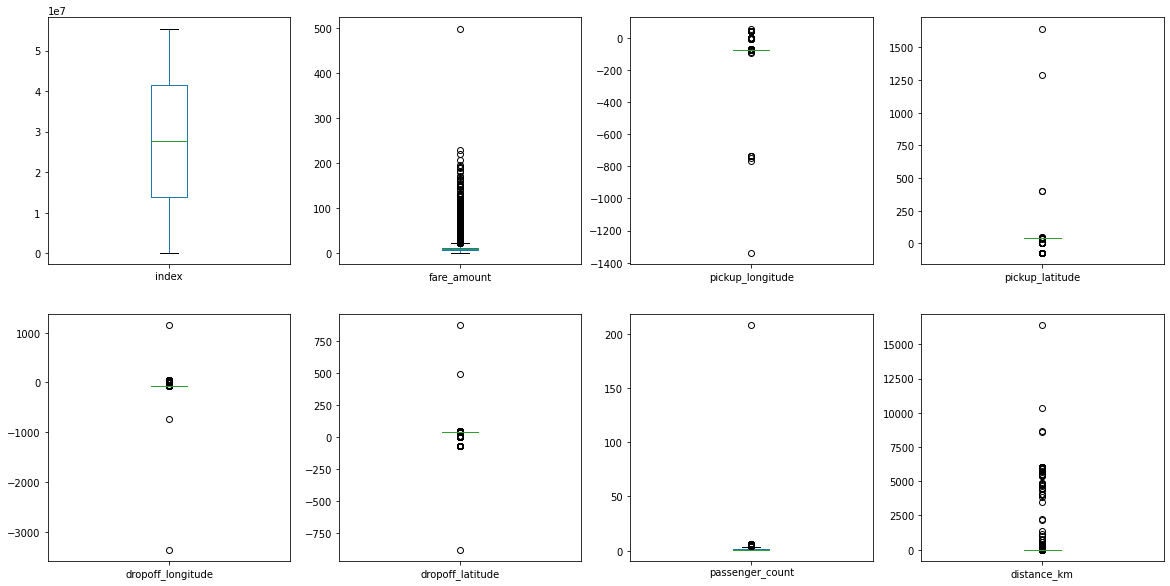

In [ ]:
fig, axes = plt.subplots(2,4, figsize=(20,10))

for i, n in enumerate(list_num) :
  a = dfd.boxplot(n, ax=axes.flatten()[i],grid=False)
plt.show()

In [ ]:
for i, n in enumerate(list_num) :
  dfd['zscore {}'.format(n)] = stats.zscore(df[n],axis=0)

dfd

index                          key_y  fare_amount  \
0       24238194    2015-05-07 19:52:06.0000003          7.5   
1       27835199    2009-07-17 20:04:56.0000002          7.7   
2       44984355   2009-08-24 21:45:00.00000061         12.9   
3       25894730    2009-06-26 08:22:21.0000001          5.3   
4       17610152  2014-08-28 17:47:00.000000188         16.0   
...          ...                            ...          ...   
199995  42598914   2012-10-28 10:49:00.00000053          3.0   
199996  16382965    2014-03-14 01:09:00.0000008          7.5   
199997  27804658   2009-06-29 00:42:00.00000078         30.9   
199998  20259894    2015-05-20 14:56:25.0000004         14.5   
199999  11951496   2010-05-15 04:08:00.00000076         14.1   

           pickup_datetime pickup_date pickup_day day_category  \
0      2015-05-07 19:52:06  2015-05-07   Thursday     Weekdays   
1      2009-07-17 20:04:56  2009-07-17     Friday     Weekdays   
2      2009-08-24 21:45:00  2009-08-24     Monday     Weekdays   
3      2009-06-26 08:22:21  2009-06-26     Friday     Weekdays   
4      2014-08-28 17:47:00  2014-08-28   Thursday     Weekdays   
...                    ...         ...        ...          ...   
199995 2012-10-28 10:49:00  2012-10-28     Sunday      Weekend   
199996 2014-03-14 01:09:00  2014-03-14     Friday     Weekdays   
199997 2009-06-29 00:42:00  2009-06-29     Monday     Weekdays   
199998 2015-05-20 14:56:25  2015-05-20  Wednesday     Weekdays   
199999 2010-05-15 04:08:00  2010-05-15   Saturday      Weekend   

        pickup_longitude  pickup_latitude  dropoff_longitude  ...  \
0             -73.999817        40.738354         -73.999512  ...   
1             -73.994355        40.728225         -73.994710  ...   
2             -74.005043        40.740770         -73.962565  ...   
3             -73.976124        40.790844         -73.965316  ...   
4             -73.925023        40.744085         -73.973082  ...   
...                  ...              ...                ...  ...   
199995        -73.987042        40.739367         -73.986525  ...   
199996        -73.984722        40.736837         -74.006672  ...   
199997        -73.986017        40.756487         -73.858957  ...   
199998        -73.997124        40.725452         -73.983215  ...   
199999        -73.984395        40.720077         -73.985508  ...   

        distance_km  distance_lvl  zscore index zscore fare_amount  \
0          1.683349          Near     -0.216905          -0.395395   
1          2.457628          Near      0.007797          -0.374870   
2          5.036456      Moderate      1.079092           0.158762   
3          1.661710          Near     -0.113422          -0.621163   
4          4.475520          Near     -0.630953           0.476890   
...             ...           ...           ...                ...   
199995     0.112212          Near      0.930075          -0.857192   
199996     1.875080          Near     -0.707614          -0.395395   
199997    12.850521           Far      0.005890           2.005953   
199998     3.539771          Near     -0.465426           0.322957   
199999     5.417869      Moderate     -0.984445           0.281908   

        zscore pickup_longitude  zscore pickup_latitude  \
0                     -0.012451                0.005929   
1                     -0.011452                0.004071   
2                     -0.013406                0.006372   
3                     -0.008120                0.015556   
4                      0.001221                0.006980   
...                         ...                     ...   
199995                -0.010115                0.006115   
199996                -0.009691                0.005651   
199997                -0.009928                0.009255   
199998                -0.011958                0.003563   
199999                -0.009632                0.002577   

        zscore dropoff_longitude  zscore dropoff_latitude  \
0        

In [ ]:
o1 = (dfd['zscore fare_amount'] > 3 )| (dfd['zscore fare_amount'] < (-3))
o2 = (dfd['zscore pickup_longitude'] > 3) | (dfd['zscore pickup_longitude'] < (-3))
o3 = (dfd['zscore pickup_latitude'] > 3) | (dfd['zscore pickup_latitude'] < (-3))
o4 = (dfd['zscore dropoff_longitude'] > 3) | (dfd['zscore dropoff_longitude'] < (-3))
o5 = (dfd['zscore dropoff_latitude'] > 3) | (dfd['zscore dropoff_latitude'] < (-3))
o6 = (dfd['zscore passenger_count'] > 3) | (dfd['zscore passenger_count'] < (-3))
o7 = (dfd['zscore distance_km'] > 3) | (dfd['zscore distance_km'] < (-3))
o = dfd[(o1 | o2 | o3 | o4 | o5 | o6 | o7)]
o

index                          key_y  fare_amount  \
104     46435788    2015-05-15 18:58:16.0000001        43.00   
145     26097408    2015-06-16 09:54:20.0000006        38.54   
169     17269533  2010-07-14 17:38:00.000000133        14.50   
204      6403066    2010-11-13 07:21:00.0000008        45.00   
226     24085207    2012-07-29 17:04:36.0000001        49.80   
...          ...                            ...          ...   
199957  24558911  2013-02-25 09:51:00.000000170        24.50   
199972  31236221    2010-08-20 13:19:55.0000001        45.00   
199976   1780041  2011-10-18 23:53:00.000000145        49.70   
199977  21117828    2012-11-20 21:04:30.0000001        43.50   
199982  13096190    2014-08-06 11:06:06.0000001        57.33   

           pickup_datetime pickup_date pickup_day day_category  \
104    2015-05-15 18:58:16  2015-05-15     Friday     Weekdays   
145    2015-06-16 09:54:20  2015-06-16    Tuesday     Weekdays   
169    2010-07-14 17:38:00  2010-07-14  Wednesday     Weekdays   
204    2010-11-13 07:21:00  2010-11-13   Saturday      Weekend   
226    2012-07-29 17:04:36  2012-07-29     Sunday      Weekend   
...                    ...         ...        ...          ...   
199957 2013-02-25 09:51:00  2013-02-25     Monday     Weekdays   
199972 2010-08-20 13:19:55  2010-08-20     Friday     Weekdays   
199976 2011-10-18 23:53:00  2011-10-18    Tuesday     Weekdays   
199977 2012-11-20 21:04:30  2012-11-20    Tuesday     Weekdays   
199982 2014-08-06 11:06:06  2014-08-06  Wednesday     Weekdays   

        pickup_longitude  pickup_latitude  dropoff_longitude  ...  \
104           -73.862701        40.768959         -73.999092  ...   
145           -73.862762        40.768791         -73.978737  ...   
169             0.001782         0.007380           0.000875  ...   
204           -73.971663        40.757812         -73.789273  ...   
226           -73.992122        40.748577         -73.806072  ...   
...                  ...              ...                ...  ...   
199957        -73.951662        40.773657         -73.861885  ...   
199972        -73.786833        40.639842         -74.001215  ...   
199976        -73.978225        40.783318         -73.700963  ...   
199977        -73.996671        40.737483         -73.867758  ...   
199982        -73.969204        40.754771         -73.790351  ...   

        distance_km  distance_lvl  zscore index zscore fare_amount  \
104       11.877931           Far      1.169762           3.247675   
145        9.923711      Moderate     -0.100761           2.789982   
169        0.215238          Near     -0.652231           0.322957   
204       20.071377           Far     -1.331051           3.452918   
226       18.214179           Far     -0.226462           3.945502   
...             ...           ...           ...                ...   
199957     7.592958      Moderate     -0.196870           1.349174   
199972    20.276756           Far      0.220257           3.452918   
199976    24.895786           Far     -1.619848           3.935240   
199977    20.845649           Far     -0.411831           3.298986   
199982    19.483353           Far     -0.912937           4.718244   

        zscore pickup_longitude  zscore pickup_latitude  \
104                    0.012613                0.011542   
145                    0.012602                0.011511   
169                   13.514610               -7.464134   
204                   -0.007304                0.009498   
226                   -0.011044                0.007804   
...                         ...                     ...   
199957                -0.003648                0.012404   
199972                 0.026482               -0.012138   
199976                -0.008504                0.014175   
199977                -0.011876                0.005769   
199982                -0.006855                0.008940   

        zscore dropoff_longitude  zscore dropoff_latitude  \
104      

In [ ]:
#Remove Outlier
dfd_clean = dfd.copy()
dfd_clean = dfd_clean[~(o1 | o2 | o3 | o4 | o5 | o6 | o7)]
dfd_clean

index                          key_y  fare_amount  \
0       24238194    2015-05-07 19:52:06.0000003          7.5   
1       27835199    2009-07-17 20:04:56.0000002          7.7   
2       44984355   2009-08-24 21:45:00.00000061         12.9   
3       25894730    2009-06-26 08:22:21.0000001          5.3   
4       17610152  2014-08-28 17:47:00.000000188         16.0   
...          ...                            ...          ...   
199995  42598914   2012-10-28 10:49:00.00000053          3.0   
199996  16382965    2014-03-14 01:09:00.0000008          7.5   
199997  27804658   2009-06-29 00:42:00.00000078         30.9   
199998  20259894    2015-05-20 14:56:25.0000004         14.5   
199999  11951496   2010-05-15 04:08:00.00000076         14.1   

           pickup_datetime pickup_date pickup_day day_category  \
0      2015-05-07 19:52:06  2015-05-07   Thursday     Weekdays   
1      2009-07-17 20:04:56  2009-07-17     Friday     Weekdays   
2      2009-08-24 21:45:00  2009-08-24     Monday     Weekdays   
3      2009-06-26 08:22:21  2009-06-26     Friday     Weekdays   
4      2014-08-28 17:47:00  2014-08-28   Thursday     Weekdays   
...                    ...         ...        ...          ...   
199995 2012-10-28 10:49:00  2012-10-28     Sunday      Weekend   
199996 2014-03-14 01:09:00  2014-03-14     Friday     Weekdays   
199997 2009-06-29 00:42:00  2009-06-29     Monday     Weekdays   
199998 2015-05-20 14:56:25  2015-05-20  Wednesday     Weekdays   
199999 2010-05-15 04:08:00  2010-05-15   Saturday      Weekend   

        pickup_longitude  pickup_latitude  dropoff_longitude  ...  \
0             -73.999817        40.738354         -73.999512  ...   
1             -73.994355        40.728225         -73.994710  ...   
2             -74.005043        40.740770         -73.962565  ...   
3             -73.976124        40.790844         -73.965316  ...   
4             -73.925023        40.744085         -73.973082  ...   
...                  ...              ...                ...  ...   
199995        -73.987042        40.739367         -73.986525  ...   
199996        -73.984722        40.736837         -74.006672  ...   
199997        -73.986017        40.756487         -73.858957  ...   
199998        -73.997124        40.725452         -73.983215  ...   
199999        -73.984395        40.720077         -73.985508  ...   

        distance_km  distance_lvl  zscore index zscore fare_amount  \
0          1.683349          Near     -0.216905          -0.395395   
1          2.457628          Near      0.007797          -0.374870   
2          5.036456      Moderate      1.079092           0.158762   
3          1.661710          Near     -0.113422          -0.621163   
4          4.475520          Near     -0.630953           0.476890   
...             ...           ...           ...                ...   
199995     0.112212          Near      0.930075          -0.857192   
199996     1.875080          Near     -0.707614          -0.395395   
199997    12.850521           Far      0.005890           2.005953   
199998     3.539771          Near     -0.465426           0.322957   
199999     5.417869      Moderate     -0.984445           0.281908   

        zscore pickup_longitude  zscore pickup_latitude  \
0                     -0.012451                0.005929   
1                     -0.011452                0.004071   
2                     -0.013406                0.006372   
3                     -0.008120                0.015556   
4                      0.001221                0.006980   
...                         ...                     ...   
199995                -0.010115                0.006115   
199996                -0.009691                0.005651   
199997                -0.009928                0.009255   
199998                -0.011958                0.003563   
199999                -0.009632                0.002577   

        zscore dropoff_longitude  zscore dropoff_latitude  \
0        

In [ ]:
dfd_clean.reset_index(inplace=True, drop=True)

In [ ]:
dfd_clean

index                          key_y  fare_amount  \
0       24238194    2015-05-07 19:52:06.0000003          7.5   
1       27835199    2009-07-17 20:04:56.0000002          7.7   
2       44984355   2009-08-24 21:45:00.00000061         12.9   
3       25894730    2009-06-26 08:22:21.0000001          5.3   
4       17610152  2014-08-28 17:47:00.000000188         16.0   
...          ...                            ...          ...   
183858  42598914   2012-10-28 10:49:00.00000053          3.0   
183859  16382965    2014-03-14 01:09:00.0000008          7.5   
183860  27804658   2009-06-29 00:42:00.00000078         30.9   
183861  20259894    2015-05-20 14:56:25.0000004         14.5   
183862  11951496   2010-05-15 04:08:00.00000076         14.1   

           pickup_datetime pickup_date pickup_day day_category  \
0      2015-05-07 19:52:06  2015-05-07   Thursday     Weekdays   
1      2009-07-17 20:04:56  2009-07-17     Friday     Weekdays   
2      2009-08-24 21:45:00  2009-08-24     Monday     Weekdays   
3      2009-06-26 08:22:21  2009-06-26     Friday     Weekdays   
4      2014-08-28 17:47:00  2014-08-28   Thursday     Weekdays   
...                    ...         ...        ...          ...   
183858 2012-10-28 10:49:00  2012-10-28     Sunday      Weekend   
183859 2014-03-14 01:09:00  2014-03-14     Friday     Weekdays   
183860 2009-06-29 00:42:00  2009-06-29     Monday     Weekdays   
183861 2015-05-20 14:56:25  2015-05-20  Wednesday     Weekdays   
183862 2010-05-15 04:08:00  2010-05-15   Saturday      Weekend   

        pickup_longitude  pickup_latitude  dropoff_longitude  ...  \
0             -73.999817        40.738354         -73.999512  ...   
1             -73.994355        40.728225         -73.994710  ...   
2             -74.005043        40.740770         -73.962565  ...   
3             -73.976124        40.790844         -73.965316  ...   
4             -73.925023        40.744085         -73.973082  ...   
...                  ...              ...                ...  ...   
183858        -73.987042        40.739367         -73.986525  ...   
183859        -73.984722        40.736837         -74.006672  ...   
183860        -73.986017        40.756487         -73.858957  ...   
183861        -73.997124        40.725452         -73.983215  ...   
183862        -73.984395        40.720077         -73.985508  ...   

        distance_km  distance_lvl  zscore index zscore fare_amount  \
0          1.683349          Near     -0.216905          -0.395395   
1          2.457628          Near      0.007797          -0.374870   
2          5.036456      Moderate      1.079092           0.158762   
3          1.661710          Near     -0.113422          -0.621163   
4          4.475520          Near     -0.630953           0.476890   
...             ...           ...           ...                ...   
183858     0.112212          Near      0.930075          -0.857192   
183859     1.875080          Near     -0.707614          -0.395395   
183860    12.850521           Far      0.005890           2.005953   
183861     3.539771          Near     -0.465426           0.322957   
183862     5.417869      Moderate     -0.984445           0.281908   

        zscore pickup_longitude  zscore pickup_latitude  \
0                     -0.012451                0.005929   
1                     -0.011452                0.004071   
2                     -0.013406                0.006372   
3                     -0.008120                0.015556   
4                      0.001221                0.006980   
...                         ...                     ...   
183858                -0.010115                0.006115   
183859                -0.009691                0.005651   
183860                -0.009928                0.009255   
183861                -0.011958                0.003563   
183862                -0.009632                0.002577   

        zscore dropoff_longitude  zscore dropoff_latitude  \
0        

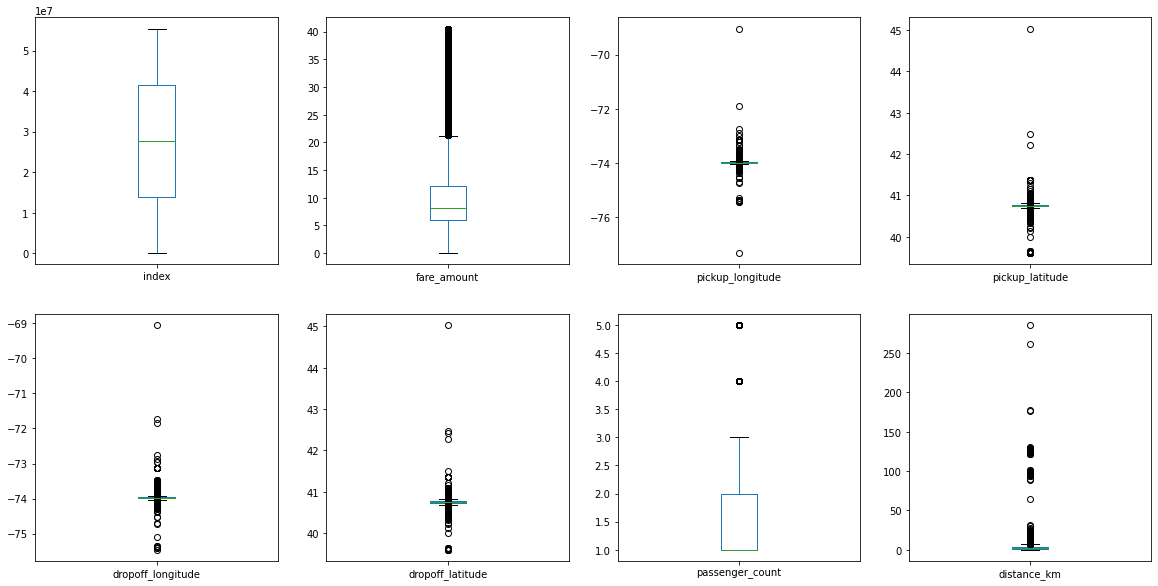

In [ ]:
fig, axes = plt.subplots(2,4, figsize=(20,10))

for i, n in enumerate(list_num) :
  a = dfd_clean.boxplot(n, ax=axes.flatten()[i],grid=False)
plt.show()

In [ ]:
dfd_clean[dfd_clean['distance_km'] > 150]

index                         key_y  fare_amount  \
22799    1200661   2011-02-17 18:30:35.0000002         27.3   
34231   35004236   2011-05-28 07:49:41.0000003         17.3   
108772  53525036  2012-02-28 22:42:00.00000041          9.7   
161762  21734118  2014-03-17 13:25:00.00000012         20.5   

           pickup_datetime pickup_date pickup_day day_category  \
22799  2011-02-17 18:30:35  2011-02-17   Thursday     Weekdays   
34231  2011-05-28 07:49:41  2011-05-28   Saturday      Weekend   
108772 2012-02-28 22:42:00  2012-02-28    Tuesday     Weekdays   
161762 2014-03-17 13:25:00  2014-03-17     Monday     Weekdays   

        pickup_longitude  pickup_latitude  dropoff_longitude  ...  \
22799         -75.426904        40.774075         -73.971779  ...   
34231         -73.967302        40.759383         -75.458979  ...   
108772        -77.316665        40.800965         -73.924625  ...   
161762        -73.955800        40.772690         -71.718700  ...   

        distance_km  distance_lvl  zscore index zscore fare_amount  \
22799    177.998427           Far     -1.656041           1.636515   
34231    176.521852           Far      0.455642           0.610298   
108772   285.467392           Far      1.612621          -0.169627   
161762   261.376763           Far     -0.373332           0.938687   

        zscore pickup_longitude  zscore pickup_latitude  \
22799                 -0.273314                0.012480   
34231                 -0.006507                0.009786   
108772                -0.618751                0.017412   
161762                -0.004405                0.012226   

        zscore dropoff_longitude  zscore dropoff_latitude  \
22799                  -0.006210                -0.266332   
34231                  -0.179801                -0.258405   
108772                 -0.000706                 0.033477   
161762                  0.256778                 0.433256   

        zscore passenger_count  zscore distance_km  
22799                -0.498040            1.827199  
34231                -0.498040            1.811619  
108772                0.943503            2.961168  
161762               -0.498040            2.706974  

[4 rows x 22 columns]

In [ ]:
dfd_clean = dfd_clean[~(dfd_clean['distance_km'] > 150)]
dfd_clean

index                          key_y  fare_amount  \
0       24238194    2015-05-07 19:52:06.0000003          7.5   
1       27835199    2009-07-17 20:04:56.0000002          7.7   
2       44984355   2009-08-24 21:45:00.00000061         12.9   
3       25894730    2009-06-26 08:22:21.0000001          5.3   
4       17610152  2014-08-28 17:47:00.000000188         16.0   
...          ...                            ...          ...   
183858  42598914   2012-10-28 10:49:00.00000053          3.0   
183859  16382965    2014-03-14 01:09:00.0000008          7.5   
183860  27804658   2009-06-29 00:42:00.00000078         30.9   
183861  20259894    2015-05-20 14:56:25.0000004         14.5   
183862  11951496   2010-05-15 04:08:00.00000076         14.1   

           pickup_datetime pickup_date pickup_day day_category  \
0      2015-05-07 19:52:06  2015-05-07   Thursday     Weekdays   
1      2009-07-17 20:04:56  2009-07-17     Friday     Weekdays   
2      2009-08-24 21:45:00  2009-08-24     Monday     Weekdays   
3      2009-06-26 08:22:21  2009-06-26     Friday     Weekdays   
4      2014-08-28 17:47:00  2014-08-28   Thursday     Weekdays   
...                    ...         ...        ...          ...   
183858 2012-10-28 10:49:00  2012-10-28     Sunday      Weekend   
183859 2014-03-14 01:09:00  2014-03-14     Friday     Weekdays   
183860 2009-06-29 00:42:00  2009-06-29     Monday     Weekdays   
183861 2015-05-20 14:56:25  2015-05-20  Wednesday     Weekdays   
183862 2010-05-15 04:08:00  2010-05-15   Saturday      Weekend   

        pickup_longitude  pickup_latitude  dropoff_longitude  ...  \
0             -73.999817        40.738354         -73.999512  ...   
1             -73.994355        40.728225         -73.994710  ...   
2             -74.005043        40.740770         -73.962565  ...   
3             -73.976124        40.790844         -73.965316  ...   
4             -73.925023        40.744085         -73.973082  ...   
...                  ...              ...                ...  ...   
183858        -73.987042        40.739367         -73.986525  ...   
183859        -73.984722        40.736837         -74.006672  ...   
183860        -73.986017        40.756487         -73.858957  ...   
183861        -73.997124        40.725452         -73.983215  ...   
183862        -73.984395        40.720077         -73.985508  ...   

        distance_km  distance_lvl  zscore index zscore fare_amount  \
0          1.683349          Near     -0.216905          -0.395395   
1          2.457628          Near      0.007797          -0.374870   
2          5.036456      Moderate      1.079092           0.158762   
3          1.661710          Near     -0.113422          -0.621163   
4          4.475520          Near     -0.630953           0.476890   
...             ...           ...           ...                ...   
183858     0.112212          Near      0.930075          -0.857192   
183859     1.875080          Near     -0.707614          -0.395395   
183860    12.850521           Far      0.005890           2.005953   
183861     3.539771          Near     -0.465426           0.322957   
183862     5.417869      Moderate     -0.984445           0.281908   

        zscore pickup_longitude  zscore pickup_latitude  \
0                     -0.012451                0.005929   
1                     -0.011452                0.004071   
2                     -0.013406                0.006372   
3                     -0.008120                0.015556   
4                      0.001221                0.006980   
...                         ...                     ...   
183858                -0.010115                0.006115   
183859                -0.009691                0.005651   
183860                -0.009928                0.009255   
183861                -0.011958                0.003563   
183862                -0.009632                0.002577   

        zscore dropoff_longitude  zscore dropoff_latitude  \
0        

In [ ]:
dfd_clean.reset_index(inplace=True, drop=True)

In [ ]:
dfd_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183859 entries, 0 to 183858
Data columns (total 22 columns):
 #   Column                    Non-Null Count   Dtype         
---  ------                    --------------   -----         
 0   index                     183859 non-null  int64         
 1   key_y                     183859 non-null  object        
 2   fare_amount               183859 non-null  float64       
 3   pickup_datetime           183859 non-null  datetime64[ns]
 4   pickup_date               183859 non-null  object        
 5   pickup_day                183859 non-null  object        
 6   day_category              183859 non-null  object        
 7   pickup_longitude          183859 non-null  float64       
 8   pickup_latitude           183859 non-null  float64       
 9   dropoff_longitude         183859 non-null  float64       
 10  dropoff_latitude          183859 non-null  float64       
 11  passenger_count           183859 non-null  int64         
 12  di

In [ ]:
list_drop_col = dfd_clean.columns.tolist()
drop_col = list_drop_col[14:]
dfd_clean = dfd_clean.drop(columns=drop_col,axis=1)
dfd_clean

index                          key_y  fare_amount  \
0       24238194    2015-05-07 19:52:06.0000003          7.5   
1       27835199    2009-07-17 20:04:56.0000002          7.7   
2       44984355   2009-08-24 21:45:00.00000061         12.9   
3       25894730    2009-06-26 08:22:21.0000001          5.3   
4       17610152  2014-08-28 17:47:00.000000188         16.0   
...          ...                            ...          ...   
183854  42598914   2012-10-28 10:49:00.00000053          3.0   
183855  16382965    2014-03-14 01:09:00.0000008          7.5   
183856  27804658   2009-06-29 00:42:00.00000078         30.9   
183857  20259894    2015-05-20 14:56:25.0000004         14.5   
183858  11951496   2010-05-15 04:08:00.00000076         14.1   

           pickup_datetime pickup_date pickup_day day_category  \
0      2015-05-07 19:52:06  2015-05-07   Thursday     Weekdays   
1      2009-07-17 20:04:56  2009-07-17     Friday     Weekdays   
2      2009-08-24 21:45:00  2009-08-24     Monday     Weekdays   
3      2009-06-26 08:22:21  2009-06-26     Friday     Weekdays   
4      2014-08-28 17:47:00  2014-08-28   Thursday     Weekdays   
...                    ...         ...        ...          ...   
183854 2012-10-28 10:49:00  2012-10-28     Sunday      Weekend   
183855 2014-03-14 01:09:00  2014-03-14     Friday     Weekdays   
183856 2009-06-29 00:42:00  2009-06-29     Monday     Weekdays   
183857 2015-05-20 14:56:25  2015-05-20  Wednesday     Weekdays   
183858 2010-05-15 04:08:00  2010-05-15   Saturday      Weekend   

        pickup_longitude  pickup_latitude  dropoff_longitude  \
0             -73.999817        40.738354         -73.999512   
1             -73.994355        40.728225         -73.994710   
2             -74.005043        40.740770         -73.962565   
3             -73.976124        40.790844         -73.965316   
4             -73.925023        40.744085         -73.973082   
...                  ...              ...                ...   
183854        -73.987042        40.739367         -73.986525   
183855        -73.984722        40.736837         -74.006672   
183856        -73.986017        40.756487         -73.858957   
183857        -73.997124        40.725452         -73.983215   
183858        -73.984395        40.720077         -73.985508   

        dropoff_latitude  passenger_count  distance_km distance_lvl  
0              40.723217                1     1.683349         Near  
1              40.750325                1     2.457628         Near  
2              40.772647                1     5.036456     Moderate  
3              40.803349                3     1.661710         Near  
4              40.761247                5     4.475520         Near  
...                  ...              ...          ...          ...  
183854         40.740297                1     0.112212         Near  
183855         40.739620                1     1.875080         Near  
183856         40.692588                2    12.850521          Far  
183857         40.695416                1     3.539771         Near  
183858         40.768793                1     5.417869     Moderate  

[183859 rows x 14 columns]

In [ ]:
#to check latitude and longitude should not be zero (because location is in middle of Atlantic Ocean, so need to drop all the values )
dfd_clean[((dfd_clean['pickup_longitude'] == 0) | (dfd_clean['pickup_latitude'] == 0) | (dfd_clean['dropoff_longitude'] == 0) | (dfd_clean['dropoff_longitude'] == 0))]

Empty DataFrame
Columns: [index, key_y, fare_amount, pickup_datetime, pickup_date, pickup_day, day_category, pickup_longitude, pickup_latitude, dropoff_longitude, dropoff_latitude, passenger_count, distance_km, distance_lvl]
Index: []

In [ ]:
#adding some new column
dfd_clean['pickup_day_num'] = dfd_clean['pickup_datetime'].dt.day
dfd_clean['pickup_year'] = dfd_clean['pickup_datetime'].dt.year
dfd_clean['pickup_month'] = dfd_clean['pickup_datetime'].dt.month
dfd_clean['pickup_hour'] = dfd_clean['pickup_datetime'].dt.hour
dfd_clean['distance_miles'] = dfd_clean['distance_km']*0.621371
dfd_clean['month_year'] = dfd_clean['pickup_datetime'].dt.to_period('M')

In [ ]:
dfd_clean = dfd_clean.drop(columns='index')
dfd_clean

key_y  fare_amount     pickup_datetime  \
0         2015-05-07 19:52:06.0000003          7.5 2015-05-07 19:52:06   
1         2009-07-17 20:04:56.0000002          7.7 2009-07-17 20:04:56   
2        2009-08-24 21:45:00.00000061         12.9 2009-08-24 21:45:00   
3         2009-06-26 08:22:21.0000001          5.3 2009-06-26 08:22:21   
4       2014-08-28 17:47:00.000000188         16.0 2014-08-28 17:47:00   
...                               ...          ...                 ...   
183854   2012-10-28 10:49:00.00000053          3.0 2012-10-28 10:49:00   
183855    2014-03-14 01:09:00.0000008          7.5 2014-03-14 01:09:00   
183856   2009-06-29 00:42:00.00000078         30.9 2009-06-29 00:42:00   
183857    2015-05-20 14:56:25.0000004         14.5 2015-05-20 14:56:25   
183858   2010-05-15 04:08:00.00000076         14.1 2010-05-15 04:08:00   

       pickup_date pickup_day day_category  pickup_longitude  pickup_latitude  \
0       2015-05-07   Thursday     Weekdays        -73.999817        40.738354   
1       2009-07-17     Friday     Weekdays        -73.994355        40.728225   
2       2009-08-24     Monday     Weekdays        -74.005043        40.740770   
3       2009-06-26     Friday     Weekdays        -73.976124        40.790844   
4       2014-08-28   Thursday     Weekdays        -73.925023        40.744085   
...            ...        ...          ...               ...              ...   
183854  2012-10-28     Sunday      Weekend        -73.987042        40.739367   
183855  2014-03-14     Friday     Weekdays        -73.984722        40.736837   
183856  2009-06-29     Monday     Weekdays        -73.986017        40.756487   
183857  2015-05-20  Wednesday     Weekdays        -73.997124        40.725452   
183858  2010-05-15   Saturday      Weekend        -73.984395        40.720077   

        dropoff_longitude  dropoff_latitude  passenger_count  distance_km  \
0              -73.999512         40.723217                1     1.683349   
1              -73.994710         40.750325                1     2.457628   
2              -73.962565         40.772647                1     5.036456   
3              -73.965316         40.803349                3     1.661710   
4              -73.973082         40.761247                5     4.475520   
...                   ...               ...              ...          ...   
183854         -73.986525         40.740297                1     0.112212   
183855         -74.006672         40.739620                1     1.875080   
183856         -73.858957         40.692588                2    12.850521   
183857         -73.983215         40.695416                1     3.539771   
183858         -73.985508         40.768793                1     5.417869   

       distance_lvl  pickup_day_num  pickup_year  pickup_month  pickup_hour  \
0              Near               7         2015             5           19   
1              Near              17         2009             7           20   
2          Moderate              24         2009             8           21   
3              Near              26         2009             6            8   
4              Near              28         2014             8           17   
...             ...             ...          ...           ...          ...   
183854         Near              28         2012            10           10   
183855         Near              14         2014             3            1   
183856          Far              29         2009             6            0   
183857         Near              20         2015             5           14   
183858     Moderate              15         2010             5            4   

        distance_miles month_year  
0             1.045984    2015-05  
1             1.527099    2009-07  
2             3.129508    2009-08  
3             1.032538    2009-06  
4             2.780958    2014-08  
...                ...        ...  
183854        0.069725    2012-10  
183855  

In [ ]:
dfd_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183859 entries, 0 to 183858
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   key_y              183859 non-null  object        
 1   fare_amount        183859 non-null  float64       
 2   pickup_datetime    183859 non-null  datetime64[ns]
 3   pickup_date        183859 non-null  object        
 4   pickup_day         183859 non-null  object        
 5   day_category       183859 non-null  object        
 6   pickup_longitude   183859 non-null  float64       
 7   pickup_latitude    183859 non-null  float64       
 8   dropoff_longitude  183859 non-null  float64       
 9   dropoff_latitude   183859 non-null  float64       
 10  passenger_count    183859 non-null  int64         
 11  distance_km        183859 non-null  float64       
 12  distance_lvl       183859 non-null  object        
 13  pickup_day_num     183859 non-null  int64   

In [ ]:
#dfd_clean.to_csv('uber_clean.csv')

# EDA

## Descriptive Statistic

In [ ]:
dfd_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183859 entries, 0 to 183858
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   key_y              183859 non-null  object        
 1   fare_amount        183859 non-null  float64       
 2   pickup_datetime    183859 non-null  datetime64[ns]
 3   pickup_date        183859 non-null  object        
 4   pickup_day         183859 non-null  object        
 5   day_category       183859 non-null  object        
 6   pickup_longitude   183859 non-null  float64       
 7   pickup_latitude    183859 non-null  float64       
 8   dropoff_longitude  183859 non-null  float64       
 9   dropoff_latitude   183859 non-null  float64       
 10  passenger_count    183859 non-null  int64         
 11  distance_km        183859 non-null  float64       
 12  distance_lvl       183859 non-null  object        
 13  pickup_day_num     183859 non-null  int64   

In [ ]:
num = dfd_clean.select_dtypes(include='number')
list_num = num.columns.tolist()
list_num

['fare_amount',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count',
 'distance_km',
 'pickup_day_num',
 'pickup_year',
 'pickup_month',
 'pickup_hour',
 'distance_miles']

In [ ]:
num_ds = dfd_clean[list_num].describe()

In [ ]:
num_ds.loc['kurtosis'] = dfd_clean[list_num].kurt()
num_ds.loc['skewness'] = dfd_clean[list_num].skew()
num_ds.loc['variance'] = dfd_clean[list_num].var()
num_ds.loc['median'] = dfd_clean[list_num].median()
num_ds

fare_amount  pickup_longitude  pickup_latitude  dropoff_longitude  \
count     183859.000000     183859.000000    183859.000000      183859.000000   
mean          10.167161        -73.977833        40.751903         -73.975788   
std            6.381326          0.032939         0.029821           0.033363   
min            0.010000        -75.419276        39.603895         -75.423067   
25%            6.000000        -73.992413        40.737103         -73.991607   
50%            8.100000        -73.982300        40.753587         -73.980698   
75%           12.100000        -73.969302        40.767684         -73.966221   
max           40.540000        -69.041415        45.031653         -69.046738   
kurtosis       4.356477       2997.300010      2587.398033        2831.531499   
skewness       1.955730         21.107235        13.503584          19.818235   
variance      40.721320          0.001085         0.000889           0.001113   
median         8.100000        -73.982300        40.753587         -73.980698   

          dropoff_latitude  passenger_count    distance_km  pickup_day_num  \
count        183859.000000    183859.000000  183859.000000   183859.000000   
mean             40.752034         1.593694       2.994937       15.705998   
std               0.033565         1.150663       3.105445        8.689367   
min              39.603429         1.000000       0.000084        1.000000   
25%              40.736303         1.000000       1.263172        8.000000   
50%              40.754079         1.000000       2.128689       16.000000   
75%              40.768440         2.000000       3.734341       23.000000   
max              45.031598         5.000000     130.544448       31.000000   
kurtosis       1643.395586         3.080258     399.344919       -1.164206   
skewness          8.511294         2.052572      12.059732        0.017723   
variance          0.001127         1.324026       9.643791       75.505100   
median           40.754079         1.000000       2.128689       16.000000   

            pickup_year   pickup_month    pickup_hour  distance_miles  
count     183859.000000  183859.000000  183859.000000   183859.000000  
mean        2011.704371       6.278034      13.496821        1.860967  
std            1.861436       3.441453       6.535107        1.929634  
min         2009.000000       1.000000       0.000000        0.000052  
25%         2010.000000       3.000000       9.000000        0.784898  
50%         2012.000000       6.000000      14.000000        1.322706  
75%         2013.000000       9.000000      19.000000        2.320412  
max         2015.000000      12.000000      23.000000       81.116534  
kurtosis      -1.142391      -1.202059      -0.777300      399.344919  
skewness       0.090104       0.109939      -0.435873       12.059732  
variance       3.464942      11.843598      42.707627        3.723486  
median      2012.000000       6.000000      14.000000        1.322706

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5ec7830f90>,
      dtype=object)

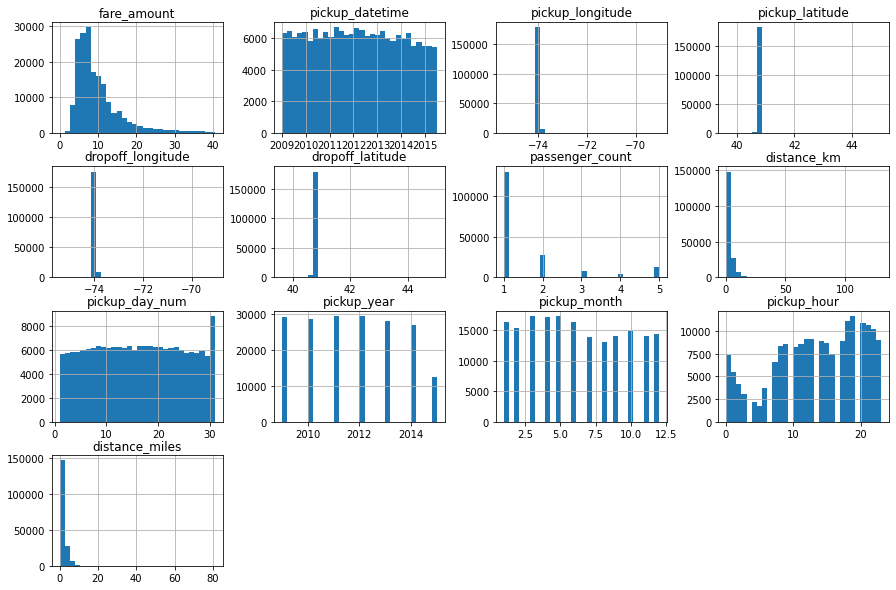

In [ ]:
dfd_clean.hist(bins=30, figsize=(15,10))

- The data distribution of fare_amount, passenger_count, and distance_km are positively skewed (tail long to right), indicating most of the data is in low value.
- The data distribution of pickup_hour is slightly negatively skewed (tail long to left), indicating most of the data is in high value.


In [ ]:
not_num = dfd_clean.select_dtypes(exclude= 'number')
list_not_num = not_num.columns.tolist()
list_not_num

['key_y',
 'pickup_datetime',
 'pickup_date',
 'pickup_day',
 'day_category',
 'distance_lvl',
 'month_year']

In [ ]:
not_num_ds = dfd_clean[list_not_num].describe()
not_num_ds

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning:

Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.



key_y      pickup_datetime pickup_date  \
count                        183859               183859      183859   
unique                       183859               181090        2372   
top     2015-05-07 19:52:06.0000003  2010-03-14 12:00:00  2009-12-11   
freq                              1                    4         124   
first                           NaN  2009-01-01 01:15:22         NaN   
last                            NaN  2015-06-30 23:40:39         NaN   

       pickup_day day_category distance_lvl month_year  
count      183859       183859       183859     183859  
unique          7            2            3         78  
top        Friday     Weekdays         Near    2011-03  
freq        28364       131639       155096       2660  
first         NaN          NaN          NaN        NaN  
last          NaN          NaN          NaN        NaN

Text(0.5, 1.0, 'Trend in trips from Jan 2009 - June 2015')

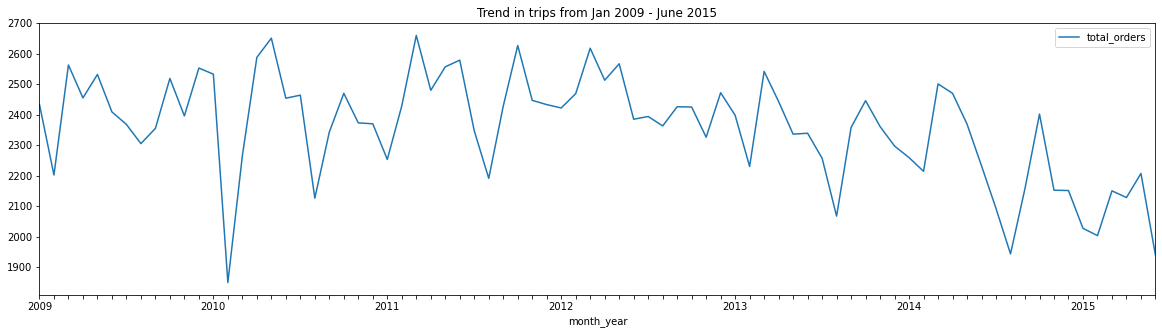

In [ ]:
group_my= dfd_clean.groupby('month_year',as_index=False)
trend_my = group_my['key_y'].count()
trend_my.columns = ['month_year','total_orders']

# fig, ax =plt.subplots(figsize = (20,5))
ax = trend_my.plot(x='month_year',y='total_orders',kind='line',figsize=(20,5))
ax.set_xticks(trend_my['month_year'])
ax.set_title('Trend in trips from Jan 2009 - June 2015')

Text(0.5, 1.0, 'Trend in fare average from Jan 2009 - June 2015')

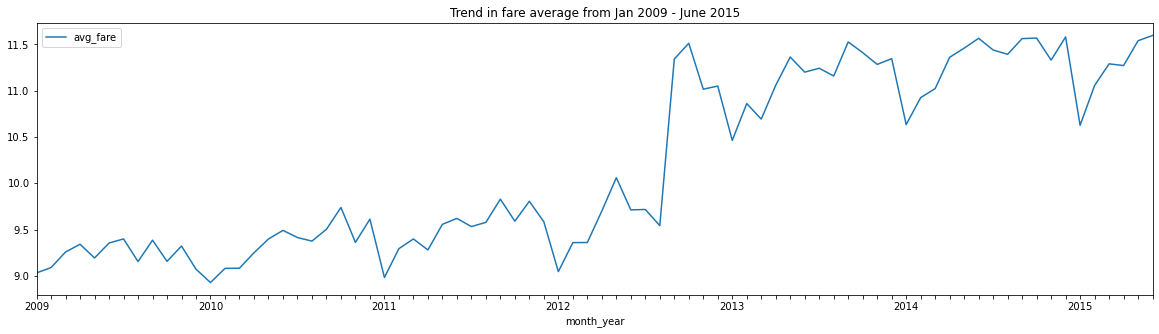

In [ ]:
group_my= dfd_clean.groupby('month_year',as_index=False)
trend_faremy = group_my['fare_amount'].mean()
trend_faremy.columns = ['month_year','avg_fare']

# fig, ax =plt.subplots(figsize = (20,5))
ax = trend_faremy.plot(x='month_year',y='avg_fare',kind='line',figsize=(20,5))
ax.set_xticks(trend_faremy['month_year'])
ax.set_title('Trend in fare average from Jan 2009 - June 2015')

**INSIGHT FROM DESCRIPTIVE STATISTIC**


- Total orders from 2009 - 2015 is 183,859 that mostly for near distance (2 km)and happens in weekdays (Friday). Most of the orders occur in 14:00
- Average fare amount is 10,17 USD, with smallest fare is 0,01 USD (1 cent)
- Trend in total orders shows that there's a pattern where the lowest total orders happens in the beginning of year and in Q3
- Average of fare shows that there's a pattern where the lowest fare average happens in the beginning of year and there's a sudden rise in Q3 2012

In [ ]:
group_y= dfd_clean.groupby('pickup_year',as_index=False)
trend_growth= group_y['key_y'].count()
trend_growth.columns = ['year','total_orders']
trend_growth['growth_order_pct'] = trend_growth['total_orders'].pct_change().mul(100).round(2)
trend_growth

year  total_orders  growth_order_pct
0  2009         29091               NaN
1  2010         28486             -2.08
2  2011         29431              3.32
3  2012         29380             -0.17
4  2013         28074             -4.45
5  2014         26943             -4.03
6  2015         12454            -53.78

Text(0.5, 1.0, 'Trips Growth from Jan 2009 - June 2015')

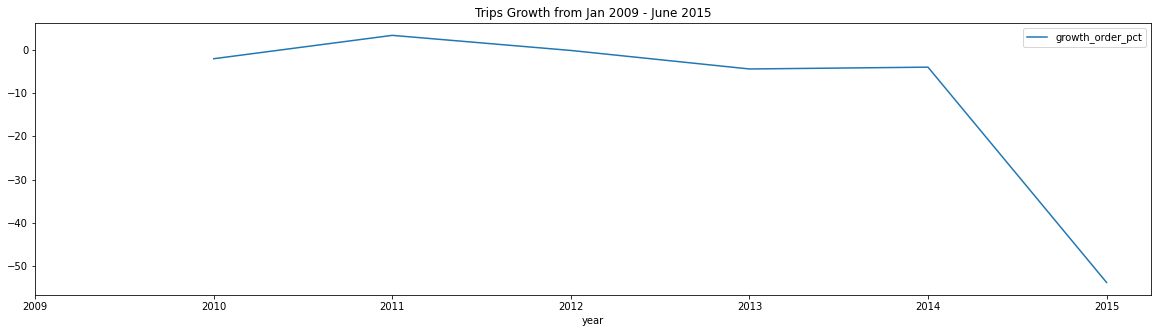

In [ ]:
ax = trend_growth.plot(x='year',y='growth_order_pct',kind='line',figsize=(20,5))
ax.set_xticks(trend_growth['year'])
ax.set_title('Trips Growth from Jan 2009 - June 2015')

# for x, y in zip(trend_growth['month_year'], trend_growth['growth_order']):
#  plt.text(x = x,y = y-150, s = '{:.0f}'.format(y), color = 'black')

## Correlation

In [ ]:
dfd_corr = dfd_clean.copy()

In [ ]:
dfd_corr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183859 entries, 0 to 183858
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   key_y              183859 non-null  object        
 1   fare_amount        183859 non-null  float64       
 2   pickup_datetime    183859 non-null  datetime64[ns]
 3   pickup_date        183859 non-null  object        
 4   pickup_day         183859 non-null  object        
 5   day_category       183859 non-null  object        
 6   pickup_longitude   183859 non-null  float64       
 7   pickup_latitude    183859 non-null  float64       
 8   dropoff_longitude  183859 non-null  float64       
 9   dropoff_latitude   183859 non-null  float64       
 10  passenger_count    183859 non-null  int64         
 11  distance_km        183859 non-null  float64       
 12  distance_lvl       183859 non-null  object        
 13  pickup_day_num     183859 non-null  int64   

In [ ]:
num_corr = dfd_corr.select_dtypes(include='number')
list_num_corr = num_corr.columns.tolist()
list_num_corr

['fare_amount',
 'pickup_longitude',
 'pickup_latitude',
 'dropoff_longitude',
 'dropoff_latitude',
 'passenger_count',
 'distance_km',
 'pickup_day_num',
 'pickup_year',
 'pickup_month',
 'pickup_hour',
 'distance_miles']

Text(0.5, 1.0, 'Correlation Between Fare Amount and Other Variables')

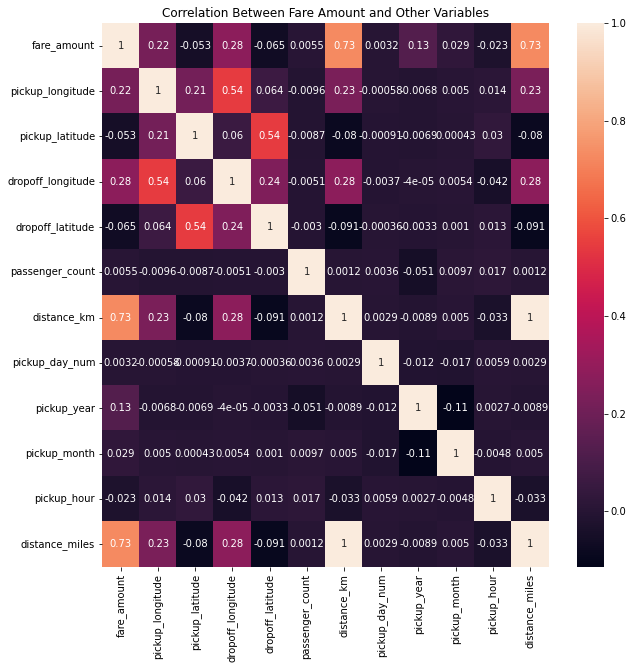

In [ ]:
fig, ax = plt.subplots(figsize=(10,10))
ax = sns.heatmap(num_corr.corr(), annot=True)
ax.set_title('Correlation Between Fare Amount and Other Variables')

## Analysis based on distance

### 2009

In [ ]:
dfd_clean_2009 = dfd_clean[dfd_clean['pickup_year']==2009]

In [ ]:
x = dfd_clean_2009[['distance_km']].to_numpy()
y = dfd_clean_2009[['fare_amount']]
x

array([[ 2.45762846],
       [ 5.03645624],
       [ 1.66170954],
       ...,
       [ 3.57758732],
       [ 0.51476182],
       [12.85052082]])

In [ ]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [ ]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.5098838784043902


In [ ]:
print('intercept:', model.intercept_)

intercept: [5.57788609]


In [ ]:
print('slope:', model.coef_)

slope: [[1.23381701]]


In [ ]:
dfd_clean.to_csv('cleaned_uber')

### 2010

In [ ]:
dfd_clean_2010 = dfd_clean[dfd_clean['pickup_year']==2010]

In [ ]:
x = dfd_clean_2010[['distance_km']].to_numpy()
y = dfd_clean_2010[['fare_amount']]
x

array([[1.30997046],
       [1.75179008],
       [6.19333316],
       ...,
       [2.7051916 ],
       [3.45004514],
       [5.41786852]])

In [ ]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [ ]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.5232621832578652


In [ ]:
print('intercept:', model.intercept_)

intercept: [5.19438597]


In [ ]:
print('slope:', model.coef_)

slope: [[1.38244762]]


### 2011

In [ ]:
dfd_clean_2011 = dfd_clean[dfd_clean['pickup_year']==2011]

In [ ]:
x = dfd_clean_2011[['distance_km']].to_numpy()
y = dfd_clean_2011[['fare_amount']]
x

array([[0.30225644],
       [3.58130704],
       [0.72997701],
       ...,
       [2.33861989],
       [2.22848213],
       [0.17783849]])

In [ ]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [ ]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.3151339255218042


In [ ]:
print('intercept:', model.intercept_)

intercept: [7.12546154]


In [ ]:
print('slope:', model.coef_)

slope: [[0.7695188]]


### 2012

In [ ]:
dfd_clean_2012 = dfd_clean[dfd_clean['pickup_year']==2012]

In [ ]:
x = dfd_clean_2012[['distance_km']].to_numpy()
y = dfd_clean_2012[['fare_amount']]
x

array([[2.33274762],
       [4.88949363],
       [1.71630436],
       ...,
       [2.63404374],
       [2.64093463],
       [0.11221201]])

In [ ]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [ ]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.7565310452986298


In [ ]:
print('intercept:', model.intercept_)

intercept: [3.86983717]


In [ ]:
print('slope:', model.coef_)

slope: [[2.05190287]]


### 2013

In [ ]:
dfd_clean_2013 = dfd_clean[dfd_clean['pickup_year']==2013]

In [ ]:
x = dfd_clean_2013[['distance_km']].to_numpy()
y = dfd_clean_2013[['fare_amount']]
x

array([[1.90496261],
       [3.18216338],
       [4.50442499],
       ...,
       [2.50696296],
       [4.96748432],
       [2.71727171]])

In [ ]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [ ]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.7900085311777582


In [ ]:
print('intercept:', model.intercept_)

intercept: [3.97951177]


In [ ]:
print('slope:', model.coef_)

slope: [[2.41301008]]


### 2014

In [ ]:
dfd_clean_2014 = dfd_clean[dfd_clean['pickup_year']==2014]

In [ ]:
x = dfd_clean_2014[['distance_km']].to_numpy()
y = dfd_clean_2014[['fare_amount']]
x

array([[ 4.47552021],
       [11.73119901],
       [ 2.49028285],
       ...,
       [ 3.35620596],
       [ 1.12289552],
       [ 1.8750796 ]])

In [ ]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [ ]:
r_sq = model.score(x, y)
print('coefficient of determination:', r_sq)

coefficient of determination: 0.7885409015546311


In [ ]:
print('intercept:', model.intercept_)

intercept: [4.13178047]


In [ ]:
print('slope:', model.coef_)

slope: [[2.43912154]]


### Trend fare amount by distance level

Text(0.5, 1.0, 'Trend in fare average per distance level')

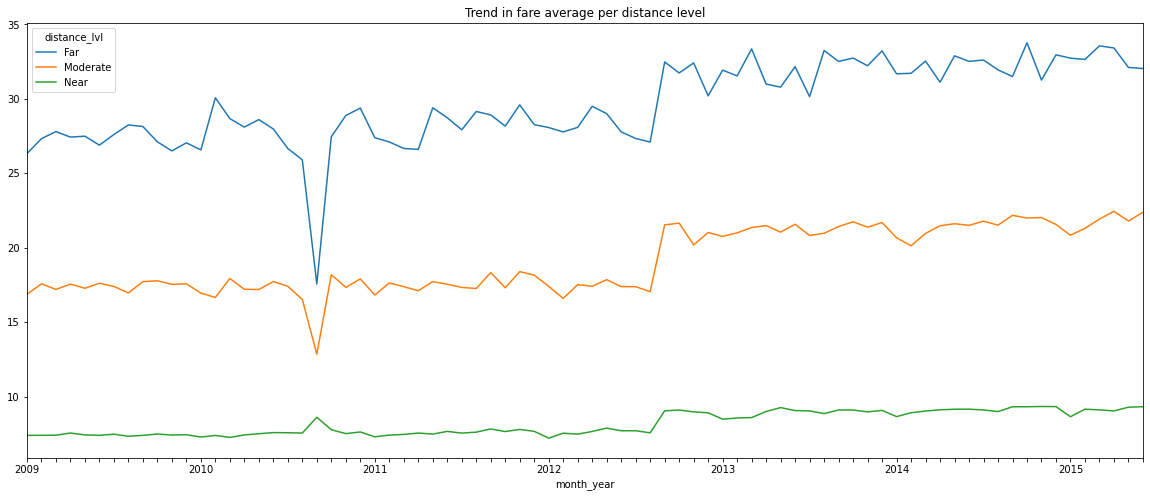

In [ ]:
dfd_comp_avg = dfd_clean.groupby(['month_year','distance_lvl']).agg(avg_fare=('fare_amount','mean')).reset_index()
ax = dfd_comp_avg.pivot(index='month_year',columns='distance_lvl',values='avg_fare').plot(kind='line',figsize=(20,8))
ax.set_xticks(trend_faremy['month_year'])
ax.set_title('Trend in fare average per distance level')

Near

In [ ]:
dfd_near = dfd_clean[dfd_clean['distance_lvl']=='Near']

Text(0.5, 1.0, 'Trend in fare average in near distance level')

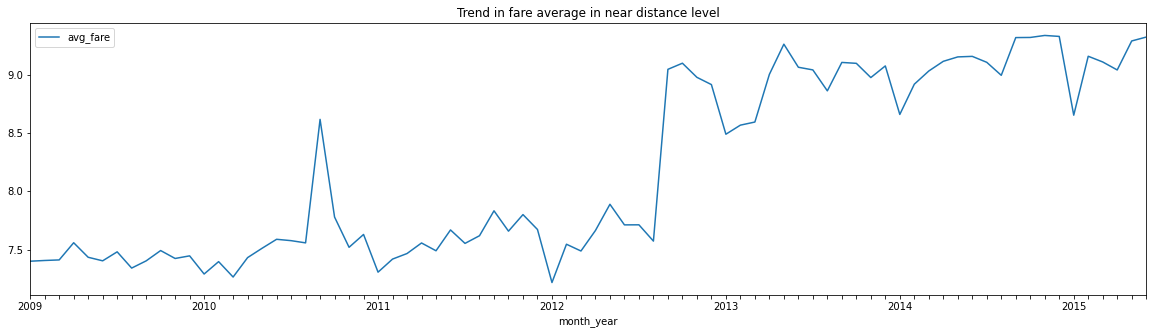

In [ ]:
group_my= dfd_near.groupby('month_year',as_index=False)
trend_faremy = group_my['fare_amount'].mean()
trend_faremy.columns = ['month_year','avg_fare']

# fig, ax =plt.subplots(figsize = (20,5))
ax = trend_faremy.plot(x='month_year',y='avg_fare',kind='line',figsize=(20,5))
ax.set_xticks(trend_faremy['month_year'])
ax.set_title('Trend in fare average in near distance level')

Moderate

In [ ]:
dfd_mod = dfd_clean[dfd_clean['distance_lvl']=='Moderate']

Text(0.5, 1.0, 'Trend in fare average in moderate distance level')

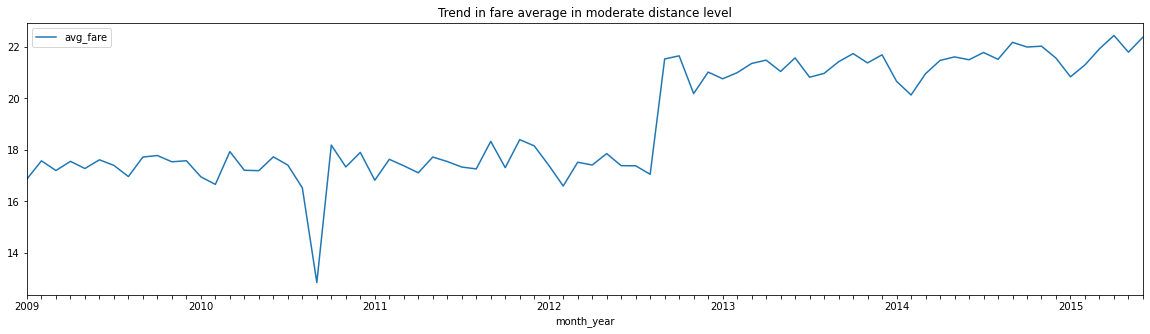

In [ ]:
group_my= dfd_mod.groupby('month_year',as_index=False)
trend_faremy = group_my['fare_amount'].mean()
trend_faremy.columns = ['month_year','avg_fare']

# fig, ax =plt.subplots(figsize = (20,5))
ax = trend_faremy.plot(x='month_year',y='avg_fare',kind='line',figsize=(20,5))
ax.set_xticks(trend_faremy['month_year'])
ax.set_title('Trend in fare average in moderate distance level')

Far

In [ ]:
dfd_far = dfd_clean[dfd_clean['distance_lvl']=='Far']

Text(0.5, 1.0, 'Trend in fare average in far distance level')

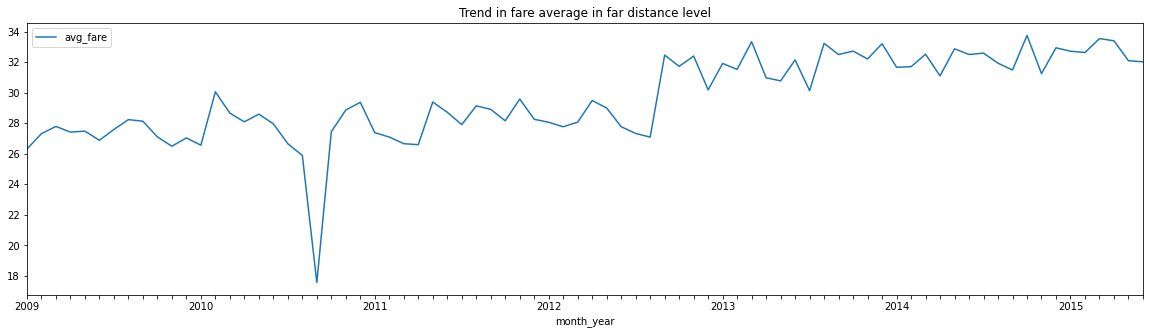

In [ ]:
group_my= dfd_far.groupby('month_year',as_index=False)
trend_faremy = group_my['fare_amount'].mean()
trend_faremy.columns = ['month_year','avg_fare']

# fig, ax =plt.subplots(figsize = (20,5))
ax = trend_faremy.plot(x='month_year',y='avg_fare',kind='line',figsize=(20,5))
ax.set_xticks(trend_faremy['month_year'])
ax.set_title('Trend in fare average in far distance level')

### Trend total order by distance level

Text(0.5, 1.0, 'Trend in total order per distance level')

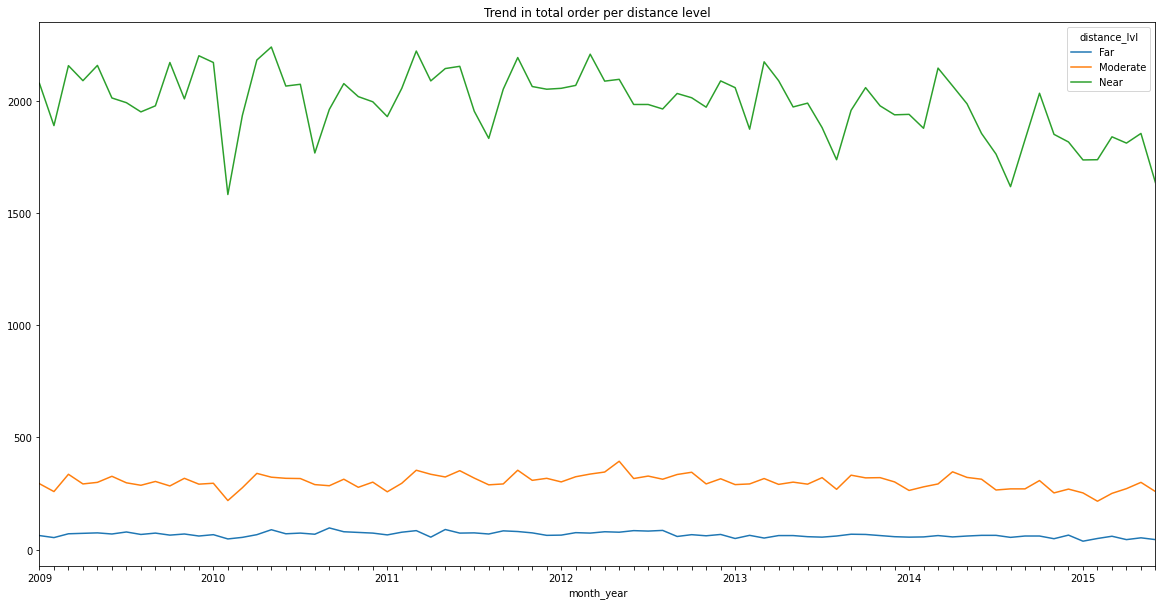

In [ ]:
dfd_comp = dfd_clean.groupby(['month_year','distance_lvl']).agg(total_orders=('key_y','count')).reset_index()
ax = dfd_comp.pivot(index='month_year',columns='distance_lvl',values='total_orders').plot(kind='line',figsize=(20,10))
ax.set_xticks(trend_faremy['month_year'])
ax.set_title('Trend in total order per distance level')

Near

Text(0.5, 1.0, 'Trend in total order in nea distance level')

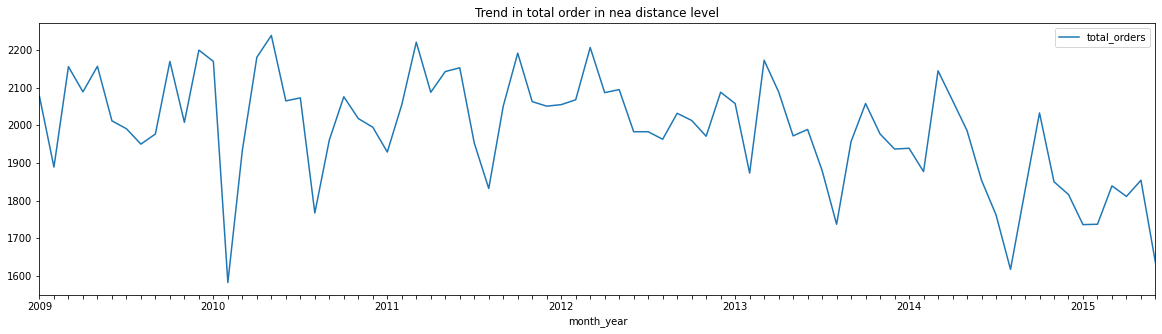

In [ ]:
group_my= dfd_near.groupby('month_year',as_index=False)
trend_my = group_my['key_y'].count()
trend_my.columns = ['month_year','total_orders']

# fig, ax =plt.subplots(figsize = (20,5))
ax = trend_my.plot(x='month_year',y='total_orders',kind='line',figsize=(20,5))
ax.set_xticks(trend_my['month_year'])
ax.set_title('Trend in total order in nea distance level')

Moderate

Text(0.5, 1.0, 'Trend in trips in moderate distance level')

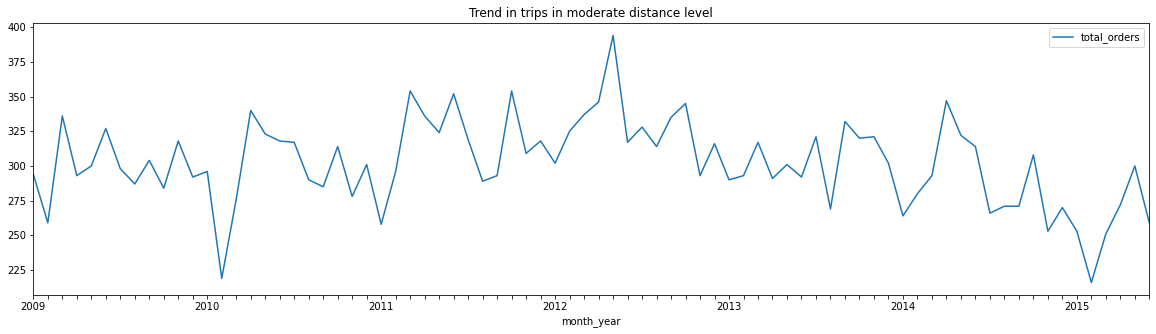

In [ ]:
group_my= dfd_mod.groupby('month_year',as_index=False)
trend_my = group_my['key_y'].count()
trend_my.columns = ['month_year','total_orders']

# fig, ax =plt.subplots(figsize = (20,5))
ax = trend_my.plot(x='month_year',y='total_orders',kind='line',figsize=(20,5))
ax.set_xticks(trend_my['month_year'])
ax.set_title('Trend in trips in moderate distance level')

Far

Text(0.5, 1.0, 'Trend in trips in far distance level')

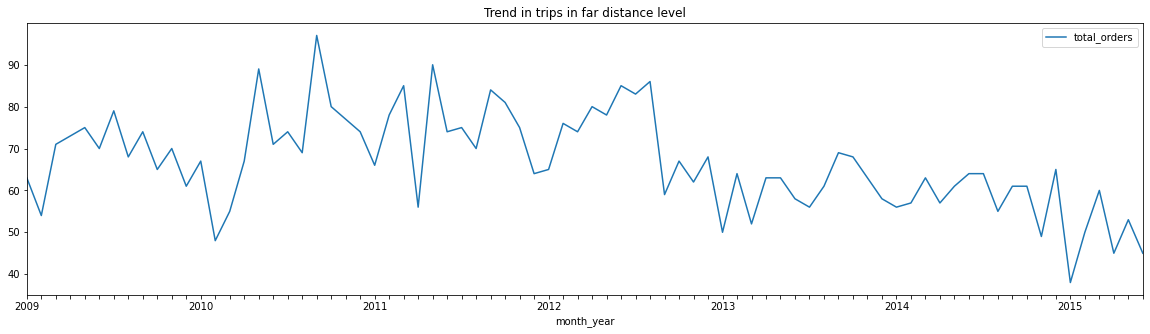

In [ ]:
group_my= dfd_far.groupby('month_year',as_index=False)
trend_my = group_my['key_y'].count()
trend_my.columns = ['month_year','total_orders']

# fig, ax =plt.subplots(figsize = (20,5))
ax = trend_my.plot(x='month_year',y='total_orders',kind='line',figsize=(20,5))
ax.set_xticks(trend_my['month_year'])
ax.set_title('Trend in trips in far distance level')

In [ ]:
trend_my.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype    
---  ------        --------------  -----    
 0   month_year    78 non-null     period[M]
 1   total_orders  78 non-null     int64    
dtypes: int64(1), period[M](1)
memory usage: 1.3 KB


### Day Trend total order by distance level

Text(0.5, 1.0, 'Total order per day by distance level')

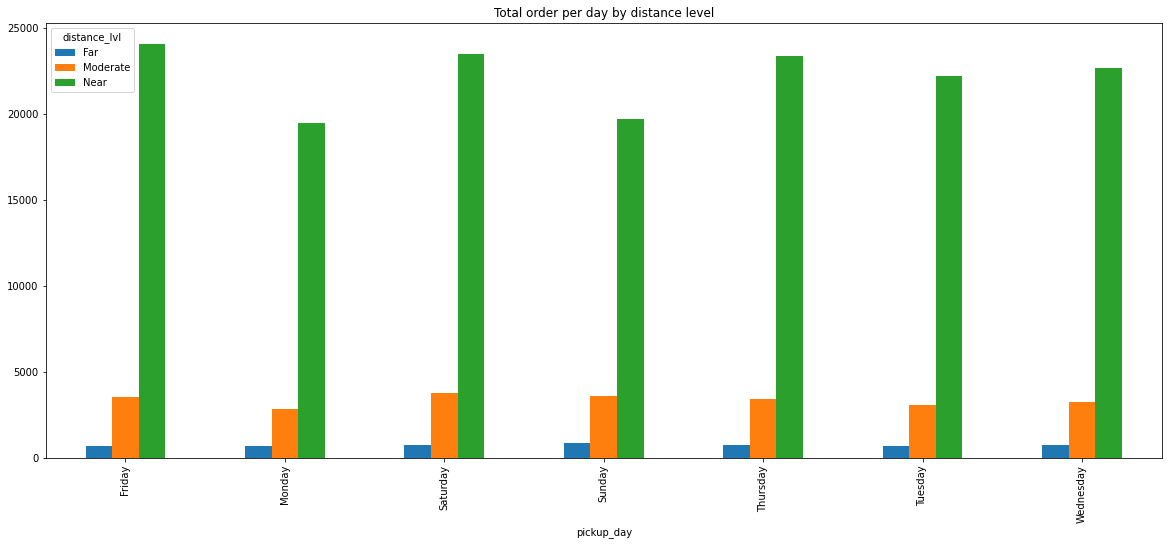

In [ ]:
dfd_comp_day = dfd_clean.groupby(['pickup_day','distance_lvl']).agg(total_orders=('key_y','count')).reset_index()
ax = dfd_comp_day.pivot(index='pickup_day',columns='distance_lvl',values='total_orders').plot(kind='bar',figsize=(20,8))

ax.set_title('Total order per day by distance level')

In [ ]:
dfdnv = dfd_near.groupby('pickup_day').agg(total_orders=('key_y','count')).reset_index()
dfdmv = dfd_mod.groupby('pickup_day').agg(total_orders=('key_y','count')).reset_index()
dfdfv = dfd_far.groupby('pickup_day').agg(total_orders=('key_y','count')).reset_index()

Text(0.5, 1.0, 'Total orders per day in near distance level')

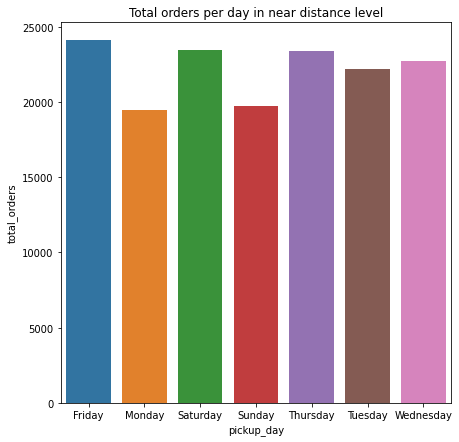

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
vis1 = sns.barplot(x='pickup_day',y='total_orders',data=dfdnv)
ax.set_title('Total orders per day in near distance level')

Text(0.5, 1.0, 'Total orders per day in moderate distance level')

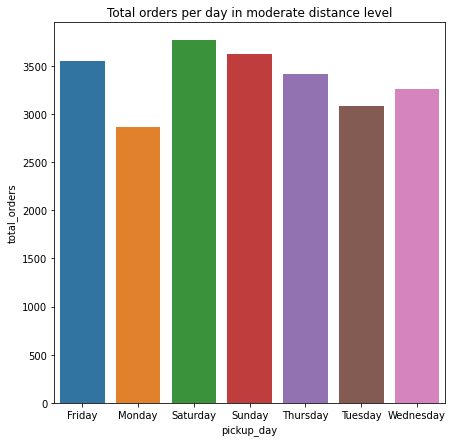

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
vis2 = sns.barplot(x='pickup_day',y='total_orders',data=dfdmv)
ax.set_title('Total orders per day in moderate distance level')

Text(0.5, 1.0, 'Total orders per day in far distance level')

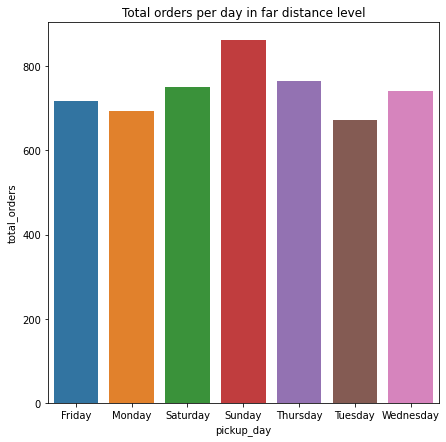

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
vis3 = sns.barplot(x='pickup_day',y='total_orders',data=dfdfv)
ax.set_title('Total orders per day in far distance level')

### Passanger counts by distance level

In [ ]:
dfdnp =  dfd_near.groupby('passenger_count').agg(total_orders = ('key_y','count')).reset_index()
dfdmp =  dfd_mod.groupby('passenger_count').agg(total_orders = ('key_y','count')).reset_index()
dfdfp =  dfd_far.groupby('passenger_count').agg(total_orders = ('key_y','count')).reset_index()

In [ ]:

dfdnp['passenger_count'].replace([1],'alone',inplace=True)
dfdnp['passenger_count'].replace([2,3,4,5,6],'together',inplace=True)
dfdmp['passenger_count'].replace([1],'alone',inplace=True)
dfdmp['passenger_count'].replace([2,3,4,5,6],'together',inplace=True)
dfdfp['passenger_count'].replace([1],'alone',inplace=True)
dfdfp['passenger_count'].replace([2,3,4,5,6],'together',inplace=True)

Text(0.5, 1.0, 'Total orders per Passanger count in near distance level')

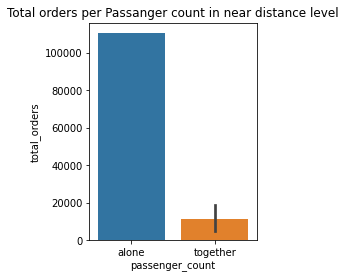

In [ ]:
fig, ax = plt.subplots(figsize=(3,4))
vis4 = sns.barplot(x='passenger_count',y='total_orders',data=dfdnp)
ax.set_title('Total orders per Passanger count in near distance level')

Text(0.5, 1.0, 'Total orders per Passanger count in moderate distance level')

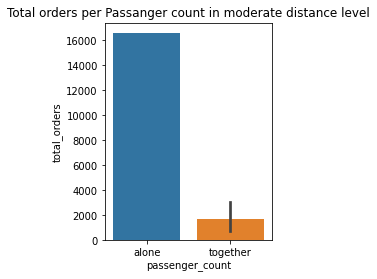

In [ ]:
fig, ax = plt.subplots(figsize=(3,4))
vis5 = sns.barplot(x='passenger_count',y='total_orders',data=dfdmp)
ax.set_title('Total orders per Passanger count in moderate distance level')

Text(0.5, 1.0, 'Total orders per Passanger count in far distance level')

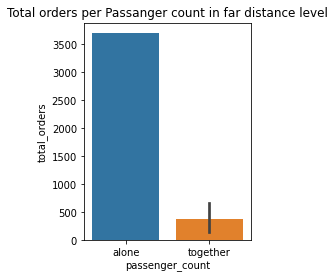

In [ ]:
fig, ax = plt.subplots(figsize=(3,4))
vis6 = sns.barplot(x='passenger_count',y='total_orders',data=dfdfp)
ax.set_title('Total orders per Passanger count in far distance level')

### Day category by distance level

In [ ]:
dfdnd =  dfd_near.groupby('day_category').agg(total_orders = ('key_y','count')).reset_index()
dfdmd =  dfd_mod.groupby('day_category').agg(total_orders = ('key_y','count')).reset_index()
dfdfd =  dfd_far.groupby('day_category').agg(total_orders = ('key_y','count')).reset_index()

Text(0.5, 1.0, 'Total orders per day category in near distance level')

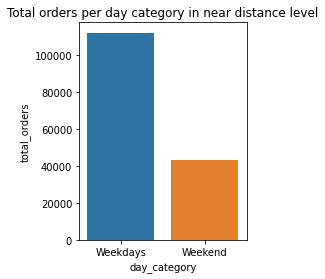

In [ ]:
fig, ax = plt.subplots(figsize=(3,4))
vis7 = sns.barplot(x='day_category',y='total_orders',data=dfdnd)
ax.set_title('Total orders per day category in near distance level')

Text(0.5, 1.0, 'Total orders per day category in near distance level')

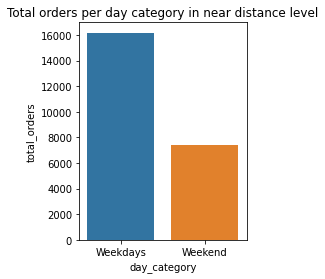

In [ ]:
fig, ax = plt.subplots(figsize=(3,4))
vis8 = sns.barplot(x='day_category',y='total_orders',data=dfdmd)
ax.set_title('Total orders per day category in near distance level')

Text(0.5, 1.0, 'Total orders per day category in near distance level')

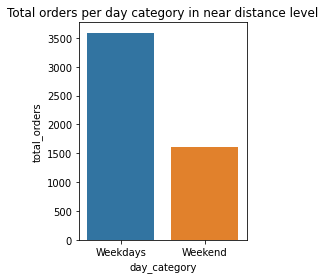

In [ ]:
fig, ax = plt.subplots(figsize=(3,4))
vis9 = sns.barplot(x='day_category',y='total_orders',data=dfdfd)
ax.set_title('Total orders per day category in near distance level')

### Order per Hour by distance level

Text(0.5, 1.0, 'Total orders per hour in near distance level')

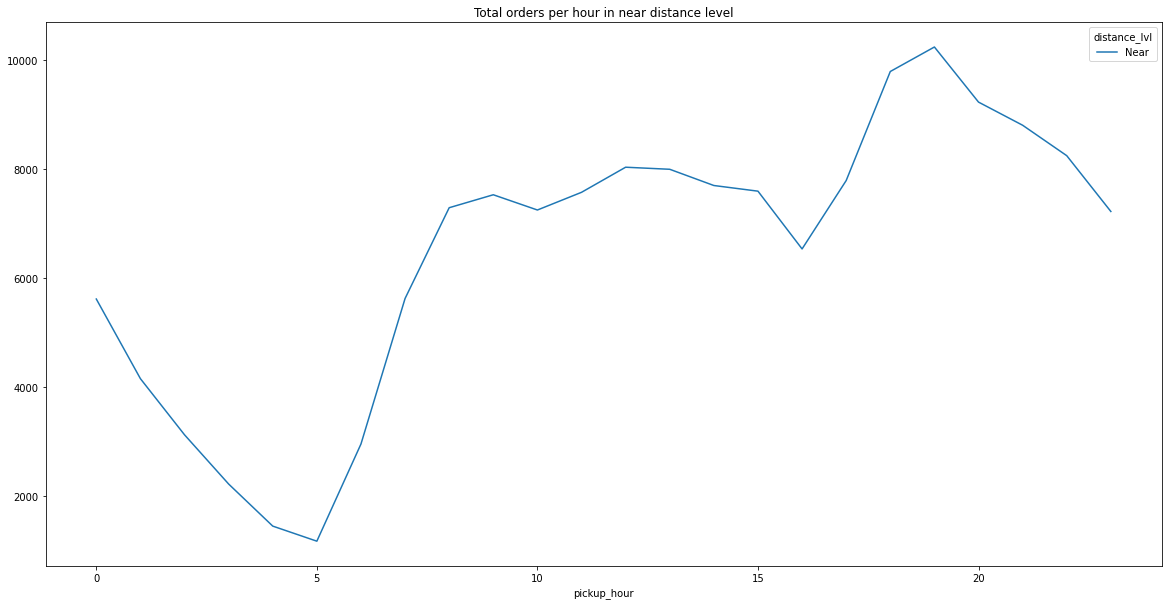

In [ ]:
dfd_comp_hour = dfd_clean.groupby(['pickup_hour','distance_lvl']).agg(total_orders=('key_y','count')).reset_index()
dfd_comp_hour = dfd_comp_hour[dfd_comp_hour['distance_lvl']=='Near']
hour = dfd_comp_hour.pivot(index='pickup_hour',columns='distance_lvl',values='total_orders')
ax = dfd_comp_hour.pivot(index='pickup_hour',columns='distance_lvl',values='total_orders').plot(kind='line',figsize=(20,10))
ax.set_title('Total orders per hour in near distance level')

Text(0.5, 1.0, 'Total orders per hour in moderate distance level')

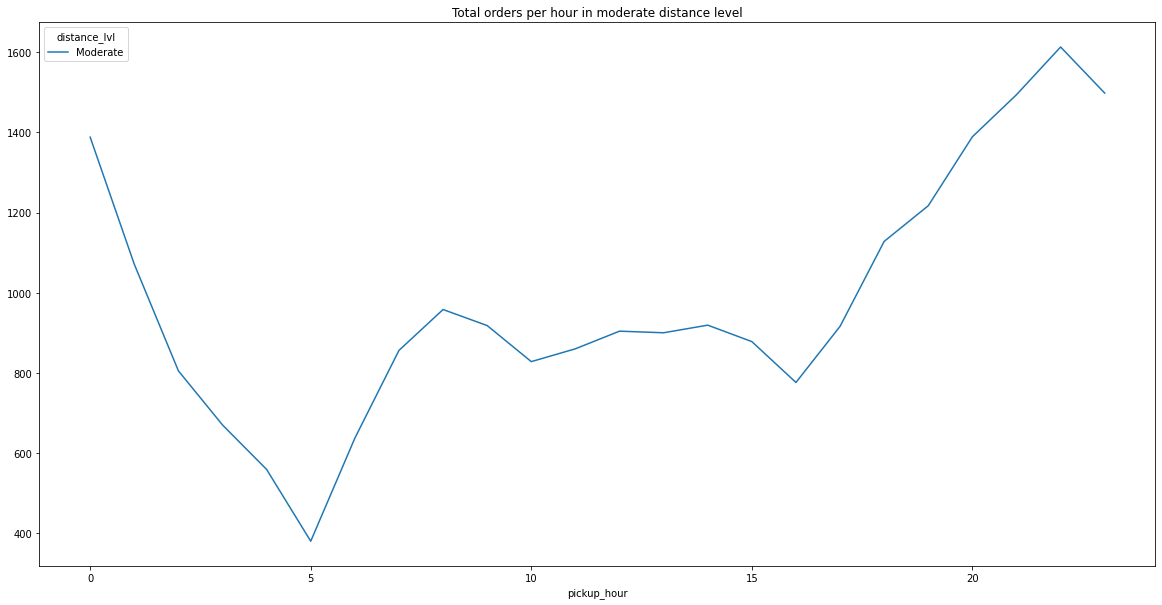

In [ ]:
dfd_comp_hour = dfd_clean.groupby(['pickup_hour','distance_lvl']).agg(total_orders=('key_y','count')).reset_index()
dfd_comp_hour = dfd_comp_hour[dfd_comp_hour['distance_lvl']=='Moderate']
hour = dfd_comp_hour.pivot(index='pickup_hour',columns='distance_lvl',values='total_orders')
ax = dfd_comp_hour.pivot(index='pickup_hour',columns='distance_lvl',values='total_orders').plot(kind='line',figsize=(20,10))
ax.set_title('Total orders per hour in moderate distance level')

Text(0.5, 1.0, 'Total orders per hour in far distance level')

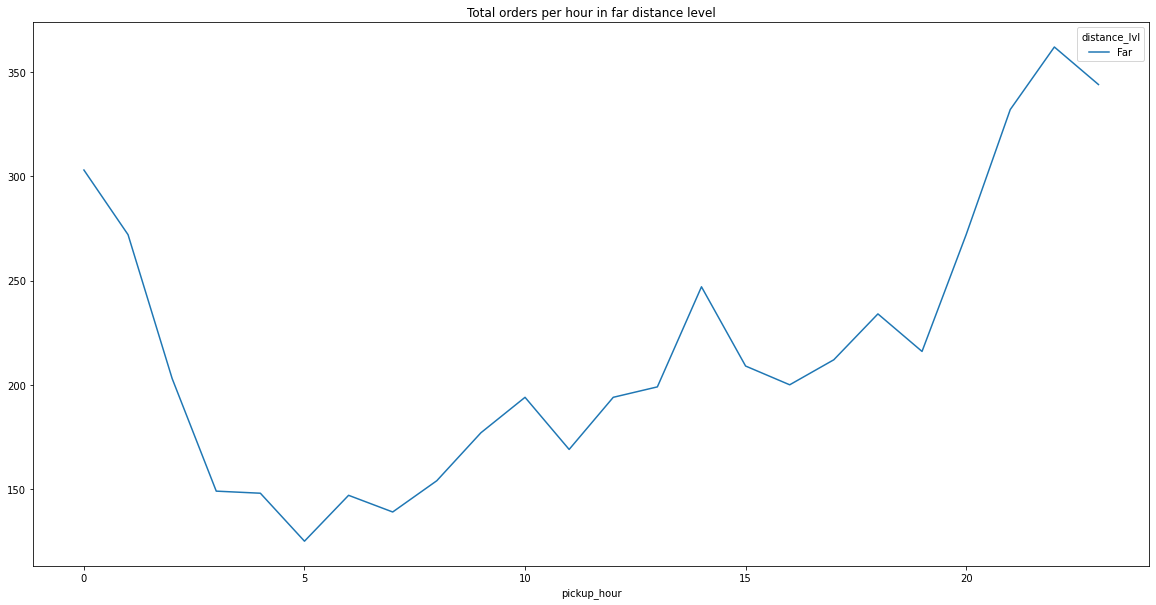

In [ ]:
dfd_comp_hour = dfd_clean.groupby(['pickup_hour','distance_lvl']).agg(total_orders=('key_y','count')).reset_index()
dfd_comp_hour = dfd_comp_hour[dfd_comp_hour['distance_lvl']=='Far']
hour = dfd_comp_hour.pivot(index='pickup_hour',columns='distance_lvl',values='total_orders')
ax = dfd_comp_hour.pivot(index='pickup_hour',columns='distance_lvl',values='total_orders').plot(kind='line',figsize=(20,10))
ax.set_title('Total orders per hour in far distance level')

### Revenue VS Order by Distance Level

In [ ]:
rev = dfd_clean.groupby(['month_year','distance_lvl']).agg(rev_month=('fare_amount','sum'),
                                                           total_order=('key_y','count')).reset_index()
ax = rev.pivot(index='month_year',columns='distance_lvl',values='rev_month').reset_index()#.plot(kind='line',figsize=(20,10))
ay = rev.pivot(index='month_year',columns='distance_lvl',values='total_order').reset_index()
all = ax.merge(ay,on='month_year')
all


distance_lvl month_year    Far_x  Moderate_x    Near_x  Far_y  Moderate_y  \
0               2009-01  1658.00     4960.10  15369.05     63         294   
1               2009-02  1475.45     4552.10  13989.85     54         259   
2               2009-03  1973.60     5779.25  15977.60     71         336   
3               2009-04  2002.20     5143.90  15789.50     73         293   
4               2009-05  2061.75     5183.40  16034.05     75         300   
..                  ...      ...         ...       ...    ...         ...   
73              2015-02  1632.12     4601.09  15912.99     50         216   
74              2015-03  2013.36     5503.17  16757.10     60         251   
75              2015-04  1503.44     6104.74  16377.62     45         272   
76              2015-05  1701.52     6538.23  17228.47     53         300   
77              2015-06  1441.48     5796.36  15248.08     45         259   

distance_lvl  Near_y  
0               2077  
1               1889  
2               2156  
3               2089  
4               2157  
..               ...  
73              1737  
74              1839  
75              1811  
76              1854  
77              1635  

[78 rows x 7 columns]

In [ ]:
rev2 = dfd_clean.groupby('month_year').agg(rev_month=('fare_amount','sum'),
                                                           total_order=('key_y','count')).reset_index()

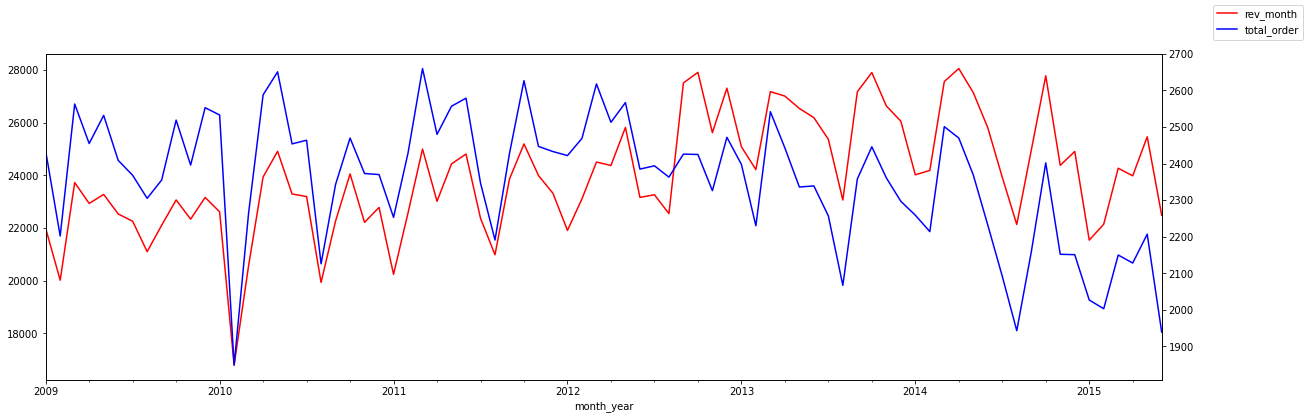

In [ ]:
%matplotlib inline
x = rev2['month_year']
y1 = rev2['rev_month']
y2 = rev2['total_order']

ax = rev2.plot('month_year','rev_month',legend=False,color='r',figsize=(20,6))
ax2 = ax.twinx()
rev2.plot('month_year','total_order',legend=False,ax=ax2,color='b')
ax.figure.legend()
plt.show()

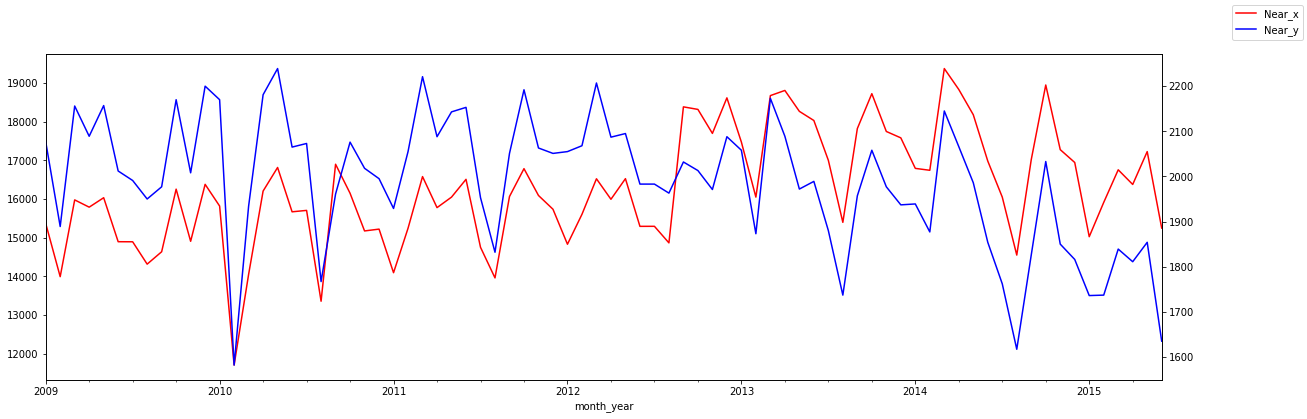

In [ ]:
%matplotlib inline
x = all['month_year']
y1 = all['Near_x']
y2 = all['Near_y']

ax = all.plot('month_year','Near_x',legend=False,color='r',figsize=(20,6))
ax2 = ax.twinx()
all.plot('month_year','Near_y',ax=ax2,legend=False,color='b')
ax.figure.legend()
plt.show()

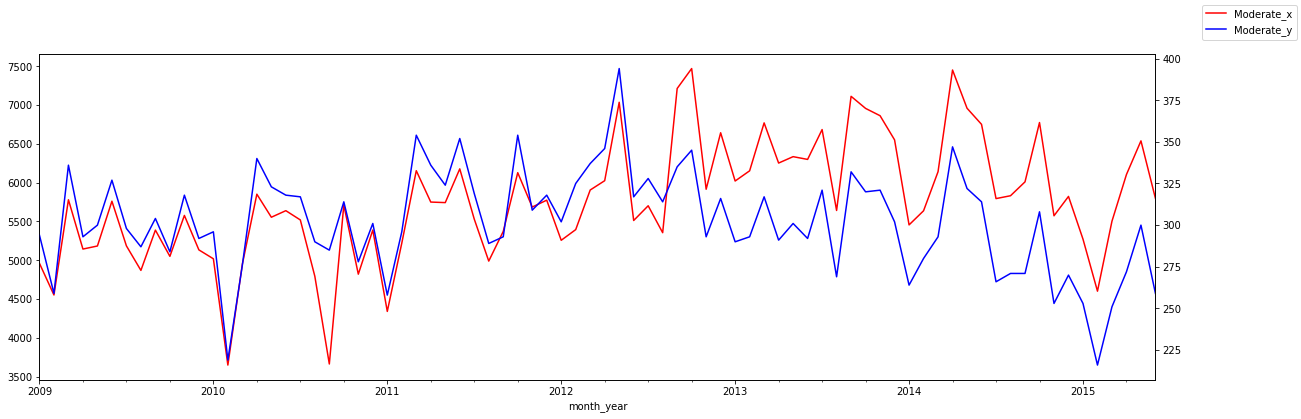

In [ ]:
%matplotlib inline
x = all['month_year']
y1 = all['Moderate_x']
y2 = all['Moderate_y']

ax = all.plot('month_year','Moderate_x',legend=False,color='r',figsize=(20,6))
ax2 = ax.twinx()
all.plot('month_year','Moderate_y',ax=ax2,legend=False,color='b')
ax.figure.legend()
plt.show()

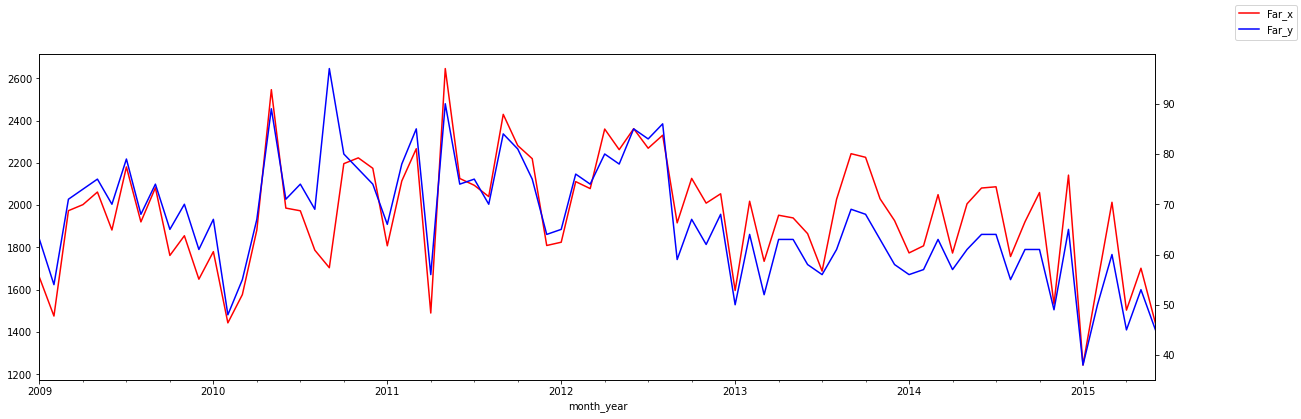

In [ ]:
%matplotlib inline
x = all['month_year']
y1 = all['Far_x']
y2 = all['Far_y']

ax = all.plot('month_year','Far_x',legend=False,color='r',figsize=(20,6))
ax2 = ax.twinx()
all.plot('month_year','Far_y',ax=ax2,legend=False,color='b')
ax.figure.legend()
plt.show()

## Analysis based on the time

In [ ]:
dfd_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183859 entries, 0 to 183858
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   key_y              183859 non-null  object        
 1   fare_amount        183859 non-null  float64       
 2   pickup_datetime    183859 non-null  datetime64[ns]
 3   pickup_date        183859 non-null  object        
 4   pickup_day         183859 non-null  object        
 5   day_category       183859 non-null  object        
 6   pickup_longitude   183859 non-null  float64       
 7   pickup_latitude    183859 non-null  float64       
 8   dropoff_longitude  183859 non-null  float64       
 9   dropoff_latitude   183859 non-null  float64       
 10  passenger_count    183859 non-null  int64         
 11  distance_km        183859 non-null  float64       
 12  distance_lvl       183859 non-null  object        
 13  pickup_day_num     183859 non-null  int64   

In [ ]:
dfd_time = dfd_clean.copy()

In [ ]:
#We'll part the day with the conditions : 5 - 11 = morning, 12 - 17 = afternoon, 18 - 21 = evening, 22 - 4 = night
conditions = [
    (dfd_time['pickup_hour'] >= 5) & (dfd_time['pickup_hour'] <= 11),
    (dfd_time['pickup_hour'] >= 12) & (dfd_time['pickup_hour'] <= 17),
    (dfd_time['pickup_hour'] >= 18) & (dfd_time['pickup_hour'] <= 21),
    (dfd_time['pickup_hour'] <= 4) | (dfd_time['pickup_hour'] >= 22)
]
    
values = ['morning','afternoon','evening','night']

dfd_time['day_part'] = np.select(conditions, values)
dfd_time

key_y  fare_amount     pickup_datetime  \
0         2015-05-07 19:52:06.0000003          7.5 2015-05-07 19:52:06   
1         2009-07-17 20:04:56.0000002          7.7 2009-07-17 20:04:56   
2        2009-08-24 21:45:00.00000061         12.9 2009-08-24 21:45:00   
3         2009-06-26 08:22:21.0000001          5.3 2009-06-26 08:22:21   
4       2014-08-28 17:47:00.000000188         16.0 2014-08-28 17:47:00   
...                               ...          ...                 ...   
183854   2012-10-28 10:49:00.00000053          3.0 2012-10-28 10:49:00   
183855    2014-03-14 01:09:00.0000008          7.5 2014-03-14 01:09:00   
183856   2009-06-29 00:42:00.00000078         30.9 2009-06-29 00:42:00   
183857    2015-05-20 14:56:25.0000004         14.5 2015-05-20 14:56:25   
183858   2010-05-15 04:08:00.00000076         14.1 2010-05-15 04:08:00   

       pickup_date pickup_day day_category  pickup_longitude  pickup_latitude  \
0       2015-05-07   Thursday     Weekdays        -73.999817        40.738354   
1       2009-07-17     Friday     Weekdays        -73.994355        40.728225   
2       2009-08-24     Monday     Weekdays        -74.005043        40.740770   
3       2009-06-26     Friday     Weekdays        -73.976124        40.790844   
4       2014-08-28   Thursday     Weekdays        -73.925023        40.744085   
...            ...        ...          ...               ...              ...   
183854  2012-10-28     Sunday      Weekend        -73.987042        40.739367   
183855  2014-03-14     Friday     Weekdays        -73.984722        40.736837   
183856  2009-06-29     Monday     Weekdays        -73.986017        40.756487   
183857  2015-05-20  Wednesday     Weekdays        -73.997124        40.725452   
183858  2010-05-15   Saturday      Weekend        -73.984395        40.720077   

        dropoff_longitude  dropoff_latitude  passenger_count  distance_km  \
0              -73.999512         40.723217                1     1.683349   
1              -73.994710         40.750325                1     2.457628   
2              -73.962565         40.772647                1     5.036456   
3              -73.965316         40.803349                3     1.661710   
4              -73.973082         40.761247                5     4.475520   
...                   ...               ...              ...          ...   
183854         -73.986525         40.740297                1     0.112212   
183855         -74.006672         40.739620                1     1.875080   
183856         -73.858957         40.692588                2    12.850521   
183857         -73.983215         40.695416                1     3.539771   
183858         -73.985508         40.768793                1     5.417869   

       distance_lvl  pickup_day_num  pickup_year  pickup_month  pickup_hour  \
0              Near               7         2015             5           19   
1              Near              17         2009             7           20   
2          Moderate              24         2009             8           21   
3              Near              26         2009             6            8   
4              Near              28         2014             8           17   
...             ...             ...          ...           ...          ...   
183854         Near              28         2012            10           10   
183855         Near              14         2014             3            1   
183856          Far              29         2009             6            0   
183857         Near              20         2015             5           14   
183858     Moderate              15         2010             5            4   

        distance_miles month_year   day_part  
0             1.045984    2015-05    evening  
1             1.527099    2009-07    evening  
2             3.129508    2009-08    evening  
3             1.032538    2009-06    morning  
4             2.780958    2014-08  afternoon  
...           

### Bulky

In [ ]:
time_group = dfd_time.groupby(['pickup_hour','pickup_year'], as_index=False)

In [ ]:
time = time_group['key_y'].count()
time.columns = ['hour','year','total_orders']
time

hour  year  total_orders
0       0  2009          1166
1       0  2010          1120
2       0  2011          1182
3       0  2012          1152
4       0  2013          1139
..    ...   ...           ...
163    23  2011          1421
164    23  2012          1467
165    23  2013          1392
166    23  2014          1391
167    23  2015           635

[168 rows x 3 columns]

Text(0.5, 1.0, 'Trend in trips  by hour of day')

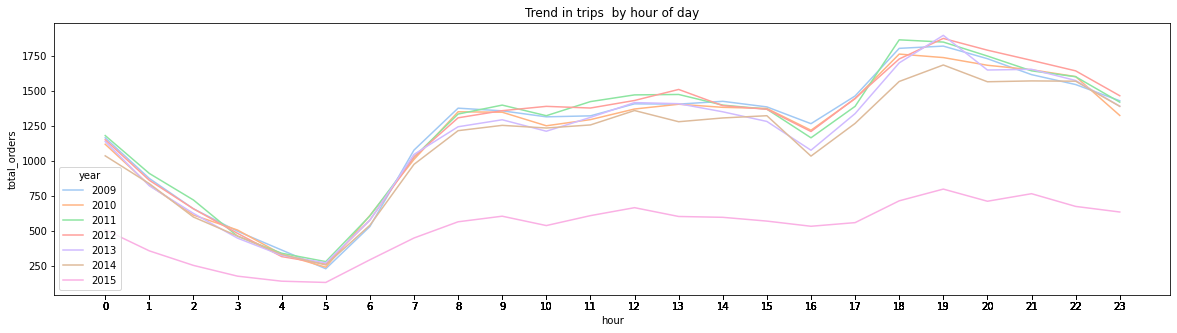

In [ ]:
fig, ax =plt.subplots(figsize = (20,5))
ax = sns.lineplot(x='hour',y='total_orders', hue = 'year' ,palette = 'pastel', data = time)
ax.set(xticks=time['hour'])
ax.set_title('Trend in trips  by hour of day')

In 2015, the data only consist of 6 month trips, so the total orders is lower than the other years, but it has the sampe pattern as the others

In [ ]:
day_part_group = dfd_time.groupby(['day_part','pickup_year'], as_index=False)

In [ ]:
day_part = day_part_group['key_y'].count()
day_part.columns = ['day_part','year','total_orders']
day_part

day_part  year  total_orders
0   afternoon  2009          8362
1   afternoon  2010          8204
2   afternoon  2011          8277
3   afternoon  2012          8370
4   afternoon  2013          7879
5   afternoon  2014          7578
6   afternoon  2015          3528
7     evening  2009          6978
8     evening  2010          6843
9     evening  2011          7114
10    evening  2012          7120
11    evening  2013          6908
12    evening  2014          6396
13    evening  2015          2992
14    morning  2009          7214
15    morning  2010          7110
16    morning  2011          7400
17    morning  2012          7308
18    morning  2013          6959
19    morning  2014          6738
20    morning  2015          3190
21      night  2009          6537
22      night  2010          6329
23      night  2011          6640
24      night  2012          6582
25      night  2013          6328
26      night  2014          6231
27      night  2015          2744

Text(0.5, 1.0, 'Trips by Day Part')

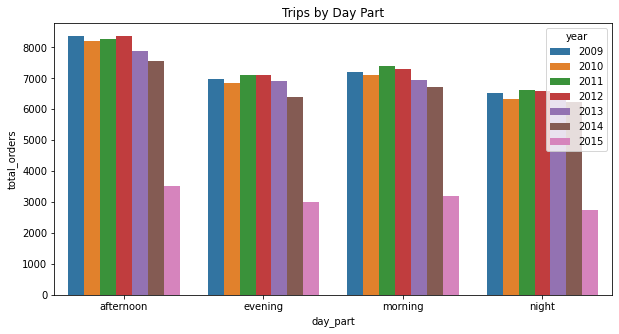

In [ ]:
fig, ax =plt.subplots(figsize = (10,5))
ax = sns.barplot(x='day_part',y='total_orders',hue = 'year', data = day_part)
ax.set_title('Trips by Day Part')

In [ ]:
time_fare = time_group['fare_amount'].mean()
time_fare.columns = ['hour','year','avg_fare']
time_fare

hour  year   avg_fare
0       0  2009   9.767959
1       0  2010  10.005196
2       0  2011  10.167936
3       0  2012  10.848082
4       0  2013  11.875689
..    ...   ...        ...
163    23  2011   9.804996
164    23  2012  10.333831
165    23  2013  11.564476
166    23  2014  12.032646
167    23  2015  12.224961

[168 rows x 3 columns]

Text(0.5, 1.0, 'Average Fare by hour of day')

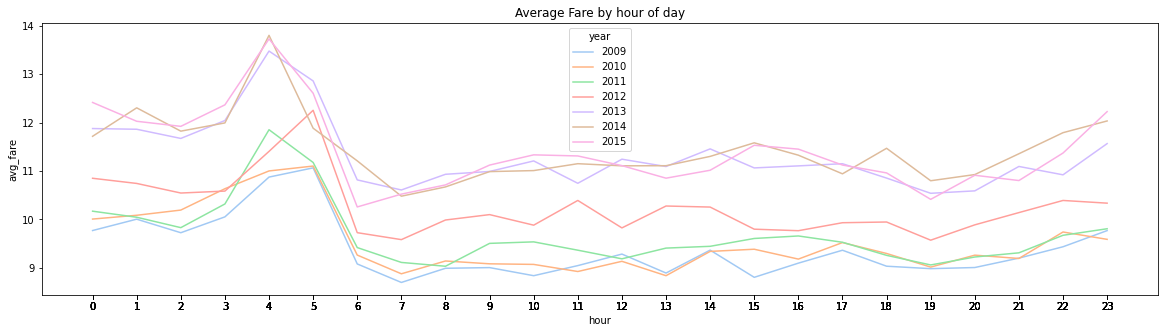

In [ ]:
fig, ax =plt.subplots(figsize = (20,5))
ax = sns.lineplot(x='hour',y='avg_fare', hue = 'year' ,palette = 'pastel', data = time_fare)
ax.set(xticks=time['hour'])
ax.set_title('Average Fare by hour of day')

### Hour by Day Category

to check the total orders trend by our of weekdays

In [ ]:
dfd_time_weekday = dfd_time[dfd_time['day_category']=='Weekdays']
dfd_time_weekday

key_y  fare_amount     pickup_datetime  \
0         2015-05-07 19:52:06.0000003          7.5 2015-05-07 19:52:06   
1         2009-07-17 20:04:56.0000002          7.7 2009-07-17 20:04:56   
2        2009-08-24 21:45:00.00000061         12.9 2009-08-24 21:45:00   
3         2009-06-26 08:22:21.0000001          5.3 2009-06-26 08:22:21   
4       2014-08-28 17:47:00.000000188         16.0 2014-08-28 17:47:00   
...                               ...          ...                 ...   
183850    2015-06-08 10:49:14.0000001         17.5 2015-06-08 10:49:14   
183853  2014-01-31 14:42:00.000000181         12.0 2014-01-31 14:42:00   
183855    2014-03-14 01:09:00.0000008          7.5 2014-03-14 01:09:00   
183856   2009-06-29 00:42:00.00000078         30.9 2009-06-29 00:42:00   
183857    2015-05-20 14:56:25.0000004         14.5 2015-05-20 14:56:25   

       pickup_date pickup_day day_category  pickup_longitude  pickup_latitude  \
0       2015-05-07   Thursday     Weekdays        -73.999817        40.738354   
1       2009-07-17     Friday     Weekdays        -73.994355        40.728225   
2       2009-08-24     Monday     Weekdays        -74.005043        40.740770   
3       2009-06-26     Friday     Weekdays        -73.976124        40.790844   
4       2014-08-28   Thursday     Weekdays        -73.925023        40.744085   
...            ...        ...          ...               ...              ...   
183850  2015-06-08     Monday     Weekdays        -73.981453        40.743919   
183853  2014-01-31     Friday     Weekdays        -73.983070        40.760770   
183855  2014-03-14     Friday     Weekdays        -73.984722        40.736837   
183856  2009-06-29     Monday     Weekdays        -73.986017        40.756487   
183857  2015-05-20  Wednesday     Weekdays        -73.997124        40.725452   

        dropoff_longitude  dropoff_latitude  passenger_count  distance_km  \
0              -73.999512         40.723217                1     1.683349   
1              -73.994710         40.750325                1     2.457628   
2              -73.962565         40.772647                1     5.036456   
3              -73.965316         40.803349                3     1.661710   
4              -73.973082         40.761247                5     4.475520   
...                   ...               ...              ...          ...   
183850         -74.013908         40.712635                1     4.425055   
183853         -73.972972         40.754177                1     1.122896   
183855         -74.006672         40.739620                1     1.875080   
183856         -73.858957         40.692588                2    12.850521   
183857         -73.983215         40.695416                1     3.539771   

       distance_lvl  pickup_day_num  pickup_year  pickup_month  pickup_hour  \
0              Near               7         2015             5           19   
1              Near              17         2009             7           20   
2          Moderate              24         2009             8           21   
3              Near              26         2009             6            8   
4              Near              28         2014             8           17   
...             ...             ...          ...           ...          ...   
183850         Near               8         2015             6           10   
183853         Near              31         2014             1           14   
183855         Near              14         2014             3            1   
183856          Far              29         2009             6            0   
183857         Near              20         2015             5           14   

        distance_miles month_year   day_part  
0             1.045984    2015-05    evening  
1             1.527099    2009-07    evening  
2             3.129508    2009-08    evening  
3             1.032538    2009-06    morning  
4             2.780958    2014-08  afternoon  
...           

In [ ]:
time_group_wd = dfd_time_weekday.groupby(['pickup_hour','pickup_year'], as_index=False)
time_order_wd = time_group_wd['key_y'].count()
time_order_wd.columns = ['hour','year','total_orders']
time_order_wd

hour  year  total_orders
0       0  2009           655
1       0  2010           651
2       0  2011           651
3       0  2012           649
4       0  2013           638
..    ...   ...           ...
163    23  2011          1026
164    23  2012          1040
165    23  2013          1008
166    23  2014           977
167    23  2015           442

[168 rows x 3 columns]

Text(0.5, 1.0, 'Trend in trips by hour of weekdays')

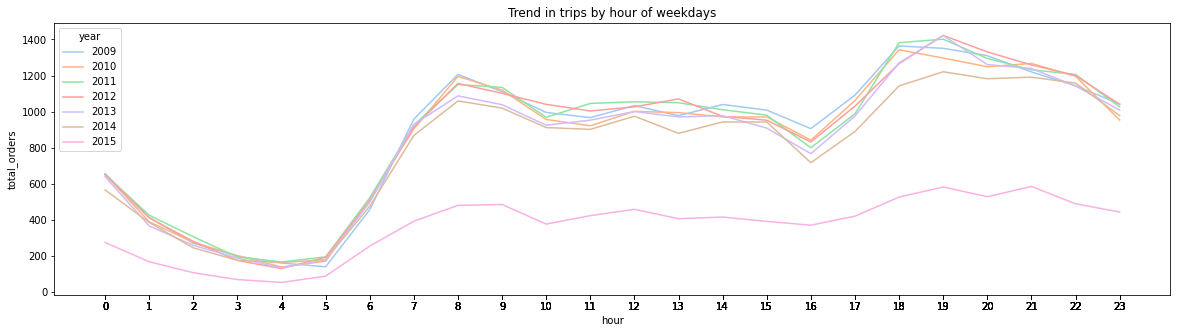

In [ ]:
fig, ax =plt.subplots(figsize = (20,5))
ax = sns.lineplot(x='hour',y='total_orders', hue = 'year' ,palette = 'pastel', data = time_order_wd)
ax.set(xticks=time_order_wd['hour'])
ax.set_title('Trend in trips by hour of weekdays')

In [ ]:
time_group_wd = dfd_time_weekday.groupby(['pickup_hour','pickup_year'], as_index=False)
time_fare_wd = time_group_wd['fare_amount'].mean()
time_fare_wd.columns = ['hour','year','avg fare']
time_fare_wd

hour  year   avg fare
0       0  2009   9.954260
1       0  2010  10.129094
2       0  2011  10.520123
3       0  2012  11.056703
4       0  2013  11.877602
..    ...   ...        ...
163    23  2011   9.726511
164    23  2012  10.323490
165    23  2013  11.335595
166    23  2014  11.900993
167    23  2015  12.499389

[168 rows x 3 columns]

Text(0.5, 1.0, 'Average Fare by hour of weekdays')

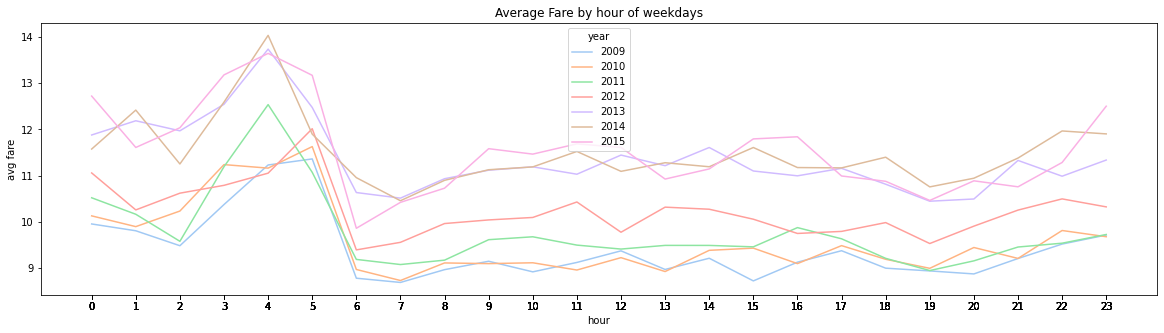

In [ ]:
fig, ax =plt.subplots(figsize = (20,5))
ax = sns.lineplot(x='hour',y='avg fare', hue = 'year' ,palette = 'pastel', data = time_fare_wd)
ax.set(xticks=time_order_wd['hour'])
ax.set_title('Average Fare by hour of weekdays')

In Weekdays, the total orders trend and fare average trend have the same pattern as the bulky trend

In [ ]:
dfd_time_weekend = dfd_time[dfd_time['day_category']=='Weekend']
dfd_time_weekend

key_y  fare_amount     pickup_datetime  \
5         2014-10-12 07:04:00.0000002         24.5 2014-10-12 07:04:00   
10      2011-06-25 11:19:00.000000102         10.9 2011-06-25 11:19:00   
14        2011-03-19 23:58:27.0000003         10.5 2011-03-19 23:58:27   
16      2009-08-08 00:20:00.000000183          4.9 2009-08-08 00:20:00   
20      2010-09-04 16:12:00.000000152          7.7 2010-09-04 16:12:00   
...                               ...          ...                 ...   
183849    2015-05-24 22:05:56.0000002         12.0 2015-05-24 22:05:56   
183851  2010-01-30 16:24:00.000000199          8.9 2010-01-30 16:24:00   
183852    2012-09-29 19:51:27.0000006          9.5 2012-09-29 19:51:27   
183854   2012-10-28 10:49:00.00000053          3.0 2012-10-28 10:49:00   
183858   2010-05-15 04:08:00.00000076         14.1 2010-05-15 04:08:00   

       pickup_date pickup_day day_category  pickup_longitude  pickup_latitude  \
5       2014-10-12     Sunday      Weekend        -73.961447        40.693965   
10      2011-06-25   Saturday      Weekend        -73.953352        40.767382   
14      2011-03-19   Saturday      Weekend        -74.005665        40.741138   
16      2009-08-08   Saturday      Weekend        -73.992075        40.719633   
20      2010-09-04   Saturday      Weekend        -73.994300        40.739512   
...            ...        ...          ...               ...              ...   
183849  2015-05-24     Sunday      Weekend        -73.987106        40.741894   
183851  2010-01-30   Saturday      Weekend        -74.003548        40.714045   
183852  2012-09-29   Saturday      Weekend        -73.987798        40.721210   
183854  2012-10-28     Sunday      Weekend        -73.987042        40.739367   
183858  2010-05-15   Saturday      Weekend        -73.984395        40.720077   

        dropoff_longitude  dropoff_latitude  passenger_count  distance_km  \
5              -73.871195         40.774297                5    11.731199   
10             -73.972510         40.796137                1     3.581307   
14             -73.977830         40.749338                2     2.515990   
16             -73.985323         40.727405                1     1.034720   
20             -73.988070         40.724482                2     1.751790   
...                   ...               ...              ...          ...   
183849         -73.952240         40.772957                1     4.533815   
183851         -73.991053         40.684500                1     3.450045   
183852         -73.980960         40.744388                1     2.640935   
183854         -73.986525         40.740297                1     0.112212   
183858         -73.985508         40.768793                1     5.417869   

       distance_lvl  pickup_day_num  pickup_year  pickup_month  pickup_hour  \
5               Far              12         2014            10            7   
10             Near              25         2011             6           11   
14             Near              19         2011             3           23   
16             Near               8         2009             8            0   
20             Near               4         2010             9           16   
...             ...             ...          ...           ...          ...   
183849         Near              24         2015             5           22   
183851         Near              30         2010             1           16   
183852         Near              29         2012             9           19   
183854         Near              28         2012            10           10   
183858     Moderate              15         2010             5            4   

        distance_miles month_year   day_part  
5             7.289427    2014-10    morning  
10            2.225320    2011-06    morning  
14            1.563363    2011-03      night  
16            0.642945    2009-08      night  
20            1.088512    2010-09  afternoon  
...           

In [ ]:
time_group_we = dfd_time_weekend.groupby(['pickup_hour','pickup_year'], as_index=False)
time_order_we = time_group_we['key_y'].count()
time_order_we.columns = ['hour','year','total_orders']
time_order_we

hour  year  total_orders
0       0  2009           511
1       0  2010           469
2       0  2011           531
3       0  2012           503
4       0  2013           501
..    ...   ...           ...
163    23  2011           395
164    23  2012           427
165    23  2013           384
166    23  2014           414
167    23  2015           193

[168 rows x 3 columns]

Text(0.5, 1.0, 'Trend in trips  by hour of weekend')

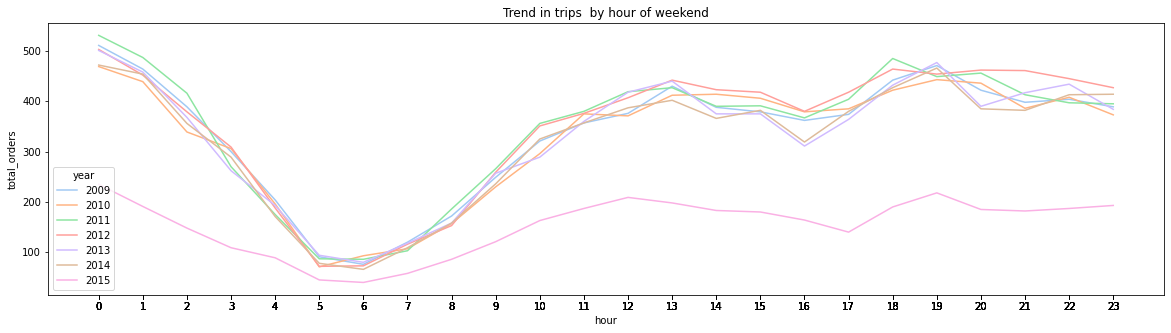

In [ ]:
fig, ax =plt.subplots(figsize = (20,5))
ax = sns.lineplot(x='hour',y='total_orders', hue = 'year' ,palette = 'pastel', data = time_order_we)
ax.set(xticks=time_order_we['hour'])
ax.set_title('Trend in trips  by hour of weekend')

In [ ]:
time_group_we = dfd_time_weekend.groupby(['pickup_hour','pickup_year'], as_index=False)
time_fare_we = time_group_we['fare_amount'].mean()
time_fare_we.columns = ['hour','year','avg fare']
time_fare_we

hour  year   avg fare
0       0  2009   9.529159
1       0  2010   9.833220
2       0  2011   9.736158
3       0  2012  10.578907
4       0  2013  11.873253
..    ...   ...        ...
163    23  2011  10.008861
164    23  2012  10.359016
165    23  2013  12.165286
166    23  2014  12.343333
167    23  2015  11.596477

[168 rows x 3 columns]

Text(0.5, 1.0, 'Average Fare by hour of weekend')

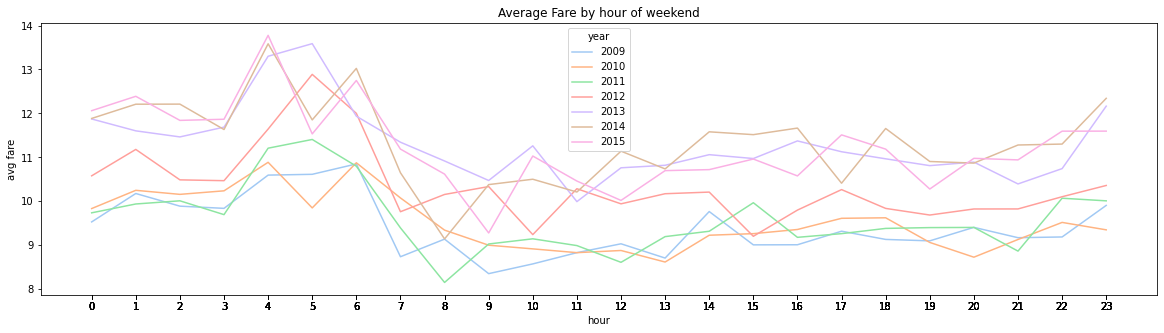

In [ ]:
fig, ax =plt.subplots(figsize = (20,5))
ax = sns.lineplot(x='hour',y='avg fare', hue = 'year' ,palette = 'pastel', data = time_fare_we)
ax.set(xticks=time_order_we['hour'])
ax.set_title('Average Fare by hour of weekend')

- High Total orders during the weekend start from 10.00 in the morning
- But, the average fare isn't giving much information about some patterns, this could happen because during weekend, customers only book uber ride occasionally.

- Since the trips during weekdays dominate the total order, the bulky trend shows the same pattern as on the weekdays.

## Analysis based on days category

In [ ]:
dfd_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183859 entries, 0 to 183858
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   key_y              183859 non-null  object        
 1   fare_amount        183859 non-null  float64       
 2   pickup_datetime    183859 non-null  datetime64[ns]
 3   pickup_date        183859 non-null  object        
 4   pickup_day         183859 non-null  object        
 5   day_category       183859 non-null  object        
 6   pickup_longitude   183859 non-null  float64       
 7   pickup_latitude    183859 non-null  float64       
 8   dropoff_longitude  183859 non-null  float64       
 9   dropoff_latitude   183859 non-null  float64       
 10  passenger_count    183859 non-null  int64         
 11  distance_km        183859 non-null  float64       
 12  distance_lvl       183859 non-null  object        
 13  pickup_day_num     183859 non-null  int64   

In [ ]:
dfd_dc = dfd_clean.copy()

In [ ]:
dfd_dc.head()

key_y  fare_amount     pickup_datetime pickup_date  \
0    2015-05-07 19:52:06.0000003          7.5 2015-05-07 19:52:06  2015-05-07   
1    2009-07-17 20:04:56.0000002          7.7 2009-07-17 20:04:56  2009-07-17   
2   2009-08-24 21:45:00.00000061         12.9 2009-08-24 21:45:00  2009-08-24   
3    2009-06-26 08:22:21.0000001          5.3 2009-06-26 08:22:21  2009-06-26   
4  2014-08-28 17:47:00.000000188         16.0 2014-08-28 17:47:00  2014-08-28   

  pickup_day day_category  pickup_longitude  pickup_latitude  \
0   Thursday     Weekdays        -73.999817        40.738354   
1     Friday     Weekdays        -73.994355        40.728225   
2     Monday     Weekdays        -74.005043        40.740770   
3     Friday     Weekdays        -73.976124        40.790844   
4   Thursday     Weekdays        -73.925023        40.744085   

   dropoff_longitude  dropoff_latitude  passenger_count  distance_km  \
0         -73.999512         40.723217                1     1.683349   
1         -73.994710         40.750325                1     2.457628   
2         -73.962565         40.772647                1     5.036456   
3         -73.965316         40.803349                3     1.661710   
4         -73.973082         40.761247                5     4.475520   

  distance_lvl  pickup_day_num  pickup_year  pickup_month  pickup_hour  \
0         Near               7         2015             5           19   
1         Near              17         2009             7           20   
2     Moderate              24         2009             8           21   
3         Near              26         2009             6            8   
4         Near              28         2014             8           17   

   distance_miles month_year  
0        1.045984    2015-05  
1        1.527099    2009-07  
2        3.129508    2009-08  
3        1.032538    2009-06  
4        2.780958    2014-08

In [ ]:
vis_1 = dfd_dc.groupby(['pickup_year','pickup_month','day_category'])['key_y'].agg('count').reset_index()
vis_1['total_order'] = vis_1['key_y']
vis_1.columns = ['pickup_year','pickup_month','day_category','key_y','total_order']
vis_1.drop(columns=['key_y'],inplace= True)
vis_1

pickup_year  pickup_month day_category  total_order
0           2009             1     Weekdays         1674
1           2009             1      Weekend          760
2           2009             2     Weekdays         1563
3           2009             2      Weekend          639
4           2009             3     Weekdays         1866
..           ...           ...          ...          ...
151         2015             4      Weekend          572
152         2015             5     Weekdays         1502
153         2015             5      Weekend          705
154         2015             6     Weekdays         1417
155         2015             6      Weekend          522

[156 rows x 4 columns]

In [ ]:
vis_1_ = vis_1.groupby('day_category')['total_order'].agg('sum').reset_index()
vis_1_

day_category  total_order
0     Weekdays       131639
1      Weekend        52220

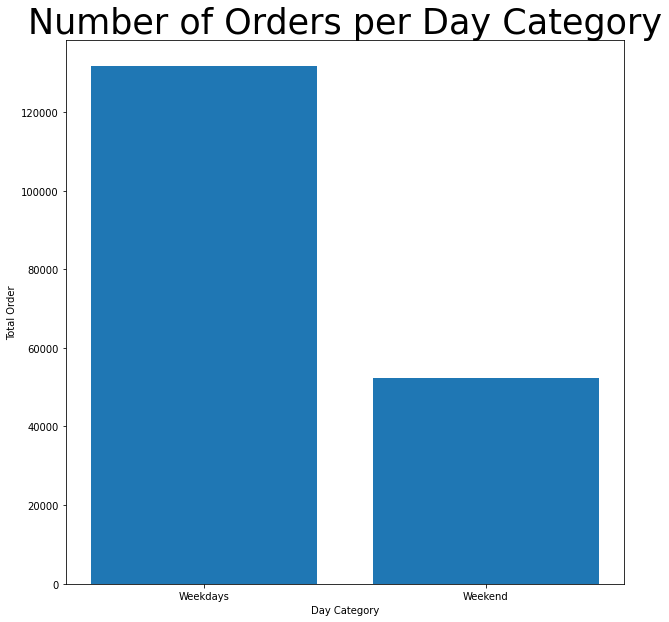

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Number of Orders per Day Category',fontsize=35)
plt.xlabel('Day Category',fontsize=10)
plt.ylabel('Total Order',fontsize=10)

x = vis_1_['day_category']
y = vis_1_['total_order']

plt.bar(x,y)
plt.show()

In [ ]:
vis_2_ = vis_1.groupby(['pickup_month','day_category'])['total_order'].agg('sum').reset_index()
vis_2_

pickup_month day_category  total_order
0              1     Weekdays        11435
1              1      Weekend         4891
2              2     Weekdays        10880
3              2      Weekend         4516
4              3     Weekdays        12199
5              3      Weekend         5100
6              4     Weekdays        12440
7              4      Weekend         4637
8              5     Weekdays        12251
9              5      Weekend         4968
10             6     Weekdays        11882
11             6      Weekend         4455
12             7     Weekdays        10280
13             7      Weekend         3642
14             8     Weekdays         9589
15             8      Weekend         3406
16             9     Weekdays         9953
17             9      Weekend         4115
18            10     Weekdays        10533
19            10      Weekend         4356
20            11     Weekdays         9897
21            11      Weekend         4158
22            12     Weekdays        10300
23            12      Weekend         3976

Text(0.5, 1.0, 'Trend in trips  by Day Category of Month')

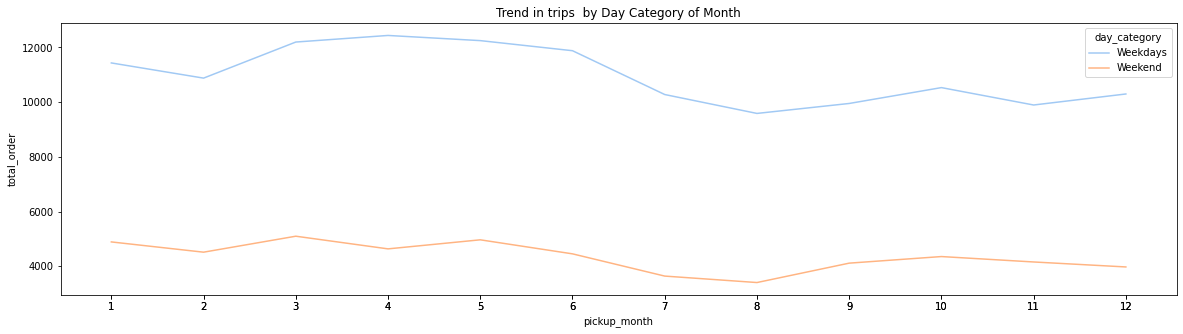

In [ ]:
fig, ax =plt.subplots(figsize = (20,5))
ax = sns.lineplot(x='pickup_month',y='total_order', hue = 'day_category' ,palette = 'pastel', data = vis_2_)
ax.set(xticks=vis_2_['pickup_month'])
ax.set_title('Trend in trips  by Day Category of Month')

In [ ]:
vis_3_ = vis_1.groupby(['pickup_month','day_category'])['total_order'].agg('mean').reset_index()
vis_3_['avg_order'] = vis_3_['total_order']
vis_3_

pickup_month day_category  total_order    avg_order
0              1     Weekdays  1633.571429  1633.571429
1              1      Weekend   698.714286   698.714286
2              2     Weekdays  1554.285714  1554.285714
3              2      Weekend   645.142857   645.142857
4              3     Weekdays  1742.714286  1742.714286
5              3      Weekend   728.571429   728.571429
6              4     Weekdays  1777.142857  1777.142857
7              4      Weekend   662.428571   662.428571
8              5     Weekdays  1750.142857  1750.142857
9              5      Weekend   709.714286   709.714286
10             6     Weekdays  1697.428571  1697.428571
11             6      Weekend   636.428571   636.428571
12             7     Weekdays  1713.333333  1713.333333
13             7      Weekend   607.000000   607.000000
14             8     Weekdays  1598.166667  1598.166667
15             8      Weekend   567.666667   567.666667
16             9     Weekdays  1658.833333  1658.833333
17             9      Weekend   685.833333   685.833333
18            10     Weekdays  1755.500000  1755.500000
19            10      Weekend   726.000000   726.000000
20            11     Weekdays  1649.500000  1649.500000
21            11      Weekend   693.000000   693.000000
22            12     Weekdays  1716.666667  1716.666667
23            12      Weekend   662.666667   662.666667

Text(0.5, 1.0, 'Average orders by Day Category of Months ')

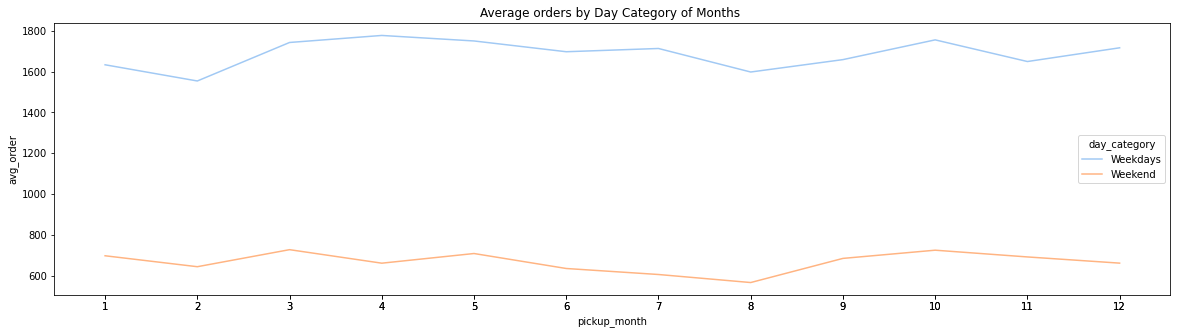

In [ ]:
fig, ax =plt.subplots(figsize = (20,5))
ax = sns.lineplot(x='pickup_month',y='avg_order', hue = 'day_category' ,palette = 'pastel', data = vis_3_)
ax.set(xticks=vis_3_['pickup_month'])
ax.set_title('Average orders by Day Category of Months ')

In [ ]:
vis_2 = dfd_dc.groupby(['pickup_year','pickup_month','pickup_day_num'])['key_y'].agg('count').reset_index()
vis_2['total_order'] = vis_2['key_y']
vis_2.columns = ['pickup_year','pickup_month','pickup_day_num','key_y','total_order']
vis_2.drop(columns=['key_y'],inplace= True)
vis_2

pickup_year  pickup_month  pickup_day_num  total_order
0            2009             1               1           59
1            2009             1               2           52
2            2009             1               3           79
3            2009             1               4           75
4            2009             1               5           61
...           ...           ...             ...          ...
2367         2015             6              26           74
2368         2015             6              27           69
2369         2015             6              28           56
2370         2015             6              29           59
2371         2015             6              30           63

[2372 rows x 4 columns]

In [ ]:
vis_4_ = vis_2.groupby(['pickup_year','pickup_day_num'])['total_order'].agg('sum').reset_index()
vis_4_

pickup_year  pickup_day_num  total_order
0           2009               1          865
1           2009               2          881
2           2009               3          998
3           2009               4          905
4           2009               5          946
..           ...             ...          ...
212         2015              27          373
213         2015              28          428
214         2015              29          343
215         2015              30          364
216         2015              31          219

[217 rows x 3 columns]

Text(0.5, 1.0, 'Trend in trips  by Day Category of Year')

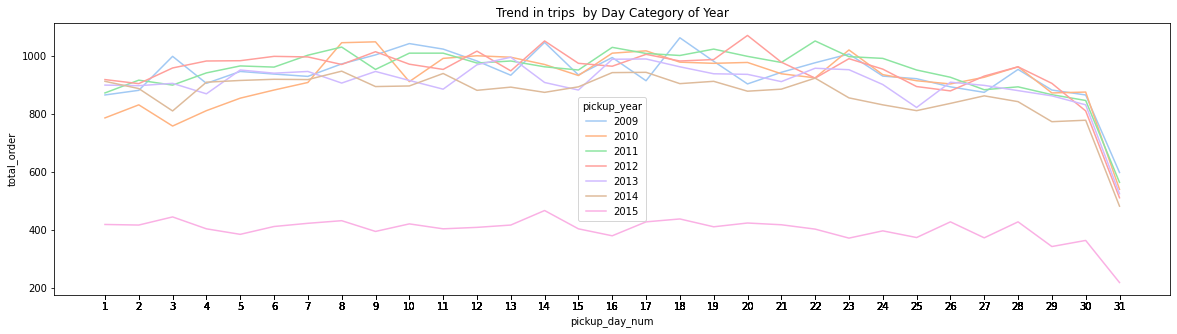

In [ ]:
fig, ax =plt.subplots(figsize = (20,5))
ax = sns.lineplot(x='pickup_day_num',y='total_order', hue = 'pickup_year' ,palette = 'pastel', data = vis_4_)
ax.set(xticks=vis_4_['pickup_day_num'])
ax.set_title('Trend in trips  by Day Category of Year')

In [ ]:
vis_5_ = vis_2.groupby(['pickup_month','pickup_day_num'])['total_order'].agg('sum').reset_index()
vis_5_

pickup_month  pickup_day_num  total_order
0               1               1          400
1               1               2          376
2               1               3          444
3               1               4          465
4               1               5          480
..            ...             ...          ...
361            12              27          298
362            12              28          396
363            12              29          428
364            12              30          428
365            12              31          438

[366 rows x 3 columns]

Text(0.5, 1.0, 'Trend in trips  by Day Category of Months')

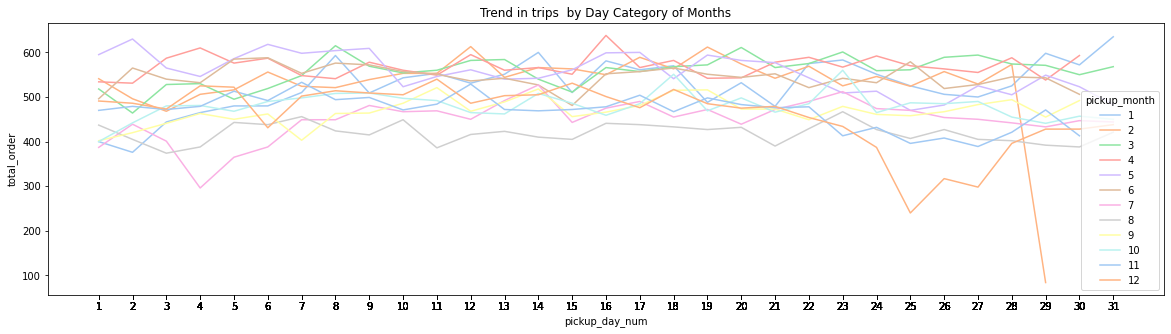

In [ ]:
fig, ax =plt.subplots(figsize = (20,5))
ax = sns.lineplot(x='pickup_day_num',y='total_order', hue = 'pickup_month' ,palette = 'pastel', data = vis_5_)
ax.set(xticks=vis_5_['pickup_day_num'])
ax.set_title('Trend in trips  by Day Category of Months')

In [ ]:
vis_3 = dfd_dc.groupby(['pickup_year','pickup_month','day_category'])['fare_amount'].agg('sum').reset_index()
vis_3.columns = ['pickup_year','pickup_month','day_category','fare_amount']
vis_3

pickup_year  pickup_month day_category  fare_amount
0           2009             1     Weekdays     15164.80
1           2009             1      Weekend      6822.35
2           2009             2     Weekdays     14269.60
3           2009             2      Weekend      5747.80
4           2009             3     Weekdays     17201.00
..           ...           ...          ...          ...
151         2015             4      Weekend      6454.14
152         2015             5     Weekdays     17424.89
153         2015             5      Weekend      8043.33
154         2015             6     Weekdays     16217.40
155         2015             6      Weekend      6268.52

[156 rows x 4 columns]

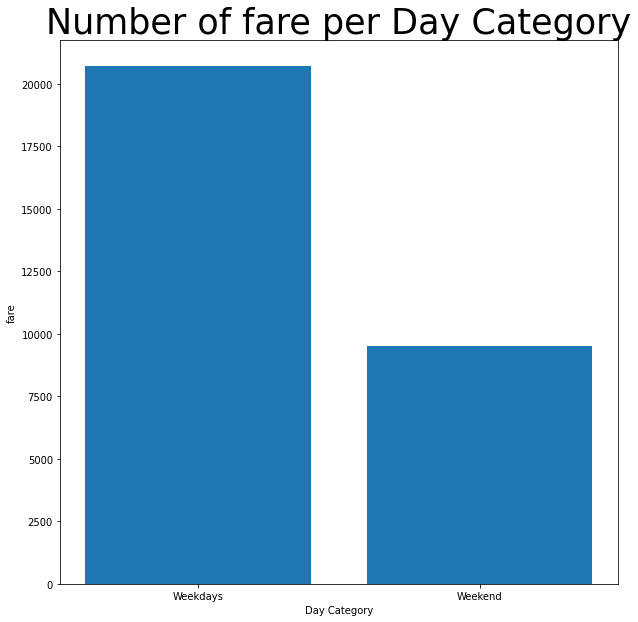

In [ ]:
plt.figure(figsize=(10,10))
plt.title('Number of fare per Day Category',fontsize=35)
plt.xlabel('Day Category',fontsize=10)
plt.ylabel('fare',fontsize=10)

x = vis_3['day_category']
y = vis_3['fare_amount']

plt.bar(x,y)
plt.show()

In [ ]:
vis_6_ = vis_3.groupby(['pickup_month','day_category'])['fare_amount'].agg('sum').reset_index()
vis_6_

pickup_month day_category  fare_amount
0              1     Weekdays    110280.83
1              1      Weekend     47129.85
2              2     Weekdays    108010.49
3              2      Weekend     45042.78
4              3     Weekdays    121799.92
5              3      Weekend     51040.26
6              4     Weekdays    126195.56
7              4      Weekend     47139.29
8              5     Weekdays    125944.36
9              5      Weekend     51675.75
10             6     Weekdays    122004.18
11             6      Weekend     46305.03
12             7     Weekdays    104044.40
13             7      Weekend     36355.88
14             8     Weekdays     95547.51
15             8      Weekend     34228.99
16             9     Weekdays    103969.21
17             9      Weekend     43917.72
18            10     Weekdays    110221.34
19            10      Weekend     45714.49
20            11     Weekdays    101671.57
21            11      Weekend     43529.74
22            12     Weekdays    106323.70
23            12      Weekend     41231.13

Text(0.5, 1.0, 'Fare by Day Category of Month')

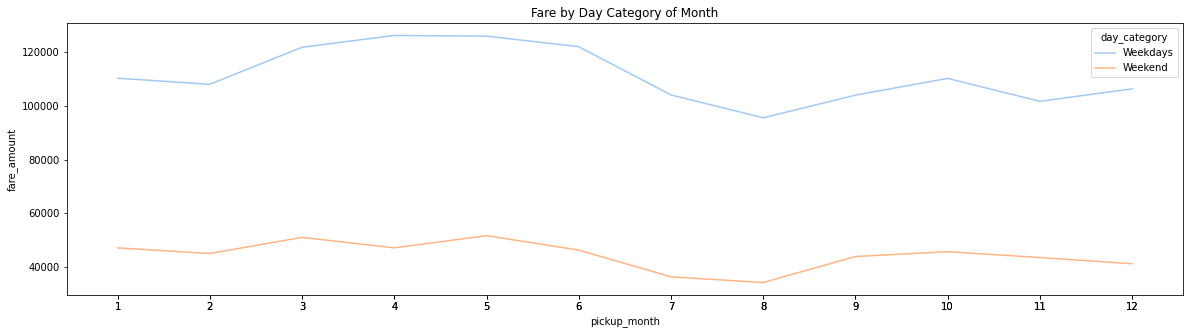

In [ ]:
fig, ax =plt.subplots(figsize = (20,5))
ax = sns.lineplot(x='pickup_month',y='fare_amount', hue = 'day_category' ,palette = 'pastel', data = vis_6_)
ax.set(xticks=vis_6_['pickup_month'])
ax.set_title('Fare by Day Category of Month')

## Analysis based on month

In [ ]:
dfm = dfd_clean[['key_y','fare_amount','distance_km','pickup_datetime']]
dfm.columns = ['key','fare','distance','datetime']
dfm.head()

key  fare  distance            datetime
0    2015-05-07 19:52:06.0000003   7.5  1.683349 2015-05-07 19:52:06
1    2009-07-17 20:04:56.0000002   7.7  2.457628 2009-07-17 20:04:56
2   2009-08-24 21:45:00.00000061  12.9  5.036456 2009-08-24 21:45:00
3    2009-06-26 08:22:21.0000001   5.3  1.661710 2009-06-26 08:22:21
4  2014-08-28 17:47:00.000000188  16.0  4.475520 2014-08-28 17:47:00

In [ ]:
dfm['year'] = dfm['datetime'].dt.year
dfm.head()

key  fare  distance            datetime  year
0    2015-05-07 19:52:06.0000003   7.5  1.683349 2015-05-07 19:52:06  2015
1    2009-07-17 20:04:56.0000002   7.7  2.457628 2009-07-17 20:04:56  2009
2   2009-08-24 21:45:00.00000061  12.9  5.036456 2009-08-24 21:45:00  2009
3    2009-06-26 08:22:21.0000001   5.3  1.661710 2009-06-26 08:22:21  2009
4  2014-08-28 17:47:00.000000188  16.0  4.475520 2014-08-28 17:47:00  2014

In [ ]:
#tren monthly
dfm1 = dfm.copy()
dfm1['month'] = dfm1['datetime'].dt.month
dfm1.head()

key  fare  distance            datetime  year  \
0    2015-05-07 19:52:06.0000003   7.5  1.683349 2015-05-07 19:52:06  2015   
1    2009-07-17 20:04:56.0000002   7.7  2.457628 2009-07-17 20:04:56  2009   
2   2009-08-24 21:45:00.00000061  12.9  5.036456 2009-08-24 21:45:00  2009   
3    2009-06-26 08:22:21.0000001   5.3  1.661710 2009-06-26 08:22:21  2009   
4  2014-08-28 17:47:00.000000188  16.0  4.475520 2014-08-28 17:47:00  2014   

   month  
0      5  
1      7  
2      8  
3      6  
4      8

In [ ]:
def month (i) :
  I = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
  str = I[i-1]
  return (str)

month(1)

'Jan'

In [ ]:
dfm1['month_str'] = dfm1['month'].apply(month)
dfm1.head()

key  fare  distance            datetime  year  \
0    2015-05-07 19:52:06.0000003   7.5  1.683349 2015-05-07 19:52:06  2015   
1    2009-07-17 20:04:56.0000002   7.7  2.457628 2009-07-17 20:04:56  2009   
2   2009-08-24 21:45:00.00000061  12.9  5.036456 2009-08-24 21:45:00  2009   
3    2009-06-26 08:22:21.0000001   5.3  1.661710 2009-06-26 08:22:21  2009   
4  2014-08-28 17:47:00.000000188  16.0  4.475520 2014-08-28 17:47:00  2014   

   month month_str  
0      5       May  
1      7       Jul  
2      8       Aug  
3      6       Jun  
4      8       Aug

In [ ]:
dfm1['month_year'] = dfm1['datetime'].dt.strftime('%Y-%m')
dfm1.head()

key  fare  distance            datetime  year  \
0    2015-05-07 19:52:06.0000003   7.5  1.683349 2015-05-07 19:52:06  2015   
1    2009-07-17 20:04:56.0000002   7.7  2.457628 2009-07-17 20:04:56  2009   
2   2009-08-24 21:45:00.00000061  12.9  5.036456 2009-08-24 21:45:00  2009   
3    2009-06-26 08:22:21.0000001   5.3  1.661710 2009-06-26 08:22:21  2009   
4  2014-08-28 17:47:00.000000188  16.0  4.475520 2014-08-28 17:47:00  2014   

   month month_str month_year  
0      5       May    2015-05  
1      7       Jul    2009-07  
2      8       Aug    2009-08  
3      6       Jun    2009-06  
4      8       Aug    2014-08

In [ ]:
dfm1a = dfm1.copy()
dfm1a = dfm1a[~(dfm1a['year'] == 2015)].reset_index()
dfm1a.head()

index                            key  fare   distance            datetime  \
0      1    2009-07-17 20:04:56.0000002   7.7   2.457628 2009-07-17 20:04:56   
1      2   2009-08-24 21:45:00.00000061  12.9   5.036456 2009-08-24 21:45:00   
2      3    2009-06-26 08:22:21.0000001   5.3   1.661710 2009-06-26 08:22:21   
3      4  2014-08-28 17:47:00.000000188  16.0   4.475520 2014-08-28 17:47:00   
4      5    2014-10-12 07:04:00.0000002  24.5  11.731199 2014-10-12 07:04:00   

   year  month month_str month_year  
0  2009      7       Jul    2009-07  
1  2009      8       Aug    2009-08  
2  2009      6       Jun    2009-06  
3  2014      8       Aug    2014-08  
4  2014     10       Oct    2014-10

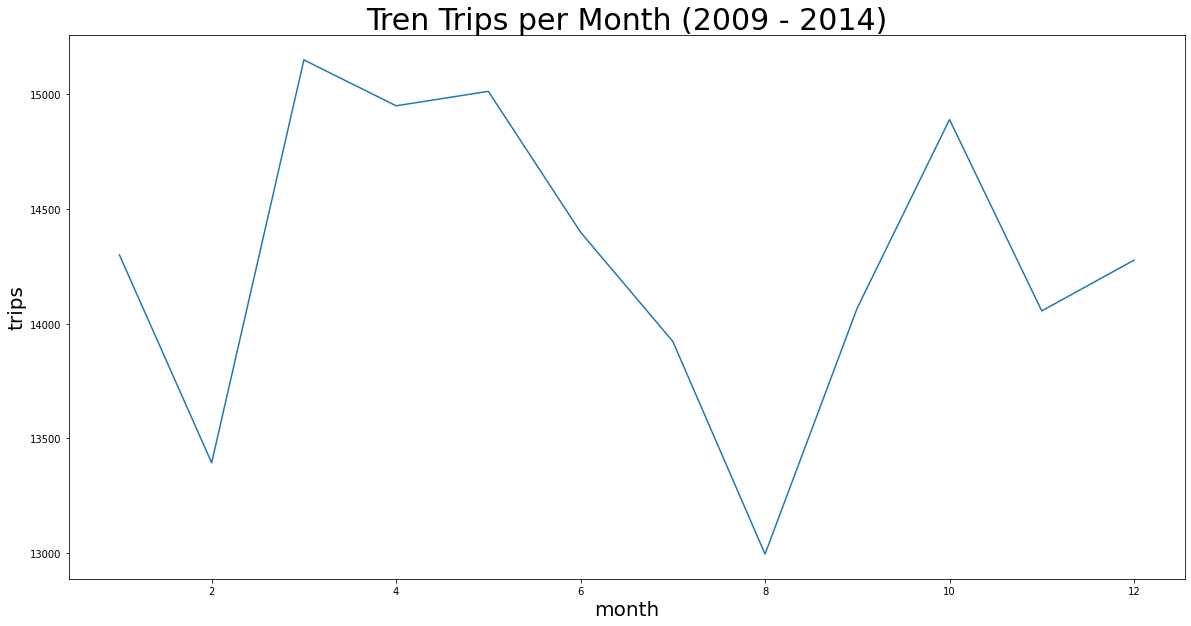

In [ ]:
dfm1a_1 = dfm1a.groupby('month')['key'].agg('count').reset_index()
dfm1a_1

plt.figure(figsize=(20,10))
plt.title('Tren Trips per Month (2009 - 2014)',fontsize=30)
plt.xlabel('month',fontsize=20)
plt.ylabel('trips',fontsize=20)

x = dfm1a_1['month']
y = dfm1a_1['key']

plt.plot(x,y)
plt.show()

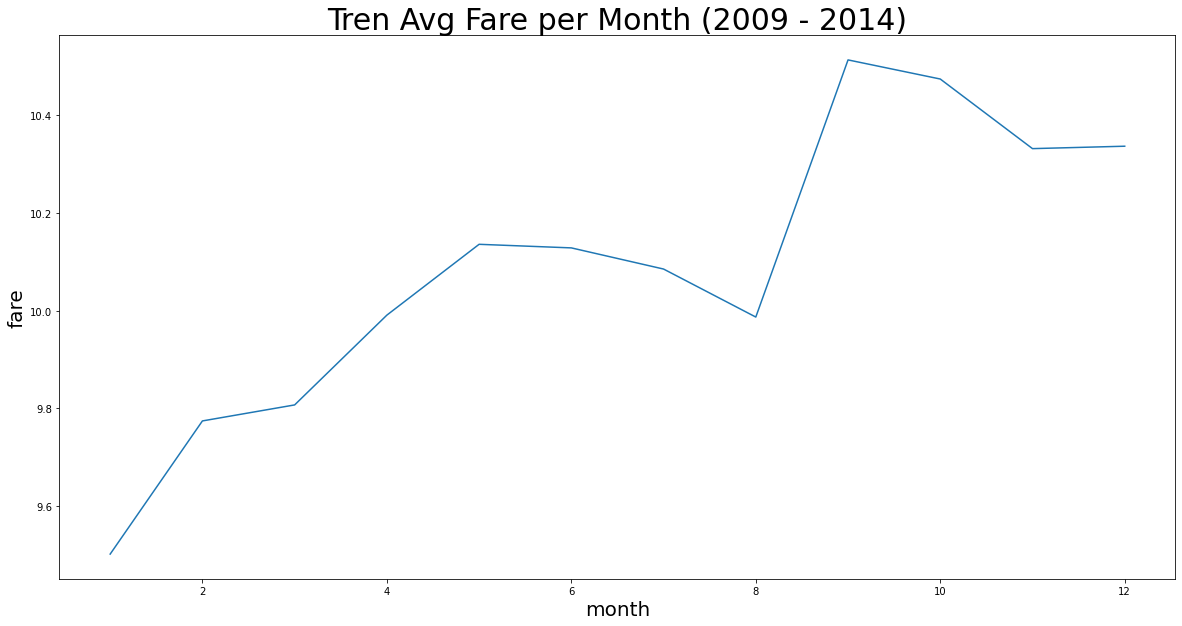

In [ ]:
dfm1a_2 = dfm1a.groupby('month')['fare'].agg('mean').reset_index()

plt.figure(figsize=(20,10))
plt.title('Tren Avg Fare per Month (2009 - 2014)',fontsize=30)
plt.xlabel('month',fontsize=20)
plt.ylabel('fare',fontsize=20)

x = dfm1a_2['month']
y = dfm1a_2['fare']

plt.plot(x,y)
plt.show()

In [ ]:
dfm1b = dfm1.copy()
dfm1b

key  fare   distance            datetime  \
0         2015-05-07 19:52:06.0000003   7.5   1.683349 2015-05-07 19:52:06   
1         2009-07-17 20:04:56.0000002   7.7   2.457628 2009-07-17 20:04:56   
2        2009-08-24 21:45:00.00000061  12.9   5.036456 2009-08-24 21:45:00   
3         2009-06-26 08:22:21.0000001   5.3   1.661710 2009-06-26 08:22:21   
4       2014-08-28 17:47:00.000000188  16.0   4.475520 2014-08-28 17:47:00   
...                               ...   ...        ...                 ...   
183854   2012-10-28 10:49:00.00000053   3.0   0.112212 2012-10-28 10:49:00   
183855    2014-03-14 01:09:00.0000008   7.5   1.875080 2014-03-14 01:09:00   
183856   2009-06-29 00:42:00.00000078  30.9  12.850521 2009-06-29 00:42:00   
183857    2015-05-20 14:56:25.0000004  14.5   3.539771 2015-05-20 14:56:25   
183858   2010-05-15 04:08:00.00000076  14.1   5.417869 2010-05-15 04:08:00   

        year  month month_str month_year  
0       2015      5       May    2015-05  
1       2009      7       Jul    2009-07  
2       2009      8       Aug    2009-08  
3       2009      6       Jun    2009-06  
4       2014      8       Aug    2014-08  
...      ...    ...       ...        ...  
183854  2012     10       Oct    2012-10  
183855  2014      3       Mar    2014-03  
183856  2009      6       Jun    2009-06  
183857  2015      5       May    2015-05  
183858  2010      5       May    2010-05  

[183859 rows x 8 columns]

In [ ]:
dfm1b_1 = dfm1b.groupby(['year','month_year','month'])['key'].agg('count').reset_index()
dfm1b_1

year month_year  month   key
0   2009    2009-01      1  2434
1   2009    2009-02      2  2202
2   2009    2009-03      3  2563
3   2009    2009-04      4  2455
4   2009    2009-05      5  2532
..   ...        ...    ...   ...
73  2015    2015-02      2  2003
74  2015    2015-03      3  2150
75  2015    2015-04      4  2128
76  2015    2015-05      5  2207
77  2015    2015-06      6  1939

[78 rows x 4 columns]

Text(0.5, 1.0, 'Trend Trips Monthly by 2015')

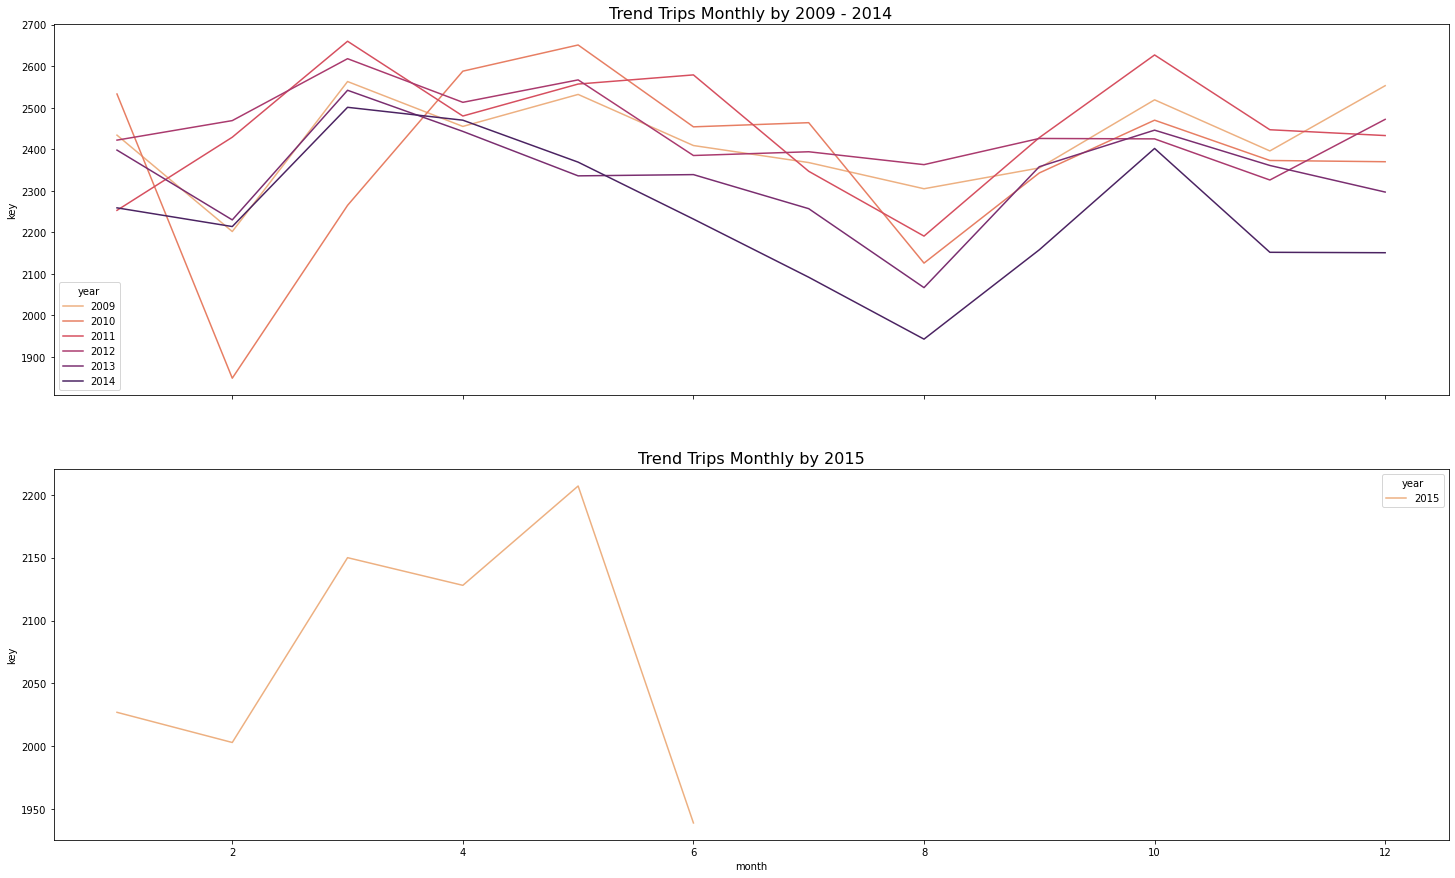

In [ ]:
fig = plt.figure(figsize=(25,15))
ax = fig.subplots(2,sharex=True)

dfm1b_1 = dfm1b.groupby(['year','month_year','month'])['key'].agg('count').reset_index()
dfm1b_1a = dfm1b_1[~(dfm1b_1['year'] == 2015)]
dfm1b_1b = dfm1b_1[(dfm1b_1['year'] == 2015)]

sns.lineplot(x=dfm1b_1a['month'],y=dfm1b_1a['key'],hue=dfm1b_1a['year'], data=dfm1b_1a,ax=ax[0],palette='flare')
ax[0].set_title("Trend Trips Monthly by 2009 - 2014",fontsize=16)
sns.lineplot(x=dfm1b_1b['month'],y=dfm1b_1b['key'],hue=dfm1b_1b['year'], data=dfm1b_1b,ax=ax[1],palette='flare')
ax[1].set_title("Trend Trips Monthly by 2015",fontsize=16)

Text(0.5, 1.0, 'Trend Avg Fare Monthly by 2015')

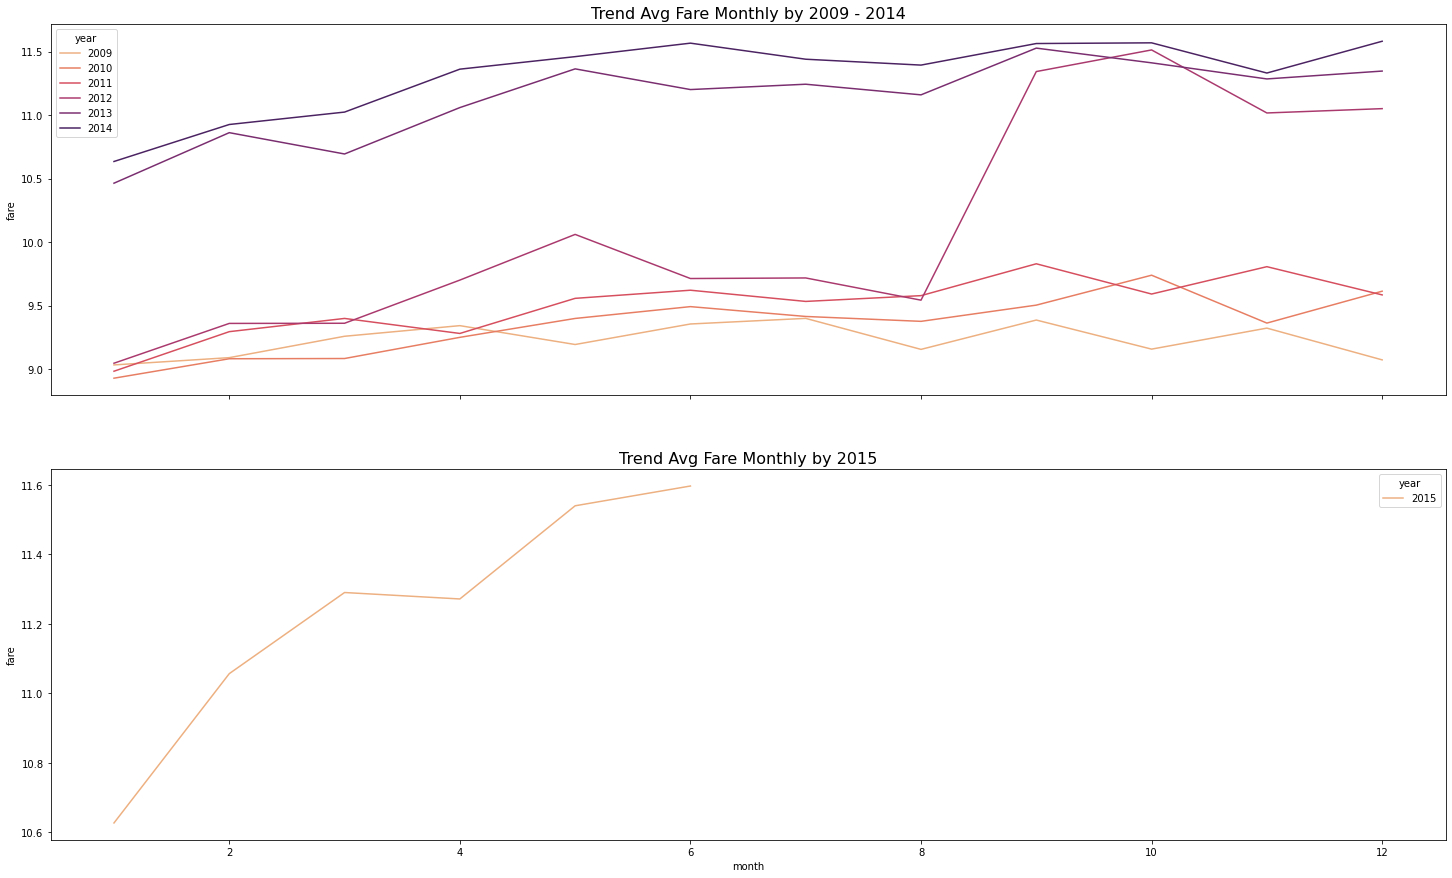

In [ ]:
fig = plt.figure(figsize=(25,15))
ax = fig.subplots(2,sharex=True)

dfm1b_2 = dfm1b.groupby(['year','month_year','month'])['fare'].agg('mean').reset_index()
dfm1b_2a = dfm1b_2[~(dfm1b_2['year'] == 2015)]
dfm1b_2b = dfm1b_2[(dfm1b_2['year'] == 2015)]

sns.lineplot(x=dfm1b_2a['month'],y=dfm1b_2a['fare'],hue=dfm1b_2a['year'], data=dfm1b_2a,ax=ax[0],palette='flare')
ax[0].set_title("Trend Avg Fare Monthly by 2009 - 2014",fontsize=16)
sns.lineplot(x=dfm1b_2b['month'],y=dfm1b_2b['fare'],hue=dfm1b_2b['year'], data=dfm1b_2b,ax=ax[1],palette='flare')
ax[1].set_title("Trend Avg Fare Monthly by 2015",fontsize=16)

In [ ]:
#yearly
dfm4 = dfm.copy()
dfm4.head()

key  fare  distance            datetime  year
0    2015-05-07 19:52:06.0000003   7.5  1.683349 2015-05-07 19:52:06  2015
1    2009-07-17 20:04:56.0000002   7.7  2.457628 2009-07-17 20:04:56  2009
2   2009-08-24 21:45:00.00000061  12.9  5.036456 2009-08-24 21:45:00  2009
3    2009-06-26 08:22:21.0000001   5.3  1.661710 2009-06-26 08:22:21  2009
4  2014-08-28 17:47:00.000000188  16.0  4.475520 2014-08-28 17:47:00  2014

[Text(0.5, 1.0, 'Trend Tren Yearly by 2009 - 2014')]

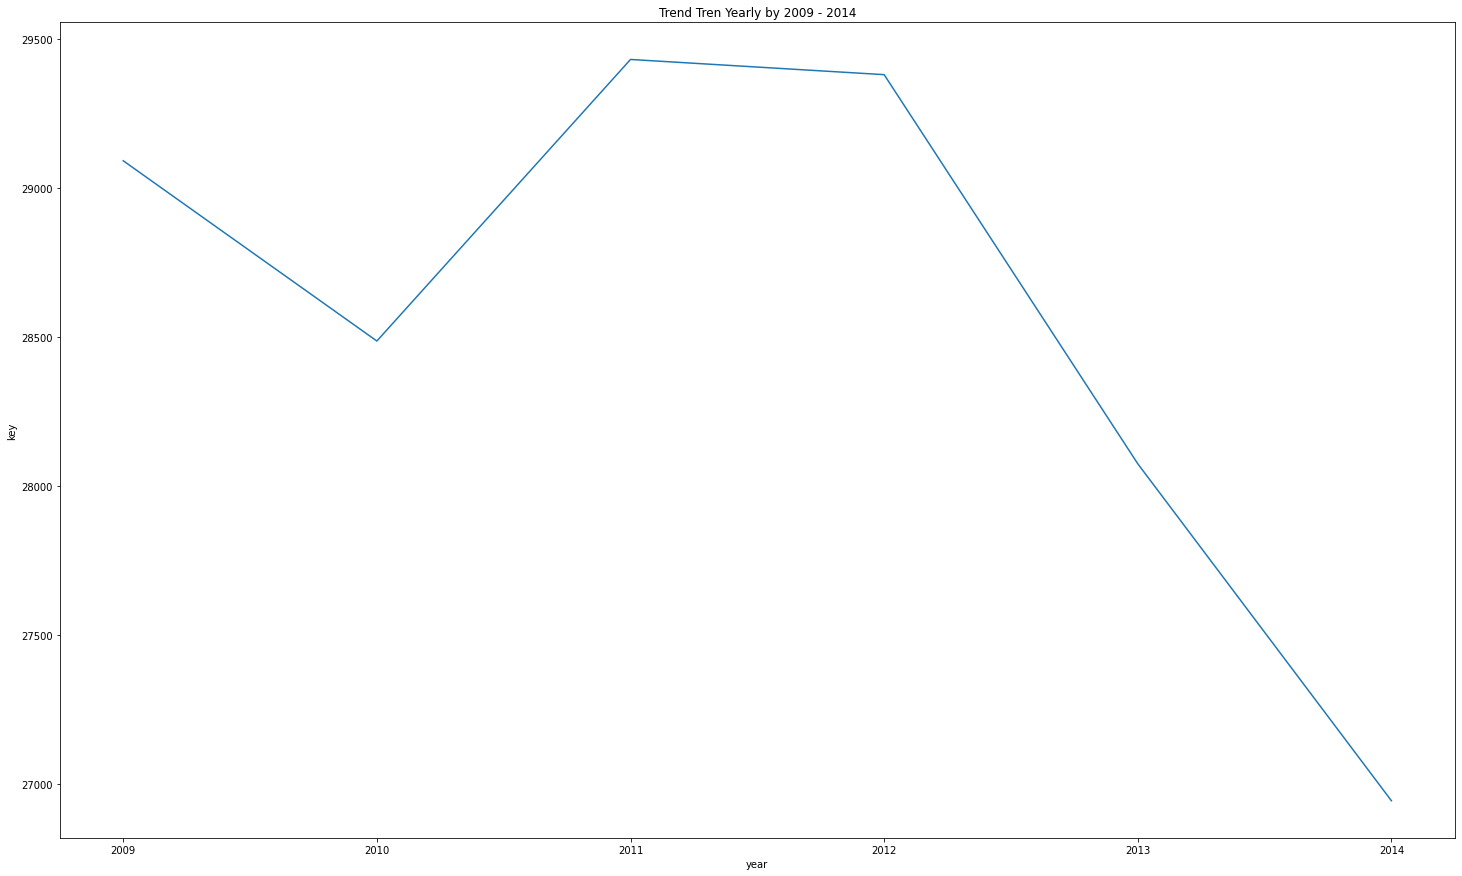

In [ ]:
dfm4a = dfm4[~(dfm4['year'] == 2015)].reset_index()
dfm4_11 = dfm4a.groupby(['year'])['key'].agg('count').reset_index()

fig = plt.figure(figsize=(25,15))
sns.lineplot(x=dfm4_11['year'],y=dfm4_11['key'], data=dfm4_11).set(title = "Trend Tren Yearly by 2009 - 2014")

In [ ]:
#dfm4a = dfm4[~(dfm4['year'] == 2015)].reset_index()
dfm4_1 = dfm4.groupby(['year'])['key'].agg('count').reset_index()
dfm4_1.columns = ['year','trip']
dfm4_1['trip_prev'] = dfm4_1['trip'].shift()
dfm4_1['growth'] = ( dfm4_1['trip'] - dfm4_1['trip_prev'] ) / dfm4_1['trip_prev'] * 100
dfm4_1

year   trip  trip_prev     growth
0  2009  29091        NaN        NaN
1  2010  28486    29091.0  -2.079681
2  2011  29431    28486.0   3.317419
3  2012  29380    29431.0  -0.173287
4  2013  28074    29380.0  -4.445201
5  2014  26943    28074.0  -4.028639
6  2015  12454    26943.0 -53.776491

[Text(0.5, 1.0, 'Trend Avg Fare Yearly by 2009 - 2014')]

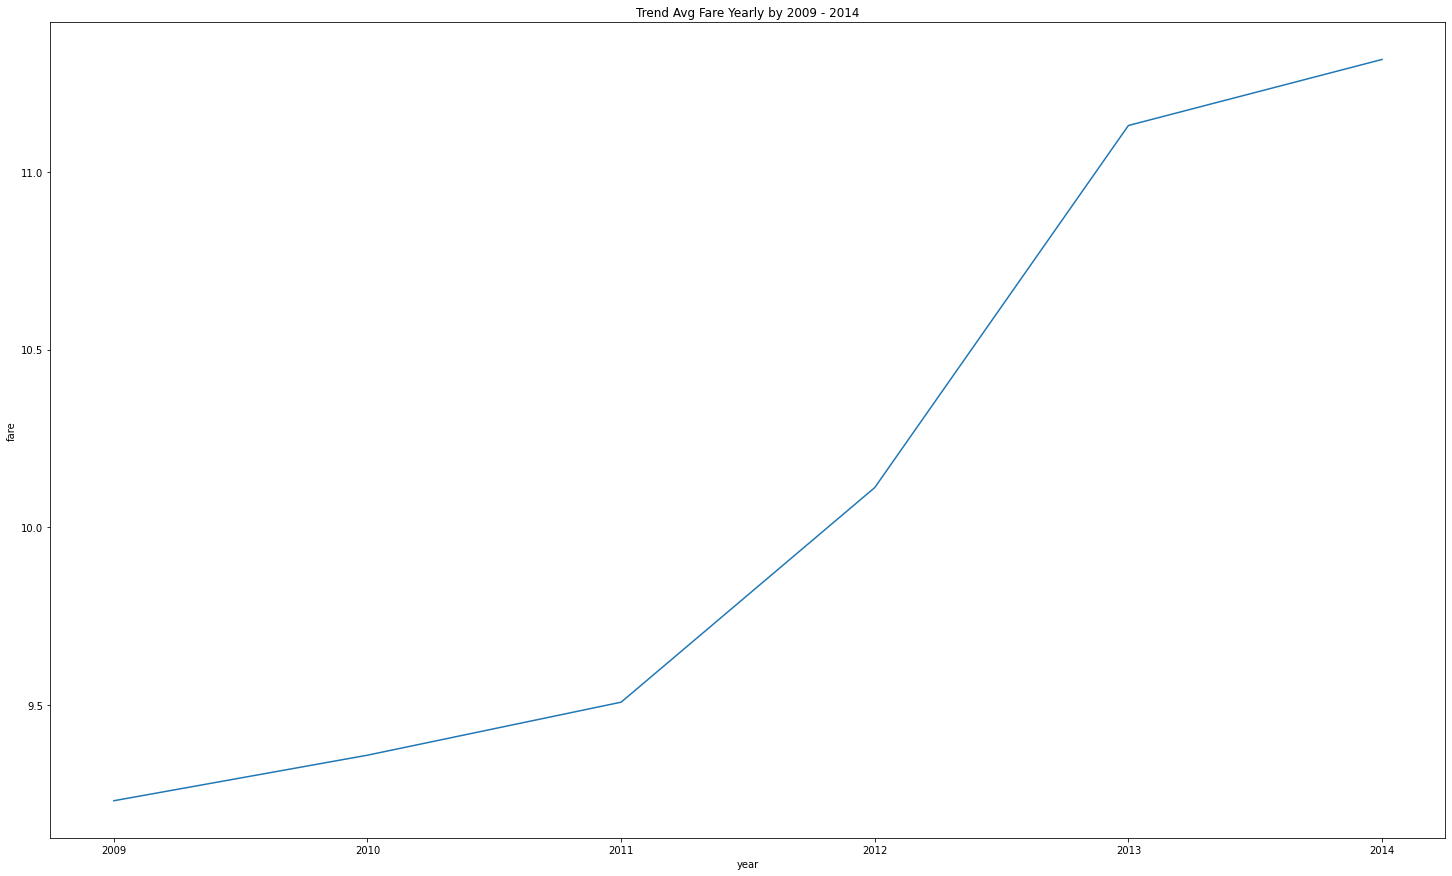

In [ ]:
dfm4_2 = dfm4a.groupby(['year'])['fare'].agg('mean').reset_index()

fig = plt.figure(figsize=(25,15))
sns.lineplot(x=dfm4_2['year'],y=dfm4_2['fare'], data=dfm4_2).set(title = "Trend Avg Fare Yearly by 2009 - 2014")

In [ ]:
dfm4_999 = dfm4.groupby(['year'])['fare'].agg('sum').reset_index()
dfm4_999

year       fare
0  2009  268524.17
1  2010  266592.12
2  2011  279825.97
3  2012  297087.10
4  2013  312488.21
5  2014  304906.26
6  2015  139900.15

In [ ]:
dfm4_999['fare_prev'] = dfm4_999['fare'].shift()
dfm4_999['growth'] = ( dfm4_999['fare'] - dfm4_999['fare_prev'] ) / dfm4_999['fare_prev'] * 100
dfm4_999

year       fare  fare_prev     growth
0  2009  268524.17        NaN        NaN
1  2010  266592.12  268524.17  -0.719507
2  2011  279825.97  266592.12   4.964081
3  2012  297087.10  279825.97   6.168523
4  2013  312488.21  297087.10   5.184039
5  2014  304906.26  312488.21  -2.426316
6  2015  139900.15  304906.26 -54.116996

[Text(0.5, 1.0, 'Trend Revenue Yearly by 2009 - 2014')]

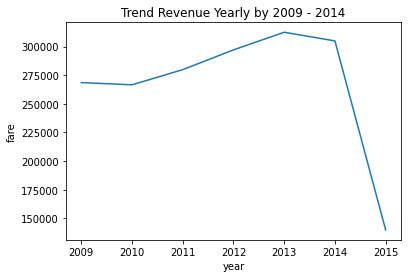

In [ ]:
sns.lineplot(x=dfm4_999['year'],y=dfm4_999['fare'], data=dfm4_999).set(title = "Trend Revenue Yearly by 2009 - 2014")

In [ ]:
dfm4_888 = dfm4.groupby(['year'])['fare'].agg('mean').reset_index()
dfm4_888

year       fare
0  2009   9.230489
1  2010   9.358707
2  2011   9.507865
3  2012  10.111882
4  2013  11.130876
5  2014  11.316715
6  2015  11.233351

# CLUSTER ANALYSIS

## Data Preparation

In [ ]:
dfd_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183859 entries, 0 to 183858
Data columns (total 19 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   key_y              183859 non-null  object        
 1   fare_amount        183859 non-null  float64       
 2   pickup_datetime    183859 non-null  datetime64[ns]
 3   pickup_date        183859 non-null  object        
 4   pickup_day         183859 non-null  object        
 5   day_category       183859 non-null  object        
 6   pickup_longitude   183859 non-null  float64       
 7   pickup_latitude    183859 non-null  float64       
 8   dropoff_longitude  183859 non-null  float64       
 9   dropoff_latitude   183859 non-null  float64       
 10  passenger_count    183859 non-null  int64         
 11  distance_km        183859 non-null  float64       
 12  distance_lvl       183859 non-null  object        
 13  pickup_day_num     183859 non-null  int64   

In [ ]:
dfd_cluster = dfd_clean.copy()

In [ ]:
conditions = [
    (dfd_cluster['pickup_hour'] >= 5) & (dfd_cluster['pickup_hour'] <= 11),
    (dfd_cluster['pickup_hour'] >= 12) & (dfd_cluster['pickup_hour'] <= 17),
    (dfd_cluster['pickup_hour'] >= 18) & (dfd_cluster['pickup_hour'] <= 21),
    (dfd_cluster['pickup_hour'] <= 4) | (dfd_cluster['pickup_hour'] >= 22)
]
    
values = ['morning','afternoon','evening','night']

dfd_cluster['day_part'] = np.select(conditions, values)
dfd_cluster

key_y  fare_amount     pickup_datetime  \
0         2015-05-07 19:52:06.0000003          7.5 2015-05-07 19:52:06   
1         2009-07-17 20:04:56.0000002          7.7 2009-07-17 20:04:56   
2        2009-08-24 21:45:00.00000061         12.9 2009-08-24 21:45:00   
3         2009-06-26 08:22:21.0000001          5.3 2009-06-26 08:22:21   
4       2014-08-28 17:47:00.000000188         16.0 2014-08-28 17:47:00   
...                               ...          ...                 ...   
183854   2012-10-28 10:49:00.00000053          3.0 2012-10-28 10:49:00   
183855    2014-03-14 01:09:00.0000008          7.5 2014-03-14 01:09:00   
183856   2009-06-29 00:42:00.00000078         30.9 2009-06-29 00:42:00   
183857    2015-05-20 14:56:25.0000004         14.5 2015-05-20 14:56:25   
183858   2010-05-15 04:08:00.00000076         14.1 2010-05-15 04:08:00   

       pickup_date pickup_day day_category  pickup_longitude  pickup_latitude  \
0       2015-05-07   Thursday     Weekdays        -73.999817        40.738354   
1       2009-07-17     Friday     Weekdays        -73.994355        40.728225   
2       2009-08-24     Monday     Weekdays        -74.005043        40.740770   
3       2009-06-26     Friday     Weekdays        -73.976124        40.790844   
4       2014-08-28   Thursday     Weekdays        -73.925023        40.744085   
...            ...        ...          ...               ...              ...   
183854  2012-10-28     Sunday      Weekend        -73.987042        40.739367   
183855  2014-03-14     Friday     Weekdays        -73.984722        40.736837   
183856  2009-06-29     Monday     Weekdays        -73.986017        40.756487   
183857  2015-05-20  Wednesday     Weekdays        -73.997124        40.725452   
183858  2010-05-15   Saturday      Weekend        -73.984395        40.720077   

        dropoff_longitude  dropoff_latitude  passenger_count  distance_km  \
0              -73.999512         40.723217                1     1.683349   
1              -73.994710         40.750325                1     2.457628   
2              -73.962565         40.772647                1     5.036456   
3              -73.965316         40.803349                3     1.661710   
4              -73.973082         40.761247                5     4.475520   
...                   ...               ...              ...          ...   
183854         -73.986525         40.740297                1     0.112212   
183855         -74.006672         40.739620                1     1.875080   
183856         -73.858957         40.692588                2    12.850521   
183857         -73.983215         40.695416                1     3.539771   
183858         -73.985508         40.768793                1     5.417869   

       distance_lvl  pickup_day_num  pickup_year  pickup_month  pickup_hour  \
0              Near               7         2015             5           19   
1              Near              17         2009             7           20   
2          Moderate              24         2009             8           21   
3              Near              26         2009             6            8   
4              Near              28         2014             8           17   
...             ...             ...          ...           ...          ...   
183854         Near              28         2012            10           10   
183855         Near              14         2014             3            1   
183856          Far              29         2009             6            0   
183857         Near              20         2015             5           14   
183858     Moderate              15         2010             5            4   

        distance_miles month_year   day_part  
0             1.045984    2015-05    evening  
1             1.527099    2009-07    evening  
2             3.129508    2009-08    evening  
3             1.032538    2009-06    morning  
4             2.780958    2014-08  afternoon  
...           

In [ ]:
dfd_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183859 entries, 0 to 183858
Data columns (total 20 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   key_y              183859 non-null  object        
 1   fare_amount        183859 non-null  float64       
 2   pickup_datetime    183859 non-null  datetime64[ns]
 3   pickup_date        183859 non-null  object        
 4   pickup_day         183859 non-null  object        
 5   day_category       183859 non-null  object        
 6   pickup_longitude   183859 non-null  float64       
 7   pickup_latitude    183859 non-null  float64       
 8   dropoff_longitude  183859 non-null  float64       
 9   dropoff_latitude   183859 non-null  float64       
 10  passenger_count    183859 non-null  int64         
 11  distance_km        183859 non-null  float64       
 12  distance_lvl       183859 non-null  object        
 13  pickup_day_num     183859 non-null  int64   

In [ ]:
cluster_modify = dfd_cluster[['fare_amount','day_category','passenger_count','distance_km','day_part']]
cluster_modify

fare_amount day_category  passenger_count  distance_km   day_part
0               7.5     Weekdays                1     1.683349    evening
1               7.7     Weekdays                1     2.457628    evening
2              12.9     Weekdays                1     5.036456    evening
3               5.3     Weekdays                3     1.661710    morning
4              16.0     Weekdays                5     4.475520  afternoon
...             ...          ...              ...          ...        ...
183854          3.0      Weekend                1     0.112212    morning
183855          7.5     Weekdays                1     1.875080      night
183856         30.9     Weekdays                2    12.850521      night
183857         14.5     Weekdays                1     3.539771  afternoon
183858         14.1      Weekend                1     5.417869      night

[183859 rows x 5 columns]

In [ ]:
cluster_num = cluster_modify.select_dtypes(include='number').columns.tolist()
cluster_cat = cluster_modify.select_dtypes(exclude='number').columns.tolist()

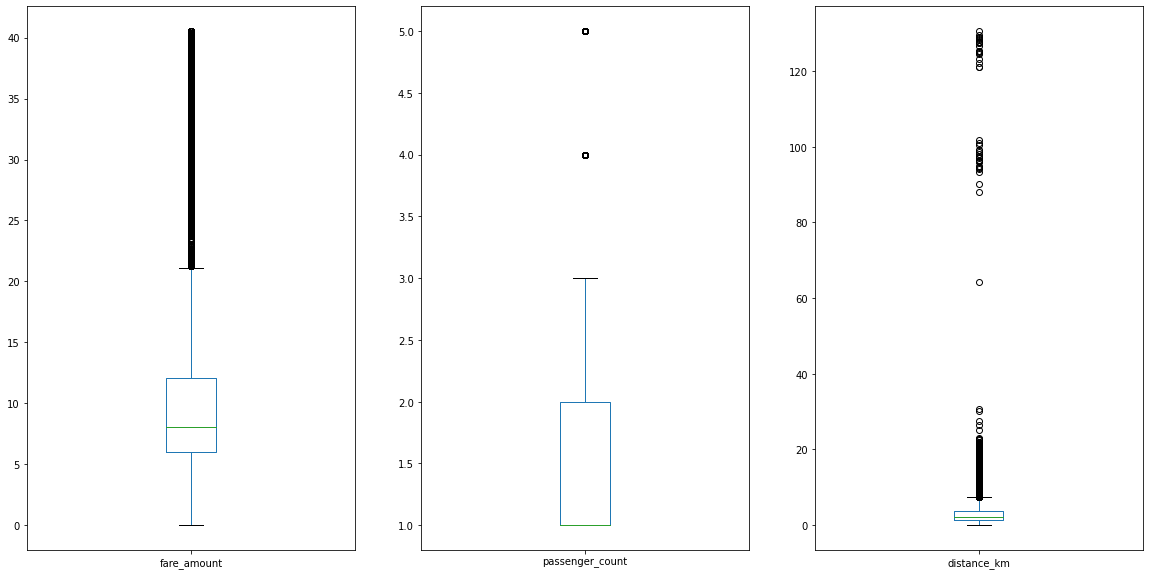

In [ ]:
fig, axes = plt.subplots(1,3, figsize=(20,10))

for i, n in enumerate(cluster_num) :
  a = cluster_modify.boxplot(n, ax=axes.flatten()[i],grid=False)
plt.show()

In [ ]:
scaler = RobustScaler()
cluster_modify[cluster_num] = scaler.fit_transform(cluster_modify[cluster_num])
cluster_modify

fare_amount day_category  passenger_count  distance_km   day_part
0         -0.098361     Weekdays              0.0    -0.180214    evening
1         -0.065574     Weekdays              0.0     0.133111    evening
2          0.786885     Weekdays              0.0     1.176677    evening
3         -0.459016     Weekdays              2.0    -0.188971    morning
4          1.295082     Weekdays              4.0     0.949684  afternoon
...             ...          ...              ...          ...        ...
183854    -0.836066      Weekend              0.0    -0.816001    morning
183855    -0.098361     Weekdays              0.0    -0.102627      night
183856     3.737705     Weekdays              1.0     4.338768      night
183857     1.049180     Weekdays              0.0     0.571018  afternoon
183858     0.983607      Weekend              0.0     1.331021      night

[183859 rows x 5 columns]

In [ ]:
scaler = MinMaxScaler()
cluster_modify[cluster_num] = scaler.fit_transform(cluster_modify[cluster_num])
cluster_modify

fare_amount day_category  passenger_count  distance_km   day_part
0          0.184801     Weekdays             0.00     0.012894    evening
1          0.189736     Weekdays             0.00     0.018825    evening
2          0.318036     Weekdays             0.00     0.038580    evening
3          0.130521     Weekdays             0.50     0.012728    morning
4          0.394523     Weekdays             1.00     0.034283  afternoon
...             ...          ...              ...          ...        ...
183854     0.073773      Weekend             0.00     0.000859    morning
183855     0.184801     Weekdays             0.00     0.014363      night
183856     0.762151     Weekdays             0.25     0.098437      night
183857     0.357513     Weekdays             0.00     0.027115  afternoon
183858     0.347644      Weekend             0.00     0.041501      night

[183859 rows x 5 columns]

In [ ]:
for i in cluster_cat :
  dum_df = pd.get_dummies(cluster_modify,columns=[i], prefix=[i])
  cluster_modify = cluster_modify.merge(dum_df)

In [ ]:
cluster_modify

fare_amount day_category  passenger_count  distance_km   day_part  \
0          0.184801     Weekdays             0.00     0.012894    evening   
1          0.189736     Weekdays             0.00     0.018825    evening   
2          0.318036     Weekdays             0.00     0.038580    evening   
3          0.130521     Weekdays             0.50     0.012728    morning   
4          0.394523     Weekdays             1.00     0.034283  afternoon   
...             ...          ...              ...          ...        ...   
183854     0.073773      Weekend             0.00     0.000859    morning   
183855     0.184801     Weekdays             0.00     0.014363      night   
183856     0.762151     Weekdays             0.25     0.098437      night   
183857     0.357513     Weekdays             0.00     0.027115  afternoon   
183858     0.347644      Weekend             0.00     0.041501      night   

        day_category_Weekdays  day_category_Weekend  day_part_afternoon  \
0                           1                     0                   0   
1                           1                     0                   0   
2                           1                     0                   0   
3                           1                     0                   0   
4                           1                     0                   1   
...                       ...                   ...                 ...   
183854                      0                     1                   0   
183855                      1                     0                   0   
183856                      1                     0                   0   
183857                      1                     0                   1   
183858                      0                     1                   0   

        day_part_evening  day_part_morning  day_part_night  
0                      1                 0               0  
1                      1                 0               0  
2                      1                 0               0  
3                      0                 1               0  
4                      0                 0               0  
...                  ...               ...             ...  
183854                 0                 1               0  
183855                 0                 0               1  
183856                 0                 0               1  
183857                 0                 0               0  
183858                 0                 0               1  

[183859 rows x 11 columns]

In [ ]:
cluster_modify.drop(['day_category','day_part'], axis=1, inplace=True)

## Elbow Method

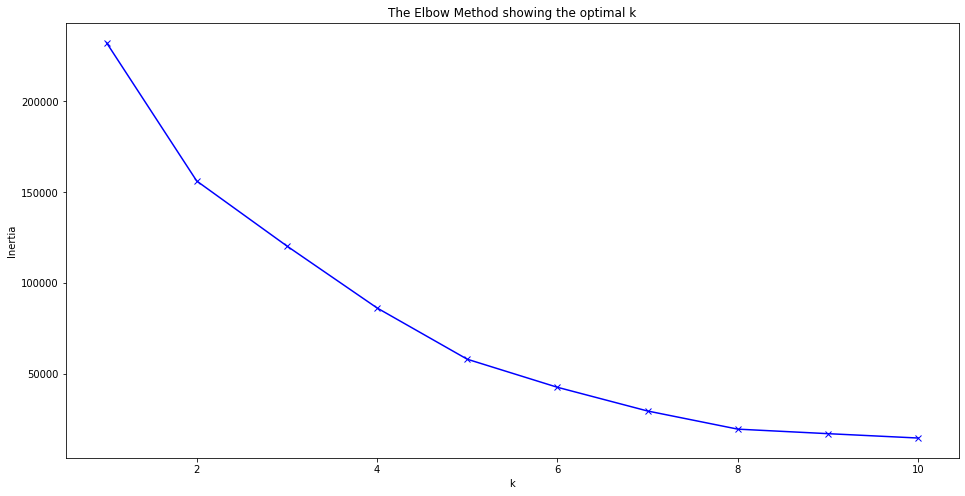

In [ ]:
distortions = []
K = range(1,11)
for k in K:
    kmeanModel = cluster.KMeans(n_clusters=k)
    kmeanModel.fit(cluster_modify)
    distortions.append(kmeanModel.inertia_)

plt.figure(figsize=(16,8))
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## Silhouette Analysis

For n_clusters = 2 The average silhouette_score is : 0.37868246745259454
For n_clusters = 3 The average silhouette_score is : 0.3837549402159893
For n_clusters = 4 The average silhouette_score is : 0.5142471811447695
For n_clusters = 5 The average silhouette_score is : 0.6127127287619264
For n_clusters = 6 The average silhouette_score is : 0.6757573634974395
For n_clusters = 7 The average silhouette_score is : 0.7300198890993148
For n_clusters = 8 The average silhouette_score is : 0.7716716107584333
For n_clusters = 9 The average silhouette_score is : 0.754455935782153
For n_clusters = 10 The average silhouette_score is : 0.7478707939443253


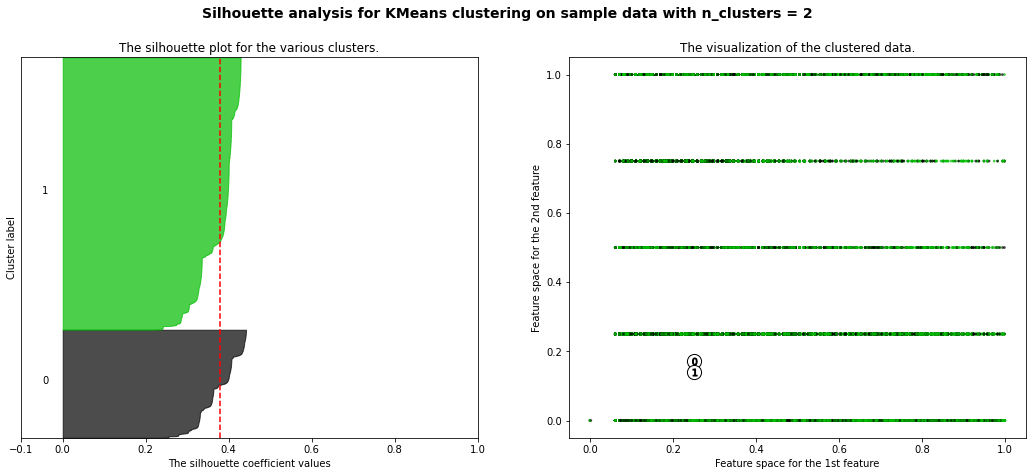

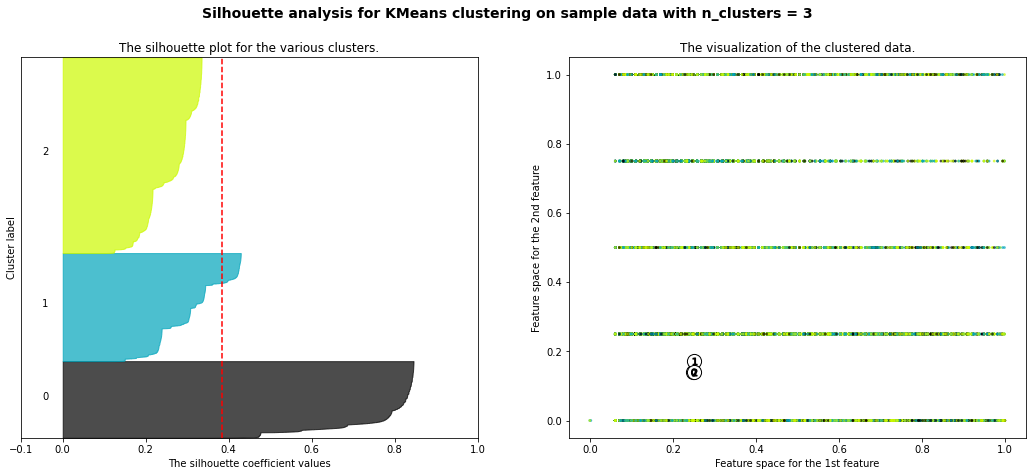

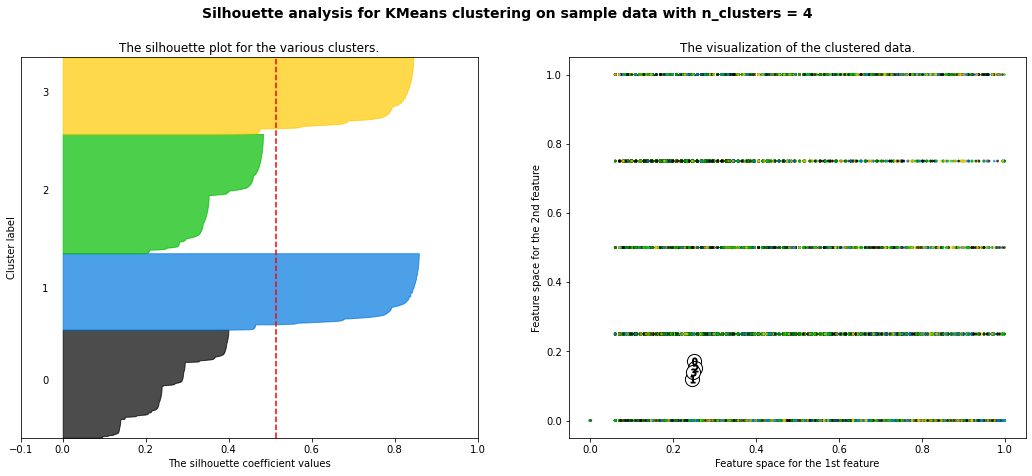

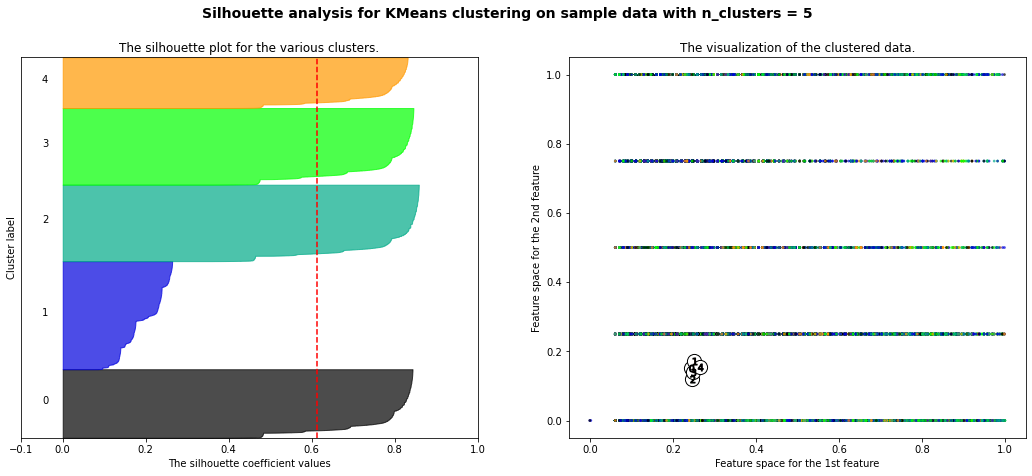

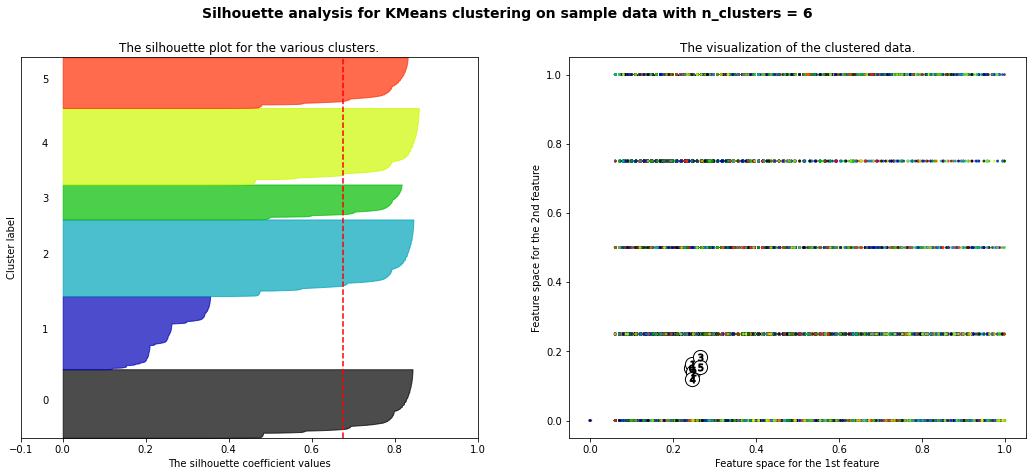

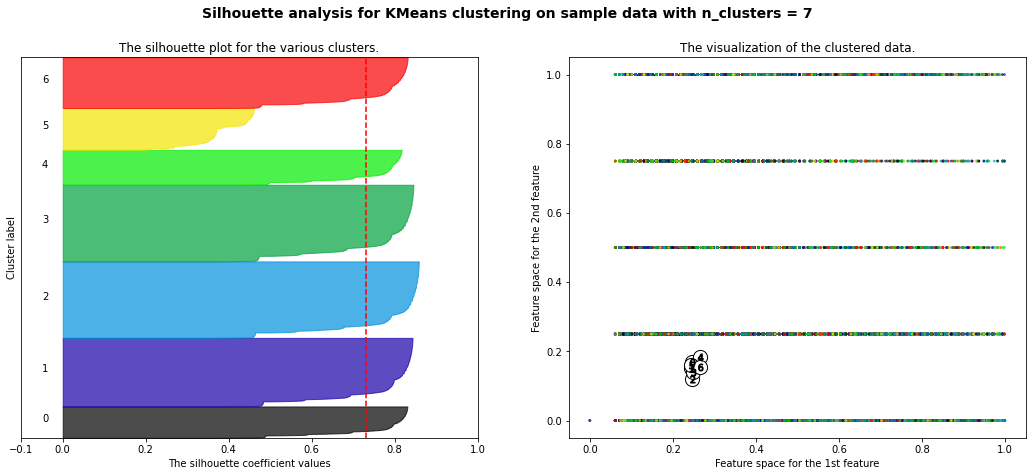

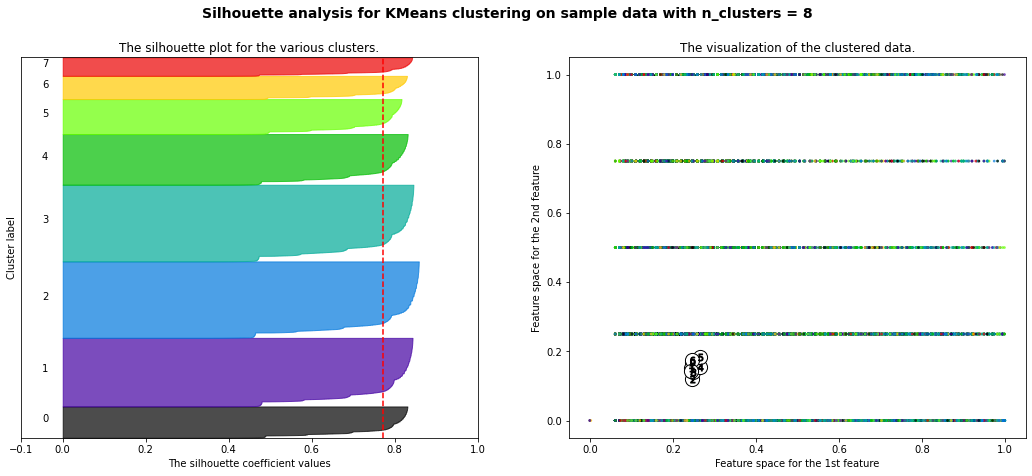

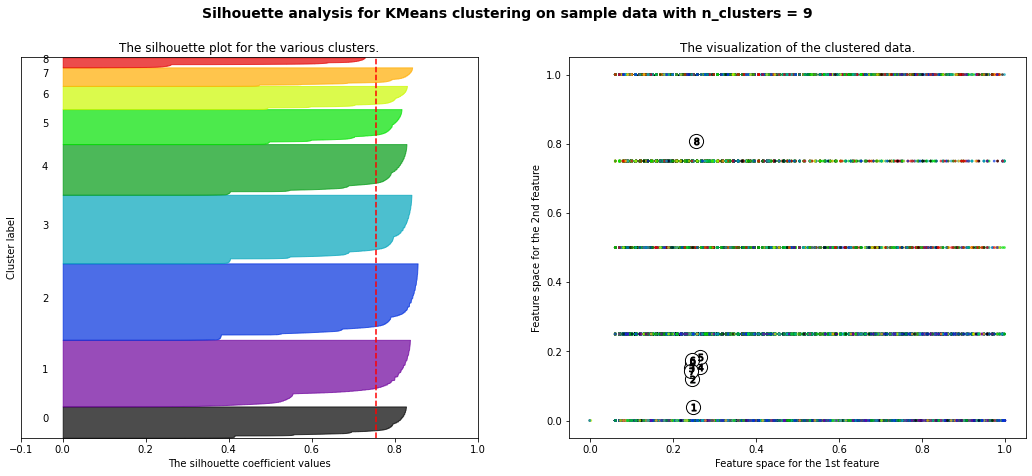

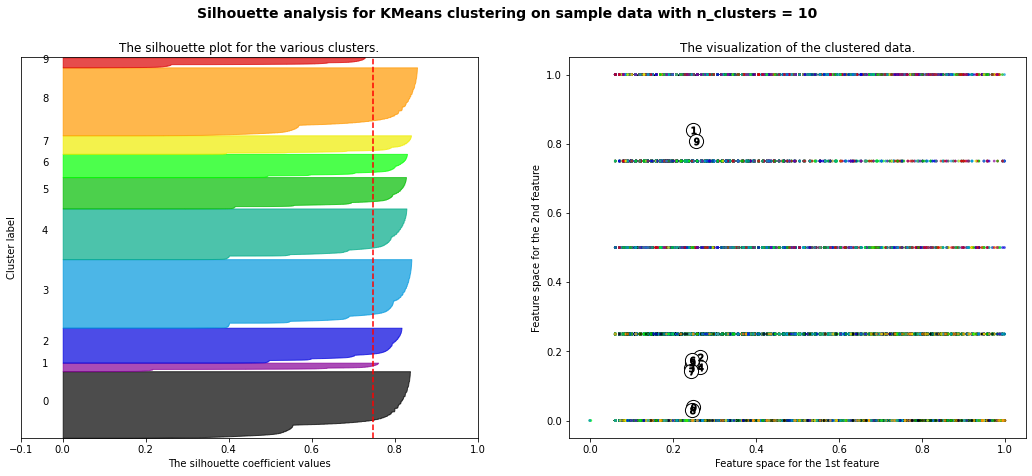

In [ ]:
silhoutte_analysis(cluster_modify,list(range(2,11)))

## Analysis

In [ ]:
cluster_model = cluster.KMeans(n_clusters=8)
cluster_model.fit(cluster_modify)
cluster_label = cluster_model.labels_
dfd_cluster['cluster'] = cluster_label
dfd_cluster

key_y  fare_amount     pickup_datetime  \
0         2015-05-07 19:52:06.0000003          7.5 2015-05-07 19:52:06   
1         2009-07-17 20:04:56.0000002          7.7 2009-07-17 20:04:56   
2        2009-08-24 21:45:00.00000061         12.9 2009-08-24 21:45:00   
3         2009-06-26 08:22:21.0000001          5.3 2009-06-26 08:22:21   
4       2014-08-28 17:47:00.000000188         16.0 2014-08-28 17:47:00   
...                               ...          ...                 ...   
183854   2012-10-28 10:49:00.00000053          3.0 2012-10-28 10:49:00   
183855    2014-03-14 01:09:00.0000008          7.5 2014-03-14 01:09:00   
183856   2009-06-29 00:42:00.00000078         30.9 2009-06-29 00:42:00   
183857    2015-05-20 14:56:25.0000004         14.5 2015-05-20 14:56:25   
183858   2010-05-15 04:08:00.00000076         14.1 2010-05-15 04:08:00   

       pickup_date pickup_day day_category  pickup_longitude  pickup_latitude  \
0       2015-05-07   Thursday     Weekdays        -73.999817        40.738354   
1       2009-07-17     Friday     Weekdays        -73.994355        40.728225   
2       2009-08-24     Monday     Weekdays        -74.005043        40.740770   
3       2009-06-26     Friday     Weekdays        -73.976124        40.790844   
4       2014-08-28   Thursday     Weekdays        -73.925023        40.744085   
...            ...        ...          ...               ...              ...   
183854  2012-10-28     Sunday      Weekend        -73.987042        40.739367   
183855  2014-03-14     Friday     Weekdays        -73.984722        40.736837   
183856  2009-06-29     Monday     Weekdays        -73.986017        40.756487   
183857  2015-05-20  Wednesday     Weekdays        -73.997124        40.725452   
183858  2010-05-15   Saturday      Weekend        -73.984395        40.720077   

        dropoff_longitude  dropoff_latitude  ...  distance_km  distance_lvl  \
0              -73.999512         40.723217  ...     1.683349          Near   
1              -73.994710         40.750325  ...     2.457628          Near   
2              -73.962565         40.772647  ...     5.036456      Moderate   
3              -73.965316         40.803349  ...     1.661710          Near   
4              -73.973082         40.761247  ...     4.475520          Near   
...                   ...               ...  ...          ...           ...   
183854         -73.986525         40.740297  ...     0.112212          Near   
183855         -74.006672         40.739620  ...     1.875080          Near   
183856         -73.858957         40.692588  ...    12.850521           Far   
183857         -73.983215         40.695416  ...     3.539771          Near   
183858         -73.985508         40.768793  ...     5.417869      Moderate   

       pickup_day_num  pickup_year  pickup_month  pickup_hour  distance_miles  \
0                   7         2015             5           19        1.045984   
1                  17         2009             7           20        1.527099   
2                  24         2009             8           21        3.129508   
3                  26         2009             6            8        1.032538   
4                  28         2014             8           17        2.780958   
...               ...          ...           ...          ...             ...   
183854             28         2012            10           10        0.069725   
183855             14         2014             3            1        1.165120   
183856             29         2009             6            0        7.984941   
183857             20         2015             5           14        2.199511   
183858             15         2010             5            4        3.366506   

        month_year   day_part cluster  
0          2015-05    evening       2  
1          2009-07    evening       2  
2          2009-08    evening       2  
3          2009-06    morning       3  
4          2014-08  afternoon       0  
...     

In [ ]:
dfd_cluster.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183859 entries, 0 to 183858
Data columns (total 21 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   key_y              183859 non-null  object        
 1   fare_amount        183859 non-null  float64       
 2   pickup_datetime    183859 non-null  datetime64[ns]
 3   pickup_date        183859 non-null  object        
 4   pickup_day         183859 non-null  object        
 5   day_category       183859 non-null  object        
 6   pickup_longitude   183859 non-null  float64       
 7   pickup_latitude    183859 non-null  float64       
 8   dropoff_longitude  183859 non-null  float64       
 9   dropoff_latitude   183859 non-null  float64       
 10  passenger_count    183859 non-null  int64         
 11  distance_km        183859 non-null  float64       
 12  distance_lvl       183859 non-null  object        
 13  pickup_day_num     183859 non-null  int64   

In [ ]:
#dfd_cluster.to_csv('uber_clean_clustered.csv')

In [ ]:
grouped = dfd_cluster.groupby('cluster',as_index=False)

In [ ]:
list_num_cluster = ['fare_amount','distance_km','passenger_count','pickup_hour']
list_cat_cluster = dfd_cluster.select_dtypes(include='object')
list_cat_cluster 

key_y pickup_date pickup_day day_category  \
0         2015-05-07 19:52:06.0000003  2015-05-07   Thursday     Weekdays   
1         2009-07-17 20:04:56.0000002  2009-07-17     Friday     Weekdays   
2        2009-08-24 21:45:00.00000061  2009-08-24     Monday     Weekdays   
3         2009-06-26 08:22:21.0000001  2009-06-26     Friday     Weekdays   
4       2014-08-28 17:47:00.000000188  2014-08-28   Thursday     Weekdays   
...                               ...         ...        ...          ...   
183854   2012-10-28 10:49:00.00000053  2012-10-28     Sunday      Weekend   
183855    2014-03-14 01:09:00.0000008  2014-03-14     Friday     Weekdays   
183856   2009-06-29 00:42:00.00000078  2009-06-29     Monday     Weekdays   
183857    2015-05-20 14:56:25.0000004  2015-05-20  Wednesday     Weekdays   
183858   2010-05-15 04:08:00.00000076  2010-05-15   Saturday      Weekend   

       distance_lvl   day_part  
0              Near    evening  
1              Near    evening  
2          Moderate    evening  
3              Near    morning  
4              Near  afternoon  
...             ...        ...  
183854         Near    morning  
183855         Near      night  
183856          Far      night  
183857         Near  afternoon  
183858     Moderate      night  

[183859 rows x 6 columns]

In [ ]:
num = grouped[list_num_cluster].agg(['mean','max','min','count'])
num

fare_amount                     distance_km                        \
               mean    max   min  count        mean         max       min   
cluster                                                                     
0         10.134378  40.54  2.50  37043    2.679002  127.768598  0.000111   
1          9.942700  40.33  0.11  11215    2.943373  127.567414  0.000140   
2          9.900474  40.50  0.01  33136    2.938559  129.612128  0.000084   
3          9.996863  40.54  2.50  36955    2.781177  130.544448  0.000139   
4         10.736956  40.50  2.50  24505    3.562494  121.135402  0.000084   
5          9.976437  40.50  0.01  15155    2.870381  128.723408  0.000084   
6         10.777401  40.50  2.50  16886    3.520912  127.410506  0.000111   
7          9.886594  40.50  2.50   8964    3.122904   93.181504  0.000084   

               passenger_count                pickup_hour                 
         count            mean max min  count        mean max min  count  
cluster                                                                   
0        37043        1.558540   5   1  37043   14.446130  17  12  37043  
1        11215        1.701382   5   1  11215   19.459385  21  18  11215  
2        33136        1.602034   5   1  33136   19.478241  21  18  33136  
3        36955        1.479313   5   1  36955    8.602084  11   5  36955  
4        24505        1.616160   5   1  24505   13.395674  23   0  24505  
5        15155        1.676015   5   1  15155   14.433190  17  12  15155  
6        16886        1.735817   5   1  16886    8.083323  23   0  16886  
7         8964        1.576640   5   1   8964    9.073516  11   5   8964

In [ ]:
df_day= pd.pivot_table(dfd_cluster, values='key_y', index=['cluster'], columns =['day_category'], aggfunc='count')
df_day

day_category  Weekdays  Weekend
cluster                        
0              37043.0      NaN
1                  NaN  11215.0
2              33136.0      NaN
3              36955.0      NaN
4              24505.0      NaN
5                  NaN  15155.0
6                  NaN  16886.0
7                  NaN   8964.0

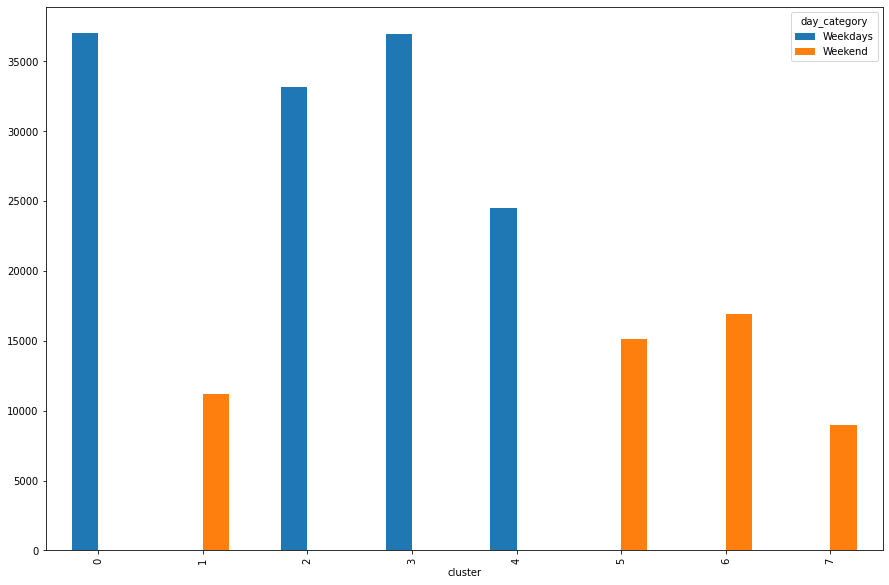

In [ ]:
df_day.plot(kind='bar',figsize=(15,10))

In [ ]:
df_distance= pd.pivot_table(dfd_cluster, values='key_y', index=['cluster'], columns =['distance_lvl'], aggfunc='count')
df_distance

distance_lvl   Far  Moderate   Near
cluster                            
0              892      3578  32573
1              252      1361   9602
2              802      3867  28467
3              801      4167  31987
4             1094      4563  18848
5              369      1715  13071
6              687      3041  13158
7              304      1270   7390

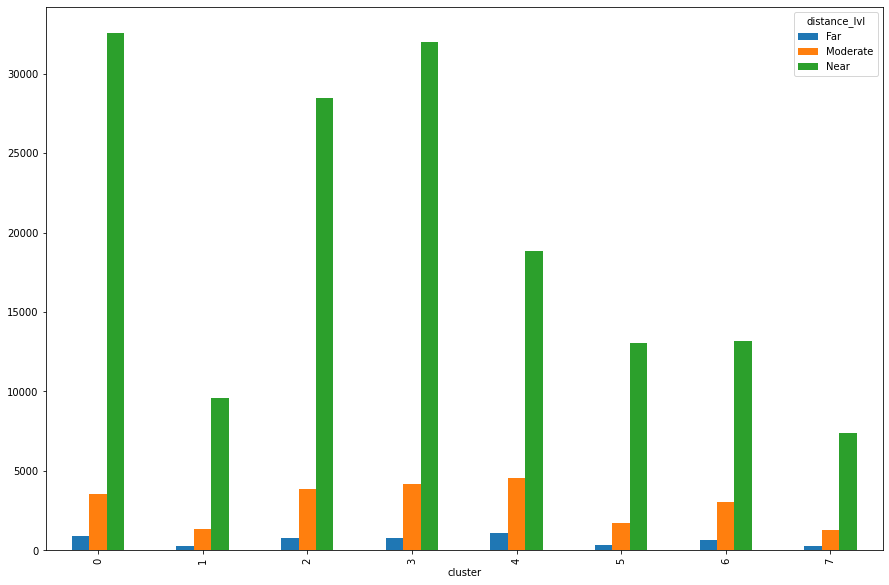

In [ ]:
df_distance.plot(kind='bar',figsize=(15,10))

In [ ]:
df_day_part= pd.pivot_table(dfd_cluster, values='key_y', index=['cluster'], columns =['day_part'], aggfunc='count')
df_day_part

day_part  afternoon  evening  morning    night
cluster                                       
0           37043.0      NaN      NaN      NaN
1               NaN  11215.0      NaN      NaN
2               NaN  33136.0      NaN      NaN
3               NaN      NaN  36955.0      NaN
4               NaN      NaN      NaN  24505.0
5           15155.0      NaN      NaN      NaN
6               NaN      NaN      NaN  16886.0
7               NaN      NaN   8964.0      NaN

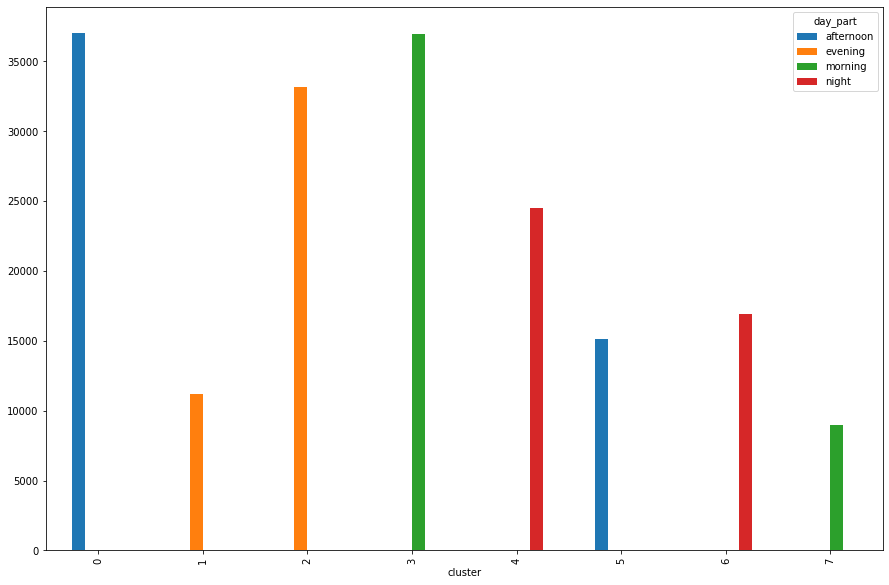

In [ ]:
df_day_part.plot(kind='bar',figsize=(15,10))

In [ ]:
features = cluster_modify.columns.tolist()
features

['fare_amount',
 'passenger_count',
 'distance_km',
 'day_category_Weekdays',
 'day_category_Weekend',
 'day_part_afternoon',
 'day_part_evening',
 'day_part_morning',
 'day_part_night']

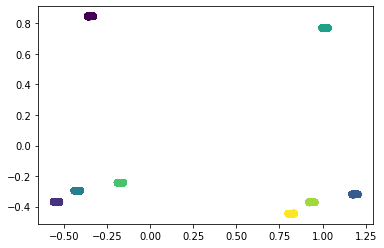

In [ ]:
# Let's try arbitrarily 8 clusters using PCA Method
km = cluster.KMeans(n_clusters=8)
cluster_modify['cluster'] = km.fit_predict(cluster_modify[features])

# Principal Component Analysis (PCA) is an unsupervised machine learning technique that attempts to derive a set of low-dimensional set of features from a much larger set.
# Principal Component Analysis (PCA) is used for Visualizing High-Dimensional Data.
pca = decomposition.PCA()
cluster_modify['x'] = pca.fit_transform(cluster_modify[features])[:, 0]
cluster_modify['y'] = pca.fit_transform(cluster_modify[features])[:, 1]
plt.scatter(cluster_modify['x'], cluster_modify['y'], c=cluster_modify['cluster'])
plt.show()

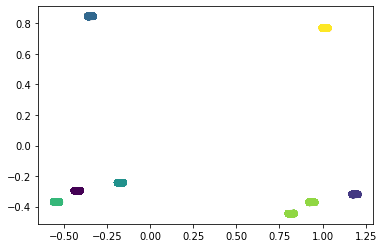

In [ ]:
# Let's try arbitrarily 8 clusters using PCA Method
km = cluster.KMeans(n_clusters=7)
cluster_modify['cluster'] = km.fit_predict(cluster_modify[features])

# Principal Component Analysis (PCA) is an unsupervised machine learning technique that attempts to derive a set of low-dimensional set of features from a much larger set.
# Principal Component Analysis (PCA) is used for Visualizing High-Dimensional Data.
pca = decomposition.PCA()
cluster_modify['x'] = pca.fit_transform(cluster_modify[features])[:, 0]
cluster_modify['y'] = pca.fit_transform(cluster_modify[features])[:, 1]
plt.scatter(cluster_modify['x'], cluster_modify['y'], c=cluster_modify['cluster'])
plt.show()

# FORECASTING - EXPECTED OUTCOME

## Time series Prophet

In [ ]:
!pip install prophet

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
df_fc = dfd_clean[['key_y','pickup_datetime']]
df_fc.columns = ['key','datetime']
df_fc.head()

key            datetime
0    2015-05-07 19:52:06.0000003 2015-05-07 19:52:06
1    2009-07-17 20:04:56.0000002 2009-07-17 20:04:56
2   2009-08-24 21:45:00.00000061 2009-08-24 21:45:00
3    2009-06-26 08:22:21.0000001 2009-06-26 08:22:21
4  2014-08-28 17:47:00.000000188 2014-08-28 17:47:00

In [ ]:
df_fc['year'] = df_fc['datetime'].dt.year
df_fc.head()

key            datetime  year
0    2015-05-07 19:52:06.0000003 2015-05-07 19:52:06  2015
1    2009-07-17 20:04:56.0000002 2009-07-17 20:04:56  2009
2   2009-08-24 21:45:00.00000061 2009-08-24 21:45:00  2009
3    2009-06-26 08:22:21.0000001 2009-06-26 08:22:21  2009
4  2014-08-28 17:47:00.000000188 2014-08-28 17:47:00  2014

In [ ]:
df_fc['date'] = df_fc['datetime'].dt.date
df_fc

key            datetime  year        date
0         2015-05-07 19:52:06.0000003 2015-05-07 19:52:06  2015  2015-05-07
1         2009-07-17 20:04:56.0000002 2009-07-17 20:04:56  2009  2009-07-17
2        2009-08-24 21:45:00.00000061 2009-08-24 21:45:00  2009  2009-08-24
3         2009-06-26 08:22:21.0000001 2009-06-26 08:22:21  2009  2009-06-26
4       2014-08-28 17:47:00.000000188 2014-08-28 17:47:00  2014  2014-08-28
...                               ...                 ...   ...         ...
183854   2012-10-28 10:49:00.00000053 2012-10-28 10:49:00  2012  2012-10-28
183855    2014-03-14 01:09:00.0000008 2014-03-14 01:09:00  2014  2014-03-14
183856   2009-06-29 00:42:00.00000078 2009-06-29 00:42:00  2009  2009-06-29
183857    2015-05-20 14:56:25.0000004 2015-05-20 14:56:25  2015  2015-05-20
183858   2010-05-15 04:08:00.00000076 2010-05-15 04:08:00  2010  2010-05-15

[183859 rows x 4 columns]

In [ ]:
#2012 - 2015
df_fc2012 = df_fc.copy()
df_fc2012 = df_fc2012[(df_fc2012['year'] > 2012)]
df_fc2012

key            datetime  year        date
0         2015-05-07 19:52:06.0000003 2015-05-07 19:52:06  2015  2015-05-07
4       2014-08-28 17:47:00.000000188 2014-08-28 17:47:00  2014  2014-08-28
5         2014-10-12 07:04:00.0000002 2014-10-12 07:04:00  2014  2014-10-12
8         2015-05-22 17:32:27.0000004 2015-05-22 17:32:27  2015  2015-05-22
15        2015-03-25 08:58:35.0000001 2015-03-25 08:58:35  2015  2015-03-25
...                               ...                 ...   ...         ...
183849    2015-05-24 22:05:56.0000002 2015-05-24 22:05:56  2015  2015-05-24
183850    2015-06-08 10:49:14.0000001 2015-06-08 10:49:14  2015  2015-06-08
183853  2014-01-31 14:42:00.000000181 2014-01-31 14:42:00  2014  2014-01-31
183855    2014-03-14 01:09:00.0000008 2014-03-14 01:09:00  2014  2014-03-14
183857    2015-05-20 14:56:25.0000004 2015-05-20 14:56:25  2015  2015-05-20

[67471 rows x 4 columns]

In [ ]:
#2012 - 2015
df_fc3 = df_fc2012.groupby('date')['key'].agg('count').reset_index()
df_fc3.columns = ['date','total order']
df_fc3

date  total order
0    2013-01-01           63
1    2013-01-02           76
2    2013-01-03           67
3    2013-01-04           76
4    2013-01-05           91
..          ...          ...
906  2015-06-26           74
907  2015-06-27           69
908  2015-06-28           56
909  2015-06-29           59
910  2015-06-30           63

[911 rows x 2 columns]

In [ ]:
df_fc3.tail(177)

date  total order
734  2015-01-05           45
735  2015-01-06           56
736  2015-01-07           57
737  2015-01-08           78
738  2015-01-09           57
..          ...          ...
906  2015-06-26           74
907  2015-06-27           69
908  2015-06-28           56
909  2015-06-29           59
910  2015-06-30           63

[177 rows x 2 columns]

Text(0.5, 1.0, 'Trend in trips from Jan 2013 - June 2015 (Daily)')

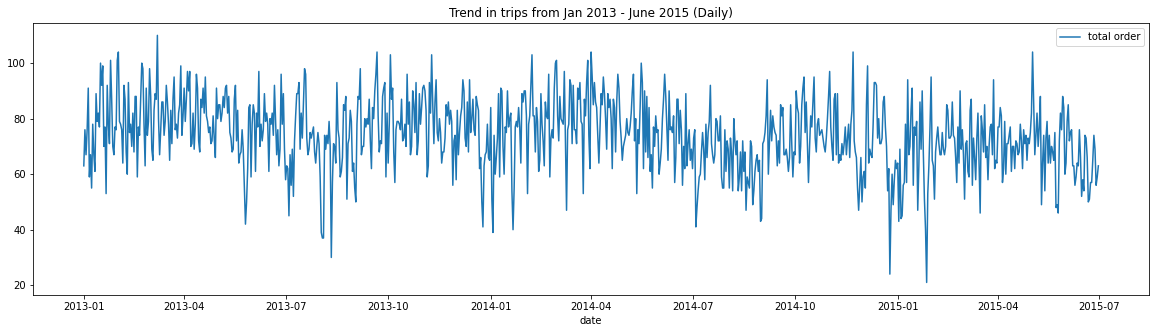

In [ ]:
ax = df_fc3.plot(x='date',y='total order',kind='line',figsize=(20,5))
ax.set_title('Trend in trips from Jan 2013 - June 2015 (Daily)')

In [ ]:
df_fc3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   date         911 non-null    object
 1   total order  911 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 14.4+ KB


In [ ]:
from prophet import Prophet
df_prophet = df_fc3[['date','total order']]
df_prophet.columns = ['ds','y']
df_prophet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      911 non-null    object
 1   y       911 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 14.4+ KB


In [ ]:
m = Prophet()
m.fit(df_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1cwqpzcx/muolu7oj.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1cwqpzcx/szis4sid.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19', 'data', 'file=/tmp/tmp1cwqpzcx/muolu7oj.json', 'init=/tmp/tmp1cwqpzcx/szis4sid.json', 'output', 'file=/tmp/tmp016oiq6a/prophet_model-20220812173629.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
17:36:29 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:36:29 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


In [ ]:
#semester 2 2015 = 6 month = 184 days
future = m.make_future_dataframe(periods=184)
future.tail()

ds
1090 2015-12-27
1091 2015-12-28
1092 2015-12-29
1093 2015-12-30
1094 2015-12-31

In [ ]:
# Python
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

ds       yhat  yhat_lower  yhat_upper
1090 2015-12-27  49.091631   35.758346   61.590789
1091 2015-12-28  45.172671   32.167301   58.393689
1092 2015-12-29  49.627439   36.778436   61.965404
1093 2015-12-30  52.967456   39.878692   66.058036
1094 2015-12-31  54.254522   41.822268   67.775435

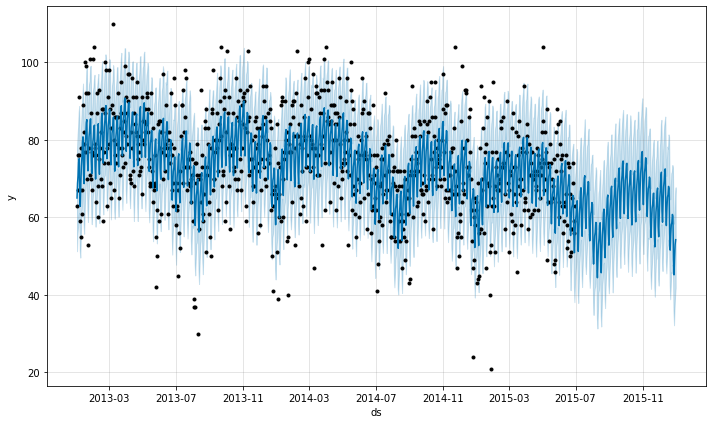

In [ ]:
fig1 = m.plot(forecast)

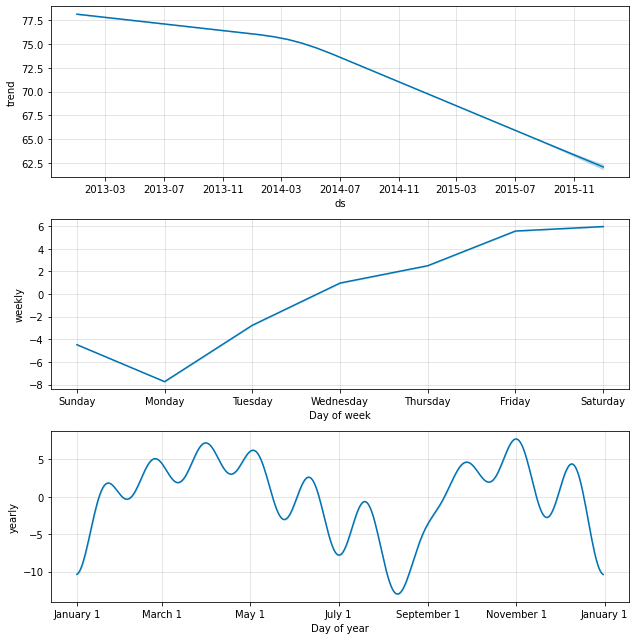

In [ ]:
#See the trend, yearly seasonality, and weekly seasonality of the time series. If you include holidays, you’ll see those here, too
fig11 = m.plot_components(forecast)

In [ ]:
# coba dinaikin - after promotion
forecast2 = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast2

ds       yhat  yhat_lower  yhat_upper
0    2013-01-01  65.008047   51.266154   77.400156
1    2013-01-02  68.904320   55.910156   81.252828
2    2013-01-03  70.740744   57.660450   83.397417
3    2013-01-04  74.235013   60.636016   87.224918
4    2013-01-05  75.175263   61.170703   88.720974
...         ...        ...         ...         ...
1090 2015-12-27  49.091631   35.758346   61.590789
1091 2015-12-28  45.172671   32.167301   58.393689
1092 2015-12-29  49.627439   36.778436   61.965404
1093 2015-12-30  52.967456   39.878692   66.058036
1094 2015-12-31  54.254522   41.822268   67.775435

[1095 rows x 4 columns]

In [ ]:
#keluarin yg juli 2015 s.d dec 2015
forecast3 = forecast2.iloc[911:]
forecast3

ds       yhat  yhat_lower  yhat_upper
911  2015-07-01  59.138431   45.385389   71.782485
912  2015-07-02  60.614218   47.611102   73.310098
913  2015-07-03  63.735518   50.284995   77.670725
914  2015-07-04  64.298410   51.281708   76.965709
915  2015-07-05  54.134677   40.380434   66.532567
...         ...        ...         ...         ...
1090 2015-12-27  49.091631   35.758346   61.590789
1091 2015-12-28  45.172671   32.167301   58.393689
1092 2015-12-29  49.627439   36.778436   61.965404
1093 2015-12-30  52.967456   39.878692   66.058036
1094 2015-12-31  54.254522   41.822268   67.775435

[184 rows x 4 columns]

In [ ]:
a = forecast3['yhat'].agg('sum')
a

11527.785714514383

In [ ]:
#%
(15297 - a)/a * 100

32.696776109742245

In [ ]:
forecast3['yhat'] = forecast3['yhat'] * (1 + (0.35))
forecast3['yhat_lower'] = forecast3['yhat_lower'] * (1 + (0.35))
forecast3['yhat_upper'] = forecast3['yhat_upper'] * (1 + (0.35))
forecast3

ds       yhat  yhat_lower  yhat_upper
911  2015-07-01  79.836882   61.270275   96.906355
912  2015-07-02  81.829194   64.274987   98.968632
913  2015-07-03  86.042949   67.884744  104.855479
914  2015-07-04  86.802854   69.230306  103.903707
915  2015-07-05  73.081814   54.513587   89.818965
...         ...        ...         ...         ...
1090 2015-12-27  66.273702   48.273767   83.147565
1091 2015-12-28  60.983106   43.425857   78.831480
1092 2015-12-29  66.997043   49.650889   83.653296
1093 2015-12-30  71.506065   53.836234   89.178349
1094 2015-12-31  73.243604   56.460062   91.496837

[184 rows x 4 columns]

In [ ]:
forecast4 = forecast2.iloc[:911]
forecast4

ds       yhat  yhat_lower  yhat_upper
0   2013-01-01  65.008047   51.266154   77.400156
1   2013-01-02  68.904320   55.910156   81.252828
2   2013-01-03  70.740744   57.660450   83.397417
3   2013-01-04  74.235013   60.636016   87.224918
4   2013-01-05  75.175263   61.170703   88.720974
..         ...        ...         ...         ...
906 2015-06-26  65.670272   51.491662   78.415095
907 2015-06-27  65.479060   51.621862   78.999275
908 2015-06-28  54.548421   42.150010   67.302807
909 2015-06-29  50.887911   38.137911   63.979279
910 2015-06-30  55.582204   42.588899   69.530698

[911 rows x 4 columns]

In [ ]:
#gabungin sama yg udah di naikin
forecast4 = pd.concat([forecast4,forecast3],axis=0)
forecast4

ds       yhat  yhat_lower  yhat_upper
0    2013-01-01  65.008047   51.266154   77.400156
1    2013-01-02  68.904320   55.910156   81.252828
2    2013-01-03  70.740744   57.660450   83.397417
3    2013-01-04  74.235013   60.636016   87.224918
4    2013-01-05  75.175263   61.170703   88.720974
...         ...        ...         ...         ...
1090 2015-12-27  66.273702   48.273767   83.147565
1091 2015-12-28  60.983106   43.425857   78.831480
1092 2015-12-29  66.997043   49.650889   83.653296
1093 2015-12-30  71.506065   53.836234   89.178349
1094 2015-12-31  73.243604   56.460062   91.496837

[1095 rows x 4 columns]

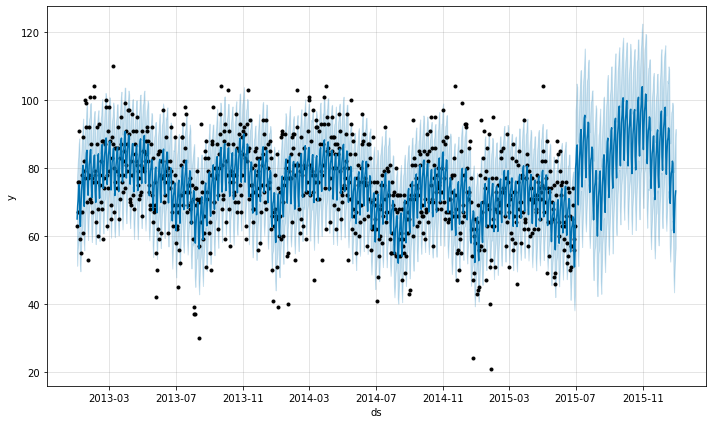

In [ ]:
fig2 = m.plot(forecast4)

In [ ]:
#monthly
df_fc['month'] = df_fc['datetime'].dt.strftime('%m')
df_fc.head()

key            datetime  year        date month
0    2015-05-07 19:52:06.0000003 2015-05-07 19:52:06  2015  2015-05-07    05
1    2009-07-17 20:04:56.0000002 2009-07-17 20:04:56  2009  2009-07-17    07
2   2009-08-24 21:45:00.00000061 2009-08-24 21:45:00  2009  2009-08-24    08
3    2009-06-26 08:22:21.0000001 2009-06-26 08:22:21  2009  2009-06-26    06
4  2014-08-28 17:47:00.000000188 2014-08-28 17:47:00  2014  2014-08-28    08

In [ ]:
#month-day
df_fc['month_year'] = df_fc['year'].astype(str) + '-' + df_fc['month'] + '-01'
df_fc.head()

key            datetime  year        date month  \
0    2015-05-07 19:52:06.0000003 2015-05-07 19:52:06  2015  2015-05-07    05   
1    2009-07-17 20:04:56.0000002 2009-07-17 20:04:56  2009  2009-07-17    07   
2   2009-08-24 21:45:00.00000061 2009-08-24 21:45:00  2009  2009-08-24    08   
3    2009-06-26 08:22:21.0000001 2009-06-26 08:22:21  2009  2009-06-26    06   
4  2014-08-28 17:47:00.000000188 2014-08-28 17:47:00  2014  2014-08-28    08   

   month_year  
0  2015-05-01  
1  2009-07-01  
2  2009-08-01  
3  2009-06-01  
4  2014-08-01

In [ ]:
#2012 - 2015
df_fc2012_ = df_fc.copy()
df_fc2012_ = df_fc2012_[(df_fc2012_['year'] > 2012)]
df_fc2012_

key            datetime  year        date  \
0         2015-05-07 19:52:06.0000003 2015-05-07 19:52:06  2015  2015-05-07   
4       2014-08-28 17:47:00.000000188 2014-08-28 17:47:00  2014  2014-08-28   
5         2014-10-12 07:04:00.0000002 2014-10-12 07:04:00  2014  2014-10-12   
8         2015-05-22 17:32:27.0000004 2015-05-22 17:32:27  2015  2015-05-22   
15        2015-03-25 08:58:35.0000001 2015-03-25 08:58:35  2015  2015-03-25   
...                               ...                 ...   ...         ...   
183849    2015-05-24 22:05:56.0000002 2015-05-24 22:05:56  2015  2015-05-24   
183850    2015-06-08 10:49:14.0000001 2015-06-08 10:49:14  2015  2015-06-08   
183853  2014-01-31 14:42:00.000000181 2014-01-31 14:42:00  2014  2014-01-31   
183855    2014-03-14 01:09:00.0000008 2014-03-14 01:09:00  2014  2014-03-14   
183857    2015-05-20 14:56:25.0000004 2015-05-20 14:56:25  2015  2015-05-20   

       month  month_year  
0         05  2015-05-01  
4         08  2014-08-01  
5         10  2014-10-01  
8         05  2015-05-01  
15        03  2015-03-01  
...      ...         ...  
183849    05  2015-05-01  
183850    06  2015-06-01  
183853    01  2014-01-01  
183855    03  2014-03-01  
183857    05  2015-05-01  

[67471 rows x 6 columns]

In [ ]:
#2012 - 2015
df_fc4 = df_fc2012_.groupby('month_year')['key'].agg('count').reset_index()
df_fc4.columns = ['date','total order']
df_fc4

date  total order
0   2013-01-01         2398
1   2013-02-01         2230
2   2013-03-01         2542
3   2013-04-01         2443
4   2013-05-01         2336
5   2013-06-01         2339
6   2013-07-01         2257
7   2013-08-01         2067
8   2013-09-01         2358
9   2013-10-01         2446
10  2013-11-01         2361
11  2013-12-01         2297
12  2014-01-01         2259
13  2014-02-01         2214
14  2014-03-01         2501
15  2014-04-01         2470
16  2014-05-01         2369
17  2014-06-01         2232
18  2014-07-01         2092
19  2014-08-01         1943
20  2014-09-01         2158
21  2014-10-01         2402
22  2014-11-01         2152
23  2014-12-01         2151
24  2015-01-01         2027
25  2015-02-01         2003
26  2015-03-01         2150
27  2015-04-01         2128
28  2015-05-01         2207
29  2015-06-01         1939

Text(0.5, 1.0, 'Trend in trips from Jan 2013 - June 2015 (Monthly)')

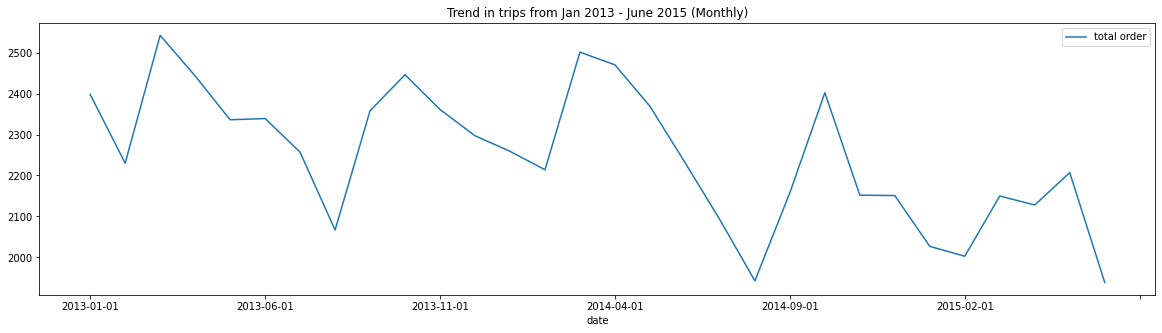

In [ ]:
ax2 = df_fc4.plot(x='date',y='total order',kind='line',figsize=(20,5))
ax2.set_title('Trend in trips from Jan 2013 - June 2015 (Monthly)')

In [ ]:
df_prophet_ = df_fc4[['date','total order']]
df_prophet_.columns = ['ds','y']
df_prophet_.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ds      30 non-null     object
 1   y       30 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 608.0+ bytes


In [ ]:
m_ = Prophet()
m_.fit(df_prophet_)

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1cwqpzcx/zpmnwic9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmp1cwqpzcx/wbpv0bpa.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.7/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17083', 'data', 'file=/tmp/tmp1cwqpzcx/zpmnwic9.json', 'init=/tmp/tmp1cwqpzcx/wbpv0bpa.json', 'output', 'file=/tmp/tmp8_3ysy0v/prophet_model-20220812173634.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
17:36:34 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
17:36:34 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] don

In [ ]:
future_ = m_.make_future_dataframe(periods = 6, freq = "MS")
future_

ds
0  2013-01-01
1  2013-02-01
2  2013-03-01
3  2013-04-01
4  2013-05-01
5  2013-06-01
6  2013-07-01
7  2013-08-01
8  2013-09-01
9  2013-10-01
10 2013-11-01
11 2013-12-01
12 2014-01-01
13 2014-02-01
14 2014-03-01
15 2014-04-01
16 2014-05-01
17 2014-06-01
18 2014-07-01
19 2014-08-01
20 2014-09-01
21 2014-10-01
22 2014-11-01
23 2014-12-01
24 2015-01-01
25 2015-02-01
26 2015-03-01
27 2015-04-01
28 2015-05-01
29 2015-06-01
30 2015-07-01
31 2015-08-01
32 2015-09-01
33 2015-10-01
34 2015-11-01
35 2015-12-01

In [ ]:
# Python
forecast_ = m_.predict(future_)
forecast_[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

ds         yhat   yhat_lower   yhat_upper
0  2013-01-01  2383.843982  2366.128146  2401.301752
1  2013-02-01  2228.638479  2211.785450  2245.269822
2  2013-03-01  2555.245087  2538.577418  2572.600243
3  2013-04-01  2461.411143  2444.523633  2478.864314
4  2013-05-01  2327.369003  2310.979745  2344.033062
5  2013-06-01  2331.365657  2313.674582  2348.480880
6  2013-07-01  2251.967304  2234.800926  2270.431547
7  2013-08-01  2063.533513  2045.463391  2081.469440
8  2013-09-01  2356.721174  2338.716079  2374.402058
9  2013-10-01  2447.350616  2430.312087  2464.219334
10 2013-11-01  2364.774045  2346.880498  2382.246216
11 2013-12-01  2302.251852  2284.984742  2320.834674
12 2014-01-01  2292.264500  2274.311508  2308.982144
13 2014-02-01  2220.365383  2203.321797  2238.088314
14 2014-03-01  2475.551456  2458.933108  2493.326904
15 2014-04-01  2431.709690  2414.820302  2448.528454
16 2014-05-01  2382.626874  2365.763643  2399.226728
17 2014-06-01  2242.084384  2225.578754  2259.876735
18 2014-07-01  2097.050011  2080.206174  2113.617088
19 2014-08-01  1946.478098  1929.339430  1964.631601
20 2014-09-01  2159.296792  2140.884137  2176.406780
21 2014-10-01  2400.669194  2384.321108  2417.481399
22 2014-11-01  2148.242249  2131.072709  2165.156072
23 2014-12-01  2145.751425  2129.008166  2164.554980
24 2015-01-01  2007.884134  1991.091967  2024.614793
25 2015-02-01  1997.987006  1979.917411  2015.815806
26 2015-03-01  2162.173041  2145.004151  2180.952355
27 2015-04-01  2147.864339  2129.751724  2166.190894
28 2015-05-01  2201.981227  2184.786061  2218.942072
29 2015-06-01  1936.537481  1919.073070  1954.552499
30 2015-07-01  1748.934551  1732.021953  1765.365816
31 2015-08-01  1658.680616  1641.513908  1677.058633
32 2015-09-01  1813.904020  1796.105957  1831.993068
33 2015-10-01  2225.434861  2207.105308  2245.189504
34 2015-11-01  1823.420889  1804.542143  1843.385246
35 2015-12-01  1902.080764  1882.432650  1923.090135

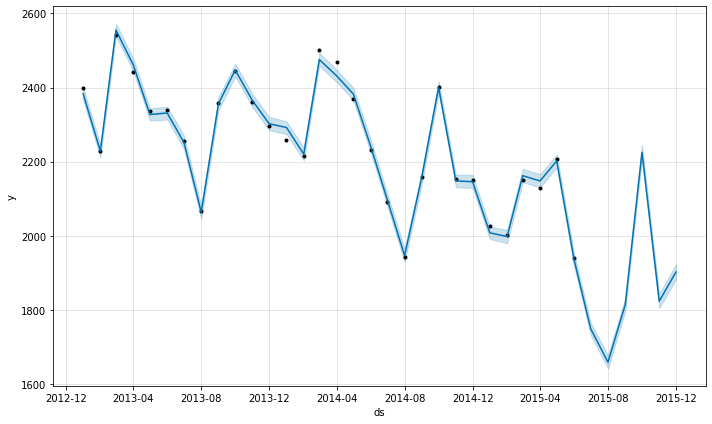

In [ ]:
fig1_ = m_.plot(forecast_)

In [ ]:
# coba dinaikin
forecast2_ = forecast_[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
forecast2_

ds         yhat   yhat_lower   yhat_upper
0  2013-01-01  2383.843982  2366.128146  2401.301752
1  2013-02-01  2228.638479  2211.785450  2245.269822
2  2013-03-01  2555.245087  2538.577418  2572.600243
3  2013-04-01  2461.411143  2444.523633  2478.864314
4  2013-05-01  2327.369003  2310.979745  2344.033062
5  2013-06-01  2331.365657  2313.674582  2348.480880
6  2013-07-01  2251.967304  2234.800926  2270.431547
7  2013-08-01  2063.533513  2045.463391  2081.469440
8  2013-09-01  2356.721174  2338.716079  2374.402058
9  2013-10-01  2447.350616  2430.312087  2464.219334
10 2013-11-01  2364.774045  2346.880498  2382.246216
11 2013-12-01  2302.251852  2284.984742  2320.834674
12 2014-01-01  2292.264500  2274.311508  2308.982144
13 2014-02-01  2220.365383  2203.321797  2238.088314
14 2014-03-01  2475.551456  2458.933108  2493.326904
15 2014-04-01  2431.709690  2414.820302  2448.528454
16 2014-05-01  2382.626874  2365.763643  2399.226728
17 2014-06-01  2242.084384  2225.578754  2259.876735
18 2014-07-01  2097.050011  2080.206174  2113.617088
19 2014-08-01  1946.478098  1929.339430  1964.631601
20 2014-09-01  2159.296792  2140.884137  2176.406780
21 2014-10-01  2400.669194  2384.321108  2417.481399
22 2014-11-01  2148.242249  2131.072709  2165.156072
23 2014-12-01  2145.751425  2129.008166  2164.554980
24 2015-01-01  2007.884134  1991.091967  2024.614793
25 2015-02-01  1997.987006  1979.917411  2015.815806
26 2015-03-01  2162.173041  2145.004151  2180.952355
27 2015-04-01  2147.864339  2129.751724  2166.190894
28 2015-05-01  2201.981227  2184.786061  2218.942072
29 2015-06-01  1936.537481  1919.073070  1954.552499
30 2015-07-01  1748.934551  1732.021953  1765.365816
31 2015-08-01  1658.680616  1641.513908  1677.058633
32 2015-09-01  1813.904020  1796.105957  1831.993068
33 2015-10-01  2225.434861  2207.105308  2245.189504
34 2015-11-01  1823.420889  1804.542143  1843.385246
35 2015-12-01  1902.080764  1882.432650  1923.090135

In [ ]:
#keluarin yg juli 2015 s.d dec 2015
forecast3_ = forecast2_.iloc[30:]
forecast3_

ds         yhat   yhat_lower   yhat_upper
30 2015-07-01  1748.934551  1732.021953  1765.365816
31 2015-08-01  1658.680616  1641.513908  1677.058633
32 2015-09-01  1813.904020  1796.105957  1831.993068
33 2015-10-01  2225.434861  2207.105308  2245.189504
34 2015-11-01  1823.420889  1804.542143  1843.385246
35 2015-12-01  1902.080764  1882.432650  1923.090135

In [ ]:
a_ = forecast3_['yhat'].agg('sum')
a_

11172.455700771012

In [ ]:
#%
(15297 - a_)/a_ * 100

36.917079017322514

In [ ]:
forecast3_['yhat'] = forecast3_['yhat'] * (1 + (0.35))
forecast3_['yhat_lower'] = forecast3_['yhat_lower'] * (1 + (0.35))
forecast3_['yhat_upper'] = forecast3_['yhat_upper'] * (1 + (0.35))
forecast3_

ds         yhat   yhat_lower   yhat_upper
30 2015-07-01  2361.061644  2338.229636  2383.243852
31 2015-08-01  2239.218832  2216.043776  2264.029155
32 2015-09-01  2448.770426  2424.743042  2473.190641
33 2015-10-01  3004.337063  2979.592166  3031.005830
34 2015-11-01  2461.618200  2436.131893  2488.570082
35 2015-12-01  2567.809031  2541.284078  2596.171682

In [ ]:
forecast4_ = forecast2_.iloc[:30]
forecast4_

ds         yhat   yhat_lower   yhat_upper
0  2013-01-01  2383.843982  2366.128146  2401.301752
1  2013-02-01  2228.638479  2211.785450  2245.269822
2  2013-03-01  2555.245087  2538.577418  2572.600243
3  2013-04-01  2461.411143  2444.523633  2478.864314
4  2013-05-01  2327.369003  2310.979745  2344.033062
5  2013-06-01  2331.365657  2313.674582  2348.480880
6  2013-07-01  2251.967304  2234.800926  2270.431547
7  2013-08-01  2063.533513  2045.463391  2081.469440
8  2013-09-01  2356.721174  2338.716079  2374.402058
9  2013-10-01  2447.350616  2430.312087  2464.219334
10 2013-11-01  2364.774045  2346.880498  2382.246216
11 2013-12-01  2302.251852  2284.984742  2320.834674
12 2014-01-01  2292.264500  2274.311508  2308.982144
13 2014-02-01  2220.365383  2203.321797  2238.088314
14 2014-03-01  2475.551456  2458.933108  2493.326904
15 2014-04-01  2431.709690  2414.820302  2448.528454
16 2014-05-01  2382.626874  2365.763643  2399.226728
17 2014-06-01  2242.084384  2225.578754  2259.876735
18 2014-07-01  2097.050011  2080.206174  2113.617088
19 2014-08-01  1946.478098  1929.339430  1964.631601
20 2014-09-01  2159.296792  2140.884137  2176.406780
21 2014-10-01  2400.669194  2384.321108  2417.481399
22 2014-11-01  2148.242249  2131.072709  2165.156072
23 2014-12-01  2145.751425  2129.008166  2164.554980
24 2015-01-01  2007.884134  1991.091967  2024.614793
25 2015-02-01  1997.987006  1979.917411  2015.815806
26 2015-03-01  2162.173041  2145.004151  2180.952355
27 2015-04-01  2147.864339  2129.751724  2166.190894
28 2015-05-01  2201.981227  2184.786061  2218.942072
29 2015-06-01  1936.537481  1919.073070  1954.552499

In [ ]:
#gabungin sama yg udah di naikin
forecast4_ = pd.concat([forecast4_,forecast3_],axis=0)
forecast4_

ds         yhat   yhat_lower   yhat_upper
0  2013-01-01  2383.843982  2366.128146  2401.301752
1  2013-02-01  2228.638479  2211.785450  2245.269822
2  2013-03-01  2555.245087  2538.577418  2572.600243
3  2013-04-01  2461.411143  2444.523633  2478.864314
4  2013-05-01  2327.369003  2310.979745  2344.033062
5  2013-06-01  2331.365657  2313.674582  2348.480880
6  2013-07-01  2251.967304  2234.800926  2270.431547
7  2013-08-01  2063.533513  2045.463391  2081.469440
8  2013-09-01  2356.721174  2338.716079  2374.402058
9  2013-10-01  2447.350616  2430.312087  2464.219334
10 2013-11-01  2364.774045  2346.880498  2382.246216
11 2013-12-01  2302.251852  2284.984742  2320.834674
12 2014-01-01  2292.264500  2274.311508  2308.982144
13 2014-02-01  2220.365383  2203.321797  2238.088314
14 2014-03-01  2475.551456  2458.933108  2493.326904
15 2014-04-01  2431.709690  2414.820302  2448.528454
16 2014-05-01  2382.626874  2365.763643  2399.226728
17 2014-06-01  2242.084384  2225.578754  2259.876735
18 2014-07-01  2097.050011  2080.206174  2113.617088
19 2014-08-01  1946.478098  1929.339430  1964.631601
20 2014-09-01  2159.296792  2140.884137  2176.406780
21 2014-10-01  2400.669194  2384.321108  2417.481399
22 2014-11-01  2148.242249  2131.072709  2165.156072
23 2014-12-01  2145.751425  2129.008166  2164.554980
24 2015-01-01  2007.884134  1991.091967  2024.614793
25 2015-02-01  1997.987006  1979.917411  2015.815806
26 2015-03-01  2162.173041  2145.004151  2180.952355
27 2015-04-01  2147.864339  2129.751724  2166.190894
28 2015-05-01  2201.981227  2184.786061  2218.942072
29 2015-06-01  1936.537481  1919.073070  1954.552499
30 2015-07-01  2361.061644  2338.229636  2383.243852
31 2015-08-01  2239.218832  2216.043776  2264.029155
32 2015-09-01  2448.770426  2424.743042  2473.190641
33 2015-10-01  3004.337063  2979.592166  3031.005830
34 2015-11-01  2461.618200  2436.131893  2488.570082
35 2015-12-01  2567.809031  2541.284078  2596.171682

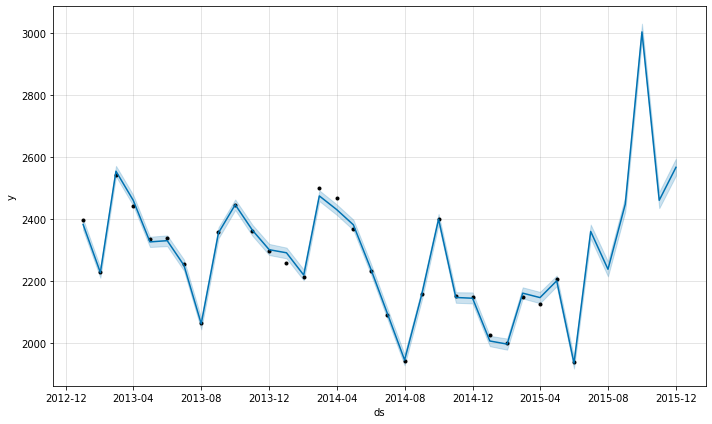

In [ ]:
fig2_ = m_.plot(forecast4_)